In [1]:
%matplotlib inline

import os
import random
import numpy as np
import pandas as pd
import astropy.stats
import statistics
from astropy.io import fits
from astropy.table import Table 
from astropy.stats import calculate_bin_edges
from astropy.cosmology import FlatLambdaCDM, z_at_value
import astropy.units as u
cosmo = FlatLambdaCDM(H0 = 70, Om0 = 0.3)

from scipy.stats import linregress
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] ='Times New Roman'

## (1) Read the galaxy catalog and get some basic parameters (e.g., coordinates, redshift, mass, and SFR)

In [2]:
# Directory of the catalog: where the catalog is located
cat_dir = 'D:/Ryo/Documents/Academic/Kuliah/S1/Semester 7/AS4091 Tugas Akhir I/Catalogs/All Catalogs/'

cat_eazy = fits.open(cat_dir+'allcats_zout.fits')
cat_eazy.info()
cat_eazy[1].header

Filename: D:/Ryo/Documents/Academic/Kuliah/S1/Semester 7/AS4091 Tugas Akhir I/Catalogs/All Catalogs/allcats_zout.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (19767,)   uint8   
  1  /Users/itsnakhoirulfitriana/Documents/student_project_itb_galclum/ca    1 BinTableHDU    199   216098R x 83C   [K, 14A, D, D, D, K, E, E, E, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  978 / width of table in bytes                        
NAXIS2  =               216098 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   83 / number of columns                              
EXTNAME = '/Users/itsnakhoirulfitriana/Documents/student_project_itb_galclum/ca'
TTYPE1  = 'index   '           / label for column 1                             
TFORM1  = 'K       '           / format for column 1                            
TCOMM1  = 'Expression: index'                                                   
TTYPE2  = 'ID_new  '        

In [3]:
# get the catalog data
cat_eazy_data = cat_eazy[1].data
cat_eazy_data

FITS_rec([(     1, 'CEERS1', 215.21529079, 52.97537283, -1., 0, -1.        , -1.        , -1.        , 4.31882810e+13,     0.        , -1.        , -1.        , -1.        , 0.01      , 0.        , 0.01      ,  0.       , 0.        , 0.        , 0.        , 0.       , 0.       , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,     0.        , -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, [-9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29], [-9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29], [-9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29], [-9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.00000000e+29, -9.000

In [4]:
# Combined ID from all fields
ID_new = cat_eazy_data['ID_new']

# Right ascension and declination
ra = cat_eazy_data['ra']
dec = cat_eazy_data['dec']

# redshifts: spectroscopic and photometric redshifts
z_spec = cat_eazy_data['z_spec']
z_phot = cat_eazy_data['z_phot']

# rest-frame magnitudes in U, V, and J bands
restU = cat_eazy_data['restU']
restV = cat_eazy_data['restV']
restJ = cat_eazy_data['restJ']

restU_err = cat_eazy_data['restU_err']
restV_err = cat_eazy_data['restV_err']

# luminosity in U, V, and J bands
Lu = cat_eazy_data['Lu']
Lv = cat_eazy_data['Lv']
Lj = cat_eazy_data['Lj']

# stellar mass (SM) and star formation rate (SFR)
SM = cat_eazy_data['mass']
SFR = cat_eazy_data['sfr']
SM_p = cat_eazy_data['mass_p']
SM1 = np.array([x[1] for x in SM_p])
SM3 = np.array([x[3] for x in SM_p])
SFR_p = cat_eazy_data['sfr_p']
SFR1 = np.array([x[1] for x in SFR_p])
SFR3 = np.array([x[3] for x in SFR_p])
Av = cat_eazy_data['Av']

z_ph_chi = cat_eazy_data['z_phot_chi2']
nusefilt = cat_eazy_data['nusefilt']

# number of objects (i.e., galaxies)
ngals = len(ra)
print ('Number of galaxies in the catalog: %d' % ngals)

cat_eazy.close()

Number of galaxies in the catalog: 216098


## (2) Read the photometry catalog

In [5]:
cat_photo = fits.open(cat_dir+'allcats_phot_apcorr.fits')
cat_photo.info()
cat_photo[1].header

Filename: D:/Ryo/Documents/Academic/Kuliah/S1/Semester 7/AS4091 Tugas Akhir I/Catalogs/All Catalogs/allcats_phot_apcorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (95519,)   uint8   
  1  /Users/itsnakhoirulfitriana/Documents/student_project_itb_galclum/ca    1 BinTableHDU   2554   216098R x 890C   [K, 14A, D, K, K, K, K, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, K, K, D, D, J, D, D, D, D, D, D, K, D, D, D, D, D, D, K, D, I, D, D, D, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                 6576 / width of table in bytes                        
NAXIS2  =               216098 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                  890 / number of columns                              
EXTNAME = '/Users/itsnakhoirulfitriana/Documents/student_project_itb_galclum/ca'
TTYPE1  = 'index   '           / label for column 1                             
TFORM1  = 'K       '           / format for column 1                            
TCOMM1  = 'Expression: index'                                                   
TTYPE2  = 'ID_new  '        

In [6]:
# get the catalog data
cat_photo_data = cat_photo[1].data

rkron = cat_photo_data['kron_radius']
flux_iso = cat_photo_data['flux_iso']
flux_radius = cat_photo_data['flux_radius']
flux_radius20 = cat_photo_data['flux_radius_20']
flux_radius90 = cat_photo_data['flux_radius_90']

In [7]:
# check the list of filters and their names from the header information printed above
filter_names = ['f090w', 'f105w', 'f110w', 'f115w', 'f125w', 'f140w', 'f150w', 'f160w',
                'f182m', 'f200w', 'f210m', 'f277w', 'f335m', 'f356w', 'f410m', 'f430m',
                'f435w', 'f444w', 'f460m', 'f475w', 'f480m', 'f606w', 'f606wu', 'f775w',
                'f814w', 'f814wu', 'f850lp', 'f850lpu']
nfilters = len(filter_names)
print ('Number of filters: %d' % nfilters)

# get central wavelength of the filters
# filter_cwave = np.zeros(nfilters)
# for bb in range(nfilters):
#     filter_cwave[bb] = cat_photo[1].header[filter_names[bb]+'_PLAM']

Number of filters: 28


In [8]:
# get the fluxes in units of micro Jansky (uJy)
# The measurements were done with circular aperture with 0.7 arcsecond diameter
# Now the fluxes have been corrected for the flux loss due to the small aperture 
flux = {}
flux_err = {}
for bb in range(nfilters):
    flux[filter_names[bb]] = np.zeros(ngals)
    flux_err[filter_names[bb]] = np.zeros(ngals)
    
for ii in range(ngals):
    for bb in range(nfilters):
        flux[filter_names[bb]][ii] = cat_photo_data[filter_names[bb]+'_tot_2'][ii]
        flux_err[filter_names[bb]][ii] = cat_photo_data[filter_names[bb]+'_etot_2'][ii]

In [9]:
# calculate AB magnitudes
ABmag = {}
for bb in range(nfilters):
    ABmag[filter_names[bb]] = np.zeros(ngals)
    
for ii in range(ngals):
    for bb in range(nfilters):
        ABmag[filter_names[bb]][ii] = -2.5*np.log10(flux[filter_names[bb]][ii]*1e-6) + 8.90

cat_photo.close()

C:\Users\Ryo\AppData\Local\Temp\ipykernel_4492\2960262805.py:8: RuntimeWarning: invalid value encountered in log10
  ABmag[filter_names[bb]][ii] = -2.5*np.log10(flux[filter_names[bb]][ii]*1e-6) + 8.90


## Sample Quick Look

In [100]:
idx_bin = np.where((z_spec>3) & (np.log10(SM)>7.0) & (abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
#idx_bin = np.where((z_spec>1) & (z_spec<3) & (np.log10(SM)>8.5) & (np.log10(SM)<11.5) & (abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
data = {'ID' : [ID_new[ii] for ii in idx_bin[0]], 
        'RA' : [ra[ii] for ii in idx_bin[0]],
        'Dec' : [dec[ii] for ii in idx_bin[0]],
        'z_sp' : [z_spec[ii] for ii in idx_bin[0]],
        'log_SM' : [np.log10(SM[ii]) for ii in idx_bin[0]],
        'log_SFR' : [np.log10(SFR[ii]) for ii in idx_bin[0]],
        'log_sSFR' : [np.log10(SFR[ii])-np.log10(SM[ii]) for ii in idx_bin[0]]}

df_sel = pd.DataFrame(data, index=[ii for ii in idx_bin[0]])
df_z = df_sel.sort_values(by=['z_sp'])
df_z.to_csv('sample_info.csv')
idx = df_z.index

C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\2563379685.py:1: RuntimeWarning: divide by zero encountered in log10
  idx_bin = np.where((z_spec>3) & (np.log10(SM)>7.0) & (abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\2563379685.py:1: RuntimeWarning: invalid value encountered in log10
  idx_bin = np.where((z_spec>3) & (np.log10(SM)>7.0) & (abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\2563379685.py:1: RuntimeWarning: divide by zero encountered in divide
  idx_bin = np.where((z_spec>3) & (np.log10(SM)>7.0) & (abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\2563379685.py:1: Runti

In [101]:
idx_errsel = np.where((abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
idx_errsel3 = np.where((abs(z_spec-z_phot)/(1+z_spec)<0.15) & (z_spec > 3) & (flux['f160w']>0))

zsample = np.where((z_spec > 0) & (z_phot > 0))
delta_z = z_phot[zsample[0]]-z_spec[zsample[0]]
sig = 1.48*np.median(abs((delta_z-np.median(delta_z))/(1+z_spec[zsample[0]])))
sig

C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\3237116294.py:1: RuntimeWarning: divide by zero encountered in divide
  idx_errsel = np.where((abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\3237116294.py:1: RuntimeWarning: invalid value encountered in divide
  idx_errsel = np.where((abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\3237116294.py:2: RuntimeWarning: divide by zero encountered in divide
  idx_errsel3 = np.where((abs(z_spec-z_phot)/(1+z_spec)<0.15) & (z_spec > 3) & (flux['f160w']>0))
C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\3237116294.py:2: RuntimeWarning: invalid value encountered in divide
  idx_errsel3 = np.where((abs(z_spec-z_phot)/(1+z_spec)<0.15) & (z_spec > 3) & (flux['f160w']>0))


0.02691531868948916

In [ ]:
fig, ax = plt.subplots(2, sharex=True, figsize=(8,10), gridspec_kw=dict(height_ratios=[4,1] ,hspace=0.05))

ax[0].scatter(z_spec, z_phot, s=20, alpha=0.2, color='black', marker='.', facecolor=None, label='data')
ax[0].scatter(z_spec[idx_errsel[0]], z_phot[idx_errsel[0]], s=20, alpha=0.2, c='red', marker='.', facecolor=None, label='$\Delta z/(1+z_{spec})<0.15$')
ax[0].legend()
ax[0].set_xlim(0.0,9.0)
ax[0].set_ylim(0.0,9.0)
ax[0].grid(visible=True, linestyle=':')

x = np.linspace(0,12,100)
ax[0].plot(x,x,lw=1,color='red',linestyle='-')
ax[0].plot(x,x-0.15*(1+x),lw=1,color='red',linestyle=':',dashes=(1,3))
ax[0].plot(x,x+0.15*(1+x),lw=1,color='red',linestyle=':',dashes=(1,3))

y = [-2*sig, 0, 2*sig]
ytick = ['-2σ', '0', r'2σ']
ax[1].scatter(z_spec, (z_spec-z_phot)/(1+z_spec), s=20, alpha=0.3, color='black', marker='.', facecolor=None)
ax[1].scatter(z_spec[idx_errsel[0]], (z_spec[idx_errsel[0]]-z_phot[idx_errsel[0]])/(1+z_spec[idx_errsel[0]]), s=20, alpha=0.2, c='red', marker='.', facecolor=None)
ax[1].set_ylim(-2*sig-0.1, 2*sig+0.1)
ax[1].axhline(y=0, c='grey', linestyle=':')
ax[1].axhline(y=-2*sig, c='grey', linestyle=':')
ax[1].axhline(y=2*sig, c='grey', linestyle=':')
ax[1].set_yticks(y, ytick)
ax[1].grid(visible=True, linestyle=':')

for i in range(len(ax)):
    ax[i].minorticks_on()
    ax[i].tick_params(axis='both', which='both', direction = "in", top="on", right="on")
    ax[i].tick_params(axis="both", which='major', length=6)


fig.suptitle(r'$z_{spec}$ vs $z_{phot}$', fontsize=20, y=0.92)
plt.xlabel('$z_{spec}$',fontsize=14)
ax[0].set_ylabel('$z_{phot}$',fontsize=12)
ax[1].set_ylabel('$\Delta z/(1+z_{spec})$', fontsize=12)

plt.savefig("zsel.png", bbox_inches='tight', dpi=300)

C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\1330974408.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(z_phot, np.log10(SM), s=10, alpha=0.5, color='silver', label='all data')
C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\1330974408.py:15: RuntimeWarning: invalid value encountered in log10
  plt.scatter(z_phot, np.log10(SM), s=10, alpha=0.5, color='silver', label='all data')
C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\1330974408.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(z_spec[idx_errsel[0]], np.log10(SM[idx_errsel[0]]), s=10, alpha=0.5, color='dimgrey', facecolor='none', label='$\Delta z/(1+z_{spec})<0.15$')


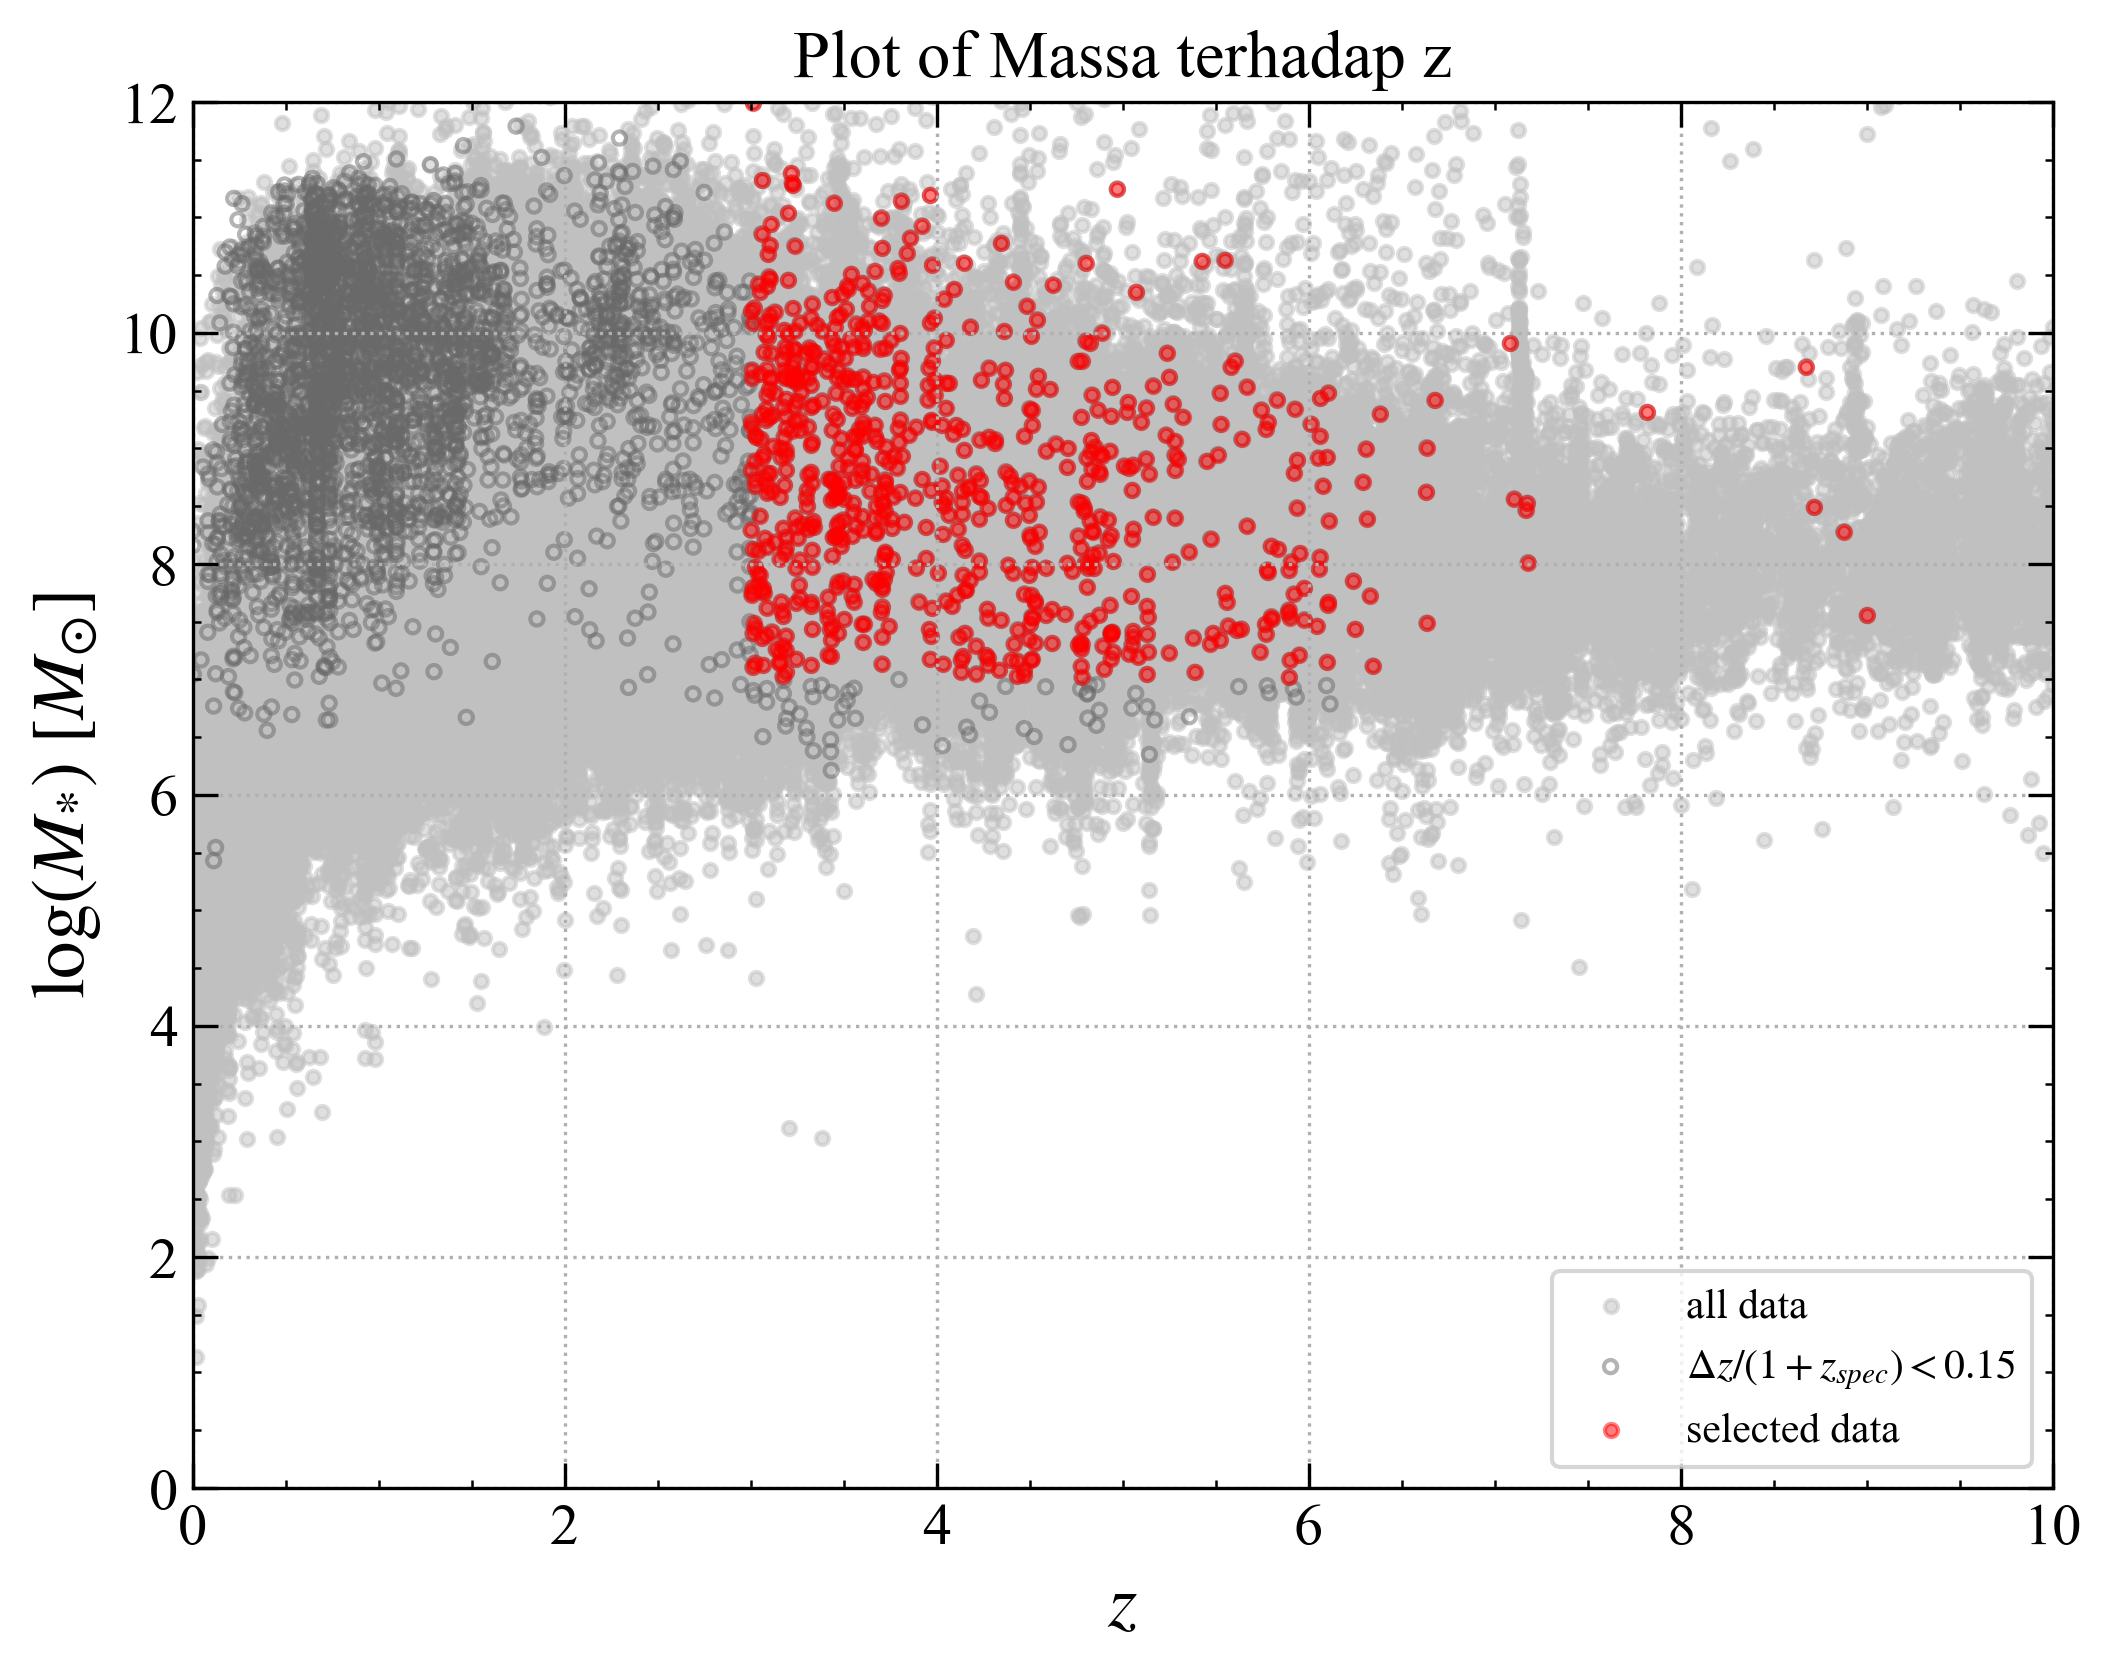

In [102]:
fig = plt.figure(figsize=(8,6), dpi=300)
f1 = plt.subplot()
plt.xlim(0,10.0)
plt.ylim(0,12.0)
plt.setp(f1.get_xticklabels(), fontsize=14)
plt.setp(f1.get_yticklabels(), fontsize=14)
plt.xlabel('$z$', fontsize=18)
plt.ylabel(r'$\log(M_{*}) \ [M_{\odot}]$', fontsize=18)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on")
plt.tick_params(axis="both", which='major', length=6)
plt.grid(visible=True, linestyle=':')
plt.title('Plot of Massa terhadap z', fontsize=16)

plt.scatter(z_phot, np.log10(SM), s=10, alpha=0.5, color='silver', label='all data')
plt.scatter(z_spec[idx_errsel[0]], np.log10(SM[idx_errsel[0]]), s=10, alpha=0.5, color='dimgrey', facecolor='none', label='$\Delta z/(1+z_{spec})<0.15$')
plt.scatter(z_spec[idx_bin], np.log10(SM[idx_bin]), s=10, alpha=0.5, color='red', label='selected data')

plt.legend(fontsize=10, loc='lower right')
plt.savefig('M-z.png', bbox_inches='tight', dpi=300)

## Analysis

In [10]:
idx_bin = np.where((z_spec>3) & (np.log10(SM)>7.0) & (abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
#idx_bin = np.where((z_spec>1) & (z_spec<3) & (np.log10(SM)>8.5) & (np.log10(SM)<11.5) & (abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
data = {'ID' : [ID_new[ii] for ii in idx_bin[0]], 
        'RA' : [ra[ii] for ii in idx_bin[0]],
        'Dec' : [dec[ii] for ii in idx_bin[0]],
        'z_sp' : [z_spec[ii] for ii in idx_bin[0]],
        'log_SM' : [np.log10(SM[ii]) for ii in idx_bin[0]],
        'log_SFR' : [np.log10(SFR[ii]) for ii in idx_bin[0]],
        'log_sSFR' : [np.log10(SFR[ii])-np.log10(SM[ii]) for ii in idx_bin[0]]}

df_sel = pd.DataFrame(data, index=[ii for ii in idx_bin[0]])
df_z = df_sel.sort_values(by=['z_sp'])
df_z.to_csv('sample_info.csv')
idx = df_z.index

C:\Users\Ryo\AppData\Local\Temp\ipykernel_4492\2563379685.py:1: RuntimeWarning: divide by zero encountered in log10
  idx_bin = np.where((z_spec>3) & (np.log10(SM)>7.0) & (abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
C:\Users\Ryo\AppData\Local\Temp\ipykernel_4492\2563379685.py:1: RuntimeWarning: invalid value encountered in log10
  idx_bin = np.where((z_spec>3) & (np.log10(SM)>7.0) & (abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
C:\Users\Ryo\AppData\Local\Temp\ipykernel_4492\2563379685.py:1: RuntimeWarning: divide by zero encountered in divide
  idx_bin = np.where((z_spec>3) & (np.log10(SM)>7.0) & (abs(z_spec-z_phot)/(1+z_spec)<0.15) & (flux['f160w']>0) & (flux['f115w']>0) & (flux['f150w']>0) & (flux['f277w']>0) & (flux['f444w']>0))
C:\Users\Ryo\AppData\Local\Temp\ipykernel_4492\2563379685.py:1: RuntimeWa

In [11]:
#X = pd.read_csv('ultimate.csv')
#X = X.set_index(idx)

X = Table.read('ultimate.csv',format='ascii.csv')

C = np.where(X['Type']=='C')
N = np.where(X['Type']=='N')

RA = X['RA']
DEC = X['Dec']
zsp = X['z_sp']
zph = X['z_ph']

M = X['log_SM']
M_e = np.abs(M-X['log_SM1'])
M_E = np.abs(X['log_SM3']-M)

SFR = X['log_SFR']
SFR_e = np.abs(SFR-X['log_SFR1'])
SFR_E = np.abs(X['log_SFR3']-SFR)

sSFR = SFR-M
Rsb = X['Rsb']

types = X['Type']

X['z_ph_chi2'] = z_ph_chi[idx]
zchi = X['z_ph_chi2']

X['nusefilt'] = nusefilt[idx]
nufit = X['nusefilt']

redchi = zchi/nufit
X['redchi'] = redchi

### Misc

In [ ]:
import pandas as pd

df = pd.read_excel('D:/Ryo/Documents/Academic/Kuliah/S1/Semester 7/AS4091 Tugas Akhir I/Catalogs/All Catalogs/Segmentation_rev/All-Clumpy-Nonclumpy.xlsx')
x = df['x']
ID = df['ID']
index = np.unique(df['ID'], return_index=True)[1]
IDlist = [ID[i] for i in sorted(index)]

mm = [x for x in ID_new[idx_bin] if x not in IDlist]

IDlist = IDlist + mm

n = []
for i in range(len(IDlist)):
    if np.isnan(df[df['ID'] == IDlist[i]]['x']).all():
        n.append(0)
    else:
        n.append(len(df[df['ID'] == IDlist[i]]))

clumpyg = {'ID' : IDlist, 
          'N' : n}

clumpyg = pd.DataFrame(clumpyg)
clumpyg.to_csv('test.csv')

#### $z>3$

In [652]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0 = 70, Om0 = 0.3)

df = pd.read_excel('D:/Ryo/Documents/Academic/Kuliah/S1/Semester 7/AS4091 Tugas Akhir I/Catalogs/All Catalogs/Segmentation_rev/All-Clumpy-Nonclumpy.xlsx', sheet_name='Detection')

label = []
for n in df['N']:
    if n<2:
        label.append('N')
    else:
        label.append('C')

df['Type'] = label
df.set_index(idx)

df['RA'] = ra[idx]
df['Dec'] = dec[idx]
df['z_sp'] = z_spec[idx]
df['z_ph'] = z_phot[idx]
df['log_SM'] = np.log10(SM[idx])
log_SM1 = np.log10(SM1)
log_SM3 = np.log10(SM3)
df['log_SM1'] = log_SM1[idx]
df['log_SM3'] = log_SM3[idx]
df['log_SFR'] = np.log10(SFR[idx])
log_SFR1 = np.log10(SFR1)
log_SFR3 = np.log10(SFR3)
df['log_SFR1'] = log_SFR1[idx]
df['log_SFR3'] = log_SFR3[idx]
df['log_sSFR'] = np.log10(SFR[idx])-np.log10(SM[idx])
df['F115W'] = flux['f115w'][idx]
df['F115W_err'] = flux_err['f115w'][idx]
df['F115W_sig'] = flux['f115w'][idx]/flux_err['f115w'][idx]
df['F150W'] = flux['f150w'][idx]
df['F150W_err'] = flux_err['f150w'][idx]
df['F150W_sig'] = flux['f150w'][idx]/flux_err['f150w'][idx]
df['F277W'] = flux['f277w'][idx]
df['F277W_err'] = flux_err['f277w'][idx]
df['F277W_sig'] = flux['f277w'][idx]/flux_err['f277w'][idx]
df['F444W'] = flux['f444w'][idx]
df['F444W_err'] = flux_err['f444w'][idx]
df['F444W_sig'] = df['F444W']/df['F444W_err']
df['U-V'] = -2.5*np.log10(restU[idx]/restV[idx])
df['V-J'] = -2.5*np.log10(restV[idx]/restJ[idx])
df['Muv'] = 4.75-2.5*np.log10(Lu[idx])
df['mu'] = -2.5*np.log10(restU[idx]*1e-6) + 8.90
df['mv'] = -2.5*np.log10(restV[idx]*1e-6) + 8.90
df['mu_err'] = np.abs(2.5 / (restU[idx] * np.log(10)) * restU_err[idx])
df['mv_err'] = np.abs(2.5 / (restV[idx] * np.log(10)) * restV_err[idx])
df['Mu'] = df['mu'] + 5 - 5 * np.log10(cosmo.luminosity_distance(df['z_sp']) * 10**6) 
df['Mv'] = df['mv'] + 5 - 5 * np.log10(cosmo.luminosity_distance(df['z_sp']) * 10**6) 
df['Mu_err'] = df['mu_err']
df['Mv_err'] = df['mv_err']

df['bin'] = pd.cut(df['z_sp'], bins=[3, 4, 5, 11])
# bin clumpy fraction
df['bin2'] = pd.cut(df['z_sp'], bins=[3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 11], labels=[1, 2, 3, 4, 5, 6, 7, 8])
# bin histogram
df['bin3'] = pd.cut(df['z_sp'], bins=[3, 3.5, 4, 5, 11], labels=[1, 2, 3, 4])

df['linbin'] = pd.cut(df['z_sp'], bins=[3, 3.5, 4, 4.5, 5, 11])

bins = np.logspace(np.log10(3), np.log10(11), 7)
df['logbin'] = pd.cut(df['z_sp'], bins=bins)

df['qbin'] =  pd.qcut(df['z_sp'], q=4)


df.to_csv('ultimate.csv')

X = pd.read_csv('ultimate.csv')
X = X.set_index(idx)


def sfms(t, log_M):
    return (0.80-0.022*t)*log_M-(6.09-0.07*t)
    
Rsb = []
for j in range(len(np.unique(X['bin3']))):
    Xbin = X[X['bin3'] == j+1]
    t = cosmo.age(np.median(Xbin['z_sp'])).value
    for ii in Xbin.index:
      Rsb.append(Xbin['log_SFR'][ii] - sfms(t, Xbin['log_SM'][ii]))

X['Rsb'] = Rsb

X.to_csv('ultimate.csv')
X

C:\Users\Ryo\AppData\Local\Temp\ipykernel_18648\4260884001.py:23: RuntimeWarning: divide by zero encountered in log10
  log_SM1 = np.log10(SM1)
C:\Users\Ryo\AppData\Local\Temp\ipykernel_18648\4260884001.py:23: RuntimeWarning: invalid value encountered in log10
  log_SM1 = np.log10(SM1)
C:\Users\Ryo\AppData\Local\Temp\ipykernel_18648\4260884001.py:24: RuntimeWarning: divide by zero encountered in log10
  log_SM3 = np.log10(SM3)
C:\Users\Ryo\AppData\Local\Temp\ipykernel_18648\4260884001.py:24: RuntimeWarning: invalid value encountered in log10
  log_SM3 = np.log10(SM3)
C:\Users\Ryo\AppData\Local\Temp\ipykernel_18648\4260884001.py:28: RuntimeWarning: divide by zero encountered in log10
  log_SFR1 = np.log10(SFR1)
C:\Users\Ryo\AppData\Local\Temp\ipykernel_18648\4260884001.py:28: RuntimeWarning: invalid value encountered in log10
  log_SFR1 = np.log10(SFR1)
C:\Users\Ryo\AppData\Local\Temp\ipykernel_18648\4260884001.py:29: RuntimeWarning: divide by zero encountered in log10
  log_SFR3 = np.l

Unnamed: 0           ID  N Type          RA        Dec       z_sp  \
124366           0  FRESCO32042  3    C   53.165760 -27.779891   3.000181   
116809           1  FRESCO25241  2    C   53.178004 -27.795537   3.000969   
125278           2  FRESCO32864  1    N   53.190780 -27.778124   3.003700   
77746            3  COSWEB16507  2    C  149.967178   2.379023   3.004200   
113850           4  FRESCO22579  2    C   53.150923 -27.801828   3.004754   
...            ...          ... ..  ...         ...        ...        ...   
64457          715    CEERS6801  1    N  215.035396  52.890671   8.674539   
39513          716   CEERS45560  1    N  214.967529  52.932953   8.718173   
50748          717   CEERS55672  1    N  215.011708  52.988306   8.876890   
54671          718   CEERS59202  0    N  215.000781  52.989641   9.003126   
56533          719   CEERS60879  0    N  214.994398  52.989381  10.646574   

            z_ph     log_SM   log_SM1  ...         Mv    Mu_err    Mv_err  \
124366  2.997997   8.807882  8.783565  ... -20.631716  0.023196  0.028804   
116809  3.038258   8.293911  8.353498  ... -20.402539  0.026189  0.034765   
125278  3.039871   9.230765  9.159619  ... -21.934297  0.021212  0.020868   
77746   2.941089  10.186722  9.952745  ... -22.922339  0.050377  0.076500   
113850  3.169504   7.730776  7.424693  ... -18.883345  0.042797  0.053080   
...          ...        ...       ...  ...        ...       ...       ...   
64457   8.572445   9.704541  9.677420  ... -25.302897  0.031688  0.041045   
39513   8.700458   8.488204  8.510558  ... -23.440135  0.035106  0.059265   
50748   8.899265   8.277278  8.222745  ... -22.763696  0.040724  0.063268   
54671   8.278578   7.552229  7.508163  ... -21.644536  0.098819  0.098819   
56533   9.001866   8.186546  8.124430  ... -22.749101  0.059905  0.117833   

            bin  bin2  bin3       linbin          logbin            qbin  \
124366   (3, 4]     1     1   (3.0, 3.5]    (3.0, 3.725]  (2.999, 3.331]   
116809   (3, 4]     1     1   (3.0, 3.5]    (3.0, 3.725]  (2.999, 3.331]   
125278   (3, 4]     1     1   (3.0, 3.5]    (3.0, 3.725]  (2.999, 3.331]   
77746    (3, 4]     1     1   (3.0, 3.5]    (3.0, 3.725]  (2.999, 3.331]   
113850   (3, 4]     1     1   (3.0, 3.5]    (3.0, 3.725]  (2.999, 3.331]   
...         ...   ...   ...          ...             ...             ...   
64457   (5, 11]     8     4  (5.0, 11.0]  (7.133, 8.858]  (4.78, 10.647]   
39513   (5, 11]     8     4  (5.0, 11.0]  (7.133, 8.858]  (4.78, 10.647]   
50748   (5, 11]     8     4  (5.0, 11.0]   (8.858, 11.0]  (4.78, 10.647]   
54671   (5, 11]     8     4  (5.0, 11.0]   (8.858, 11.0]  (4.78, 10.647]   
56533   (5, 11]     8     4  (5.0, 11.0]   (8.858, 11.0]  (4.78, 10.647]   

             Rsb  
124366 -0.856988  
116809  0.016695  
125278 -0.199183  
77746  -0.610966  
113850 -0.050582  
...          ...  
64457   0.432745  
39513   0.607338  
50748   0.379778  
54671   0.686653  
56533  -0.008874  

[720 rows x 45 columns]

#### $z=1-3$

In [ ]:
df = pd.read_excel('D:/Ryo/Documents/Academic/Kuliah/S1/Semester 7/AS4091 Tugas Akhir I/Catalogs/All Catalogs/Segmentation_rev/All-Clumpy-Nonclumpy_1-3.xlsx', sheet_name='Detection')

label = []
for n in df['N']:
    if n<2:
        label.append('NC')
    else:
        label.append('C')

df['Type'] = label
df.set_index(idx)

df['RA'] = ra[idx]
df['Dec'] = dec[idx]
df['z_sp'] = z_spec[idx]
df['log_SM'] = np.log10(SM[idx])
log_SM1 = np.log10(SM1)
log_SM3 = np.log10(SM3)
df['log_SM1'] = log_SM1[idx]
df['log_SM3'] = log_SM3[idx]
df['log_SFR'] = np.log10(SFR[idx])
log_SFR1 = np.log10(SFR1)
log_SFR3 = np.log10(SFR3)
df['log_SFR1'] = log_SFR1[idx]
df['log_SFR3'] = log_SFR3[idx]
df['log_sSFR'] = np.log10(SFR[idx])-np.log10(SM[idx])
df['F115W'] = flux['f115w'][idx]
df['F115W_err'] = flux_err['f115w'][idx]
df['F115W_sig'] = flux['f115w'][idx]/flux_err['f115w'][idx]
df['F150W'] = flux['f150w'][idx]
df['F150W_err'] = flux_err['f150w'][idx]
df['F150W_sig'] = flux['f150w'][idx]/flux_err['f150w'][idx]
df['F277W'] = flux['f277w'][idx]
df['F277W_err'] = flux_err['f277w'][idx]
df['F277W_sig'] = flux['f277w'][idx]/flux_err['f277w'][idx]
df['F444W'] = flux['f444w'][idx]
df['F444W_err'] = flux_err['f444w'][idx]
df['F444W_sig'] = df['F444W']/df['F444W_err']
df['U-V'] = -2.5*np.log10(restU[idx]/restV[idx])
df['V-J'] = -2.5*np.log10(restV[idx]/restJ[idx])
df['Muv'] = 4.75-2.5*np.log10(Lu[idx])

df['bin'] = pd.cut(df['z_sp'], bins=[1, 1.5, 2, 2.5, 3], labels=[1, 2, 3, 4])
# bin clumpy fraction

df.to_csv('ultimate13.csv')

X = pd.read_csv('ultimate13.csv')
X = X.set_index(idx)

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0 = 70, Om0 = 0.3)

def sfms(t, log_M):
    return (0.80-0.022*t)*log_M-(6.09-0.07*t)
    
Rsb = []
for j in range(len(np.unique(X['bin']))):
    Xbin = X[X['bin'] == j+1]
    t = cosmo.age(np.median(Xbin['z_sp'])).value
    for ii in Xbin.index:
      Rsb.append(Xbin['log_SFR'][ii] - sfms(t, Xbin['log_SM'][ii]))

X['Rsb'] = Rsb

XC = X[X['Type'] == 'C']
XNC = X[X['Type'] == 'NC']

X.to_csv('ultimate13.csv')

In [ ]:
G = pd.read_excel('Galfit_Nur.xlsx')

index_match = [G[G['oriID'] == x].index.values[0] for x in G['oriID'] if x in ID_new[idx]]
X_index = [X[X['ID'] == x].index.values[0] for x in G['oriID'] if x in ID_new[idx]]
G = G.iloc[index_match].reset_index()
plt.hist(G['n'])

In [ ]:
type = np.array(X['Type'][X_index])

G['Type'] = type
GC = G[G['Type'] == 'C']
GNC = G[G['Type'] == 'NC']

In [ ]:
plt.hist(GC['e'], label='Clumpy')
plt.hist(GNC['e'], label='Non-Clumpy')
plt.legend()

In [ ]:
D = pd.read_excel('All-Clumpy-Nonclumpy.xlsx', sheet_name='Detection')

d_cl = []
d_r = []
for i in range(len(D)):
    if 'FRESCO' in D.ID[i]:
        d_cl.append(np.sqrt((D.x[i]-50)**2+(D.y[i]-50)**2))
    else:
        d_cl.append(np.sqrt((D.x[i]-25)**2+(D.y[i]-25)**2))
    indexx = X[X['ID'] == D.ID[i]].index.values[0]
    d_r.append(d_cl[i]/flux_radius[indexx])

D['d_cl'] = d_cl
D['d_r'] = d_r
D

### Statistic Check

In [ ]:
AG = pd.read_csv('Gal_area.csv')

bins = np.logspace(np.log10(min(AG['A_gal'])), np.log10(max(AG['A_gal'])), 20)
plt.hist(AG['A_gal'], bins=bins, color='royalblue', edgecolor='white')
#plt.grid(visible=True, linestyle=':')
plt.xlabel('$pixel$', fontsize=18)
plt.ylabel('$N$', fontsize=18)
plt.minorticks_on()
plt.xscale('log')
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on")
plt.tick_params(axis="both", which='major', length=6)
plt.title('Luas Area Galaksi', fontsize=20)
plt.text(270, 45, r'$A_{gal,med}$ = ' + str(np.round(np.nanmedian(AG['A_gal']), 2)) + ' piksel', fontsize=14, color='blue')
plt.savefig('area_gal.png', bbox_inches='tight', dpi=300)
plt.show()

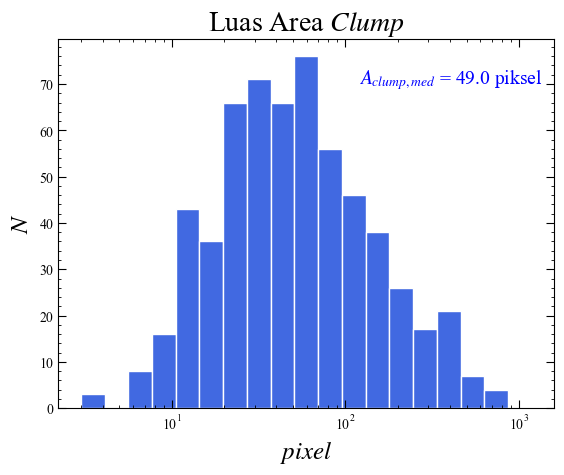

In [37]:
AC = pd.read_csv('Clump_area.csv')

bins = np.logspace(np.log10(min(AC['A_clump'])), np.log10(max(AC['A_clump'])), 20)
plt.hist(AC['A_clump'], bins=bins, color='royalblue', edgecolor='white')
#plt.grid(visible=True, linestyle=':')
plt.xlabel(r'$\mathit{pixel}$', fontsize=18)
plt.ylabel(r'$\mathit{N}$', fontsize=18)
plt.minorticks_on()
plt.xscale('log')
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on")
plt.tick_params(axis="both", which='major', length=6)
plt.title('Luas Area $Clump$', fontsize=20)
plt.text(120, 70, r'$A_{clump,med}$ = ' + str(np.round(np.nanmedian(AC['A_clump']), 1)) + ' piksel', fontsize=14, color='blue')
plt.savefig('area_clump.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,6))
f1 = plt.subplot()
plt.xlim(0,10.0)
plt.ylim(0,12.0)
plt.setp(f1.get_xticklabels(), fontsize=14)
plt.setp(f1.get_yticklabels(), fontsize=14)
plt.xlabel('$z$', fontsize=18)
plt.ylabel(r'$\log(M_{*}) \ [M_{\odot}]$', fontsize=18)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on")
plt.tick_params(axis="both", which='major', length=6)
plt.grid(visible=True, linestyle=':')
#plt.title('Plot of Massa terhadap z', fontsize=16)

plt.scatter(z_phot, np.log10(SM), s=10, alpha=0.5, color='silver', label='all data')
plt.scatter(z_spec[idx_errsel[0]], np.log10(SM[idx_errsel[0]]), s=10, alpha=0.5, color='dimgrey', facecolor='none', label='zerr-sel')
#plt.scatter(z_spec[idx_sel[0]], np.log10(SM[idx_sel[0]]), s=10, alpha=0.5, color='red', label='selected data')

plt.legend(fontsize=10, loc='lower right')
plt.savefig('M-z-before.png', bbox_inches='tight')

C:\Users\Ryo\AppData\Local\Temp\ipykernel_19884\1099703374.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(z_phot, z_ph_chi/nusefilt, s=10, alpha=0.2, color='dimgrey', facecolor='none', label='Total sampel')


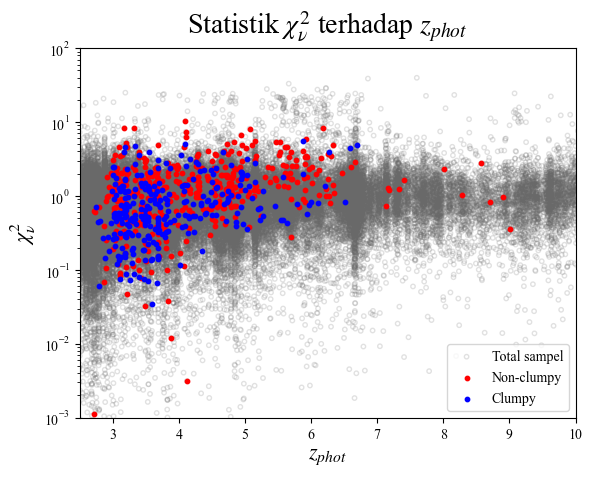

In [15]:
plt.scatter(z_phot, z_ph_chi/nusefilt, s=10, alpha=0.2, color='dimgrey', facecolor='none', label='Total sampel')
plt.scatter(zph[N], redchi[N], s=10, alpha=1, color='red', label='Non-clumpy')
plt.scatter(zph[C], redchi[C], s=10, alpha=1, color='blue', label='Clumpy')
plt.yscale('log')
plt.ylim(0.001, 100)
plt.xlim(2.5, 10)
plt.xlabel(r'$z_{phot}$', fontsize=16)
plt.ylabel(r'$χ_{ν}^2$', fontsize=16)
plt.title('Statistik $χ_{ν}^2$ terhadap $z_{phot}$', pad=10, fontsize=20)
plt.legend(fontsize=10, loc='lower right')
plt.savefig('reducedchi.png', bbox_inches='tight', dpi=300)
plt.show()

In [35]:
X[X['redchi'] > 5]

<Table length=16>
 col0  Unnamed: 0      ID       N   ... z_ph_chi2  nusefilt       redchi      
int32    int32       str14    int32 ...  float32    int64        float64      
------ ---------- ----------- ----- ... ---------- -------- ------------------
115580         84 FRESCO24135     1 ...  174.84024       21  8.325725737072172
125958        108 FRESCO33476     1 ...  126.75756       24  5.281565030415853
121973        173 FRESCO29890     1 ...  188.73059       23  8.205677861752717
116919        387 FRESCO25340     2 ... 122.876915       24  5.119871457417806
120099        422 FRESCO28202     1 ...  169.97845       23 7.3903675908627715
121946        443 FRESCO29866     1 ...  149.64442       24   6.23518435160319
120953        452 FRESCO28972     1 ...  247.19441       24  10.29976717631022
121532        572 FRESCO29493     1 ...  129.45348       24 5.3938948313395185
116595        589 FRESCO25049     1 ...  133.72826       20  6.686412811279297
109851        598 FRESCO18980     1 ...  162.81938       20   8.14096908569336
123575        613 FRESCO31330     1 ...   129.7333       24  5.405554453531901
149460        617  FRESCO8890     1 ...  110.17509       20 5.5087543487548825
118479        632 FRESCO26745     1 ...  114.25632       21 5.4407770066034224
 76575        648 COSWEB15453     1 ...   66.22245        8  8.277806282043457
128663        668 FRESCO35910     3 ...  132.02803       24  5.501167933146159
133454        674 FRESCO40221     1 ...  142.74077       24  5.947532018025716

### Clumpy Properties

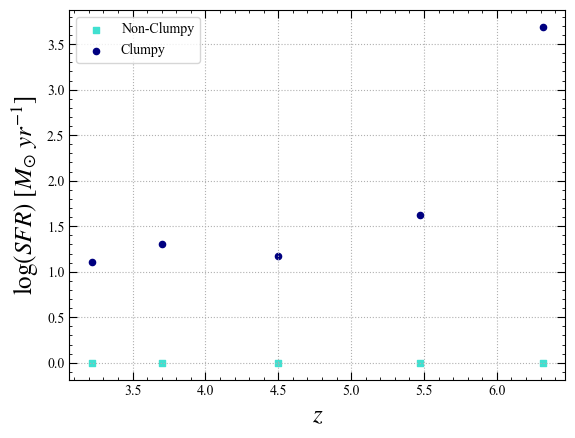

In [204]:
bins = [3, 3.5, 4, 5, 6, 11]

# Dictionary for counting
SFRC_arr = {bin: 0 for bin in bins[:-1]} 
SFRN_arr = {bin: 0 for bin in bins[:-1]}
C_arr = {bin: 0 for bin in bins[:-1]} 
N_arr = {bin: 0 for bin in bins[:-1]}
zlist = {bin: [] for bin in bins[:-1]}
# Counting
for z_bin_l, z_bin_r in zip(bins, bins[1:]):
    for i in range(len(zsp)):
        if z_bin_l <= zsp[i] < z_bin_r:
            zlist[z_bin_l].append(zsp[i])
            if types[i] == "C":
                C_arr[z_bin_l] += 1
                SFRC_arr[z_bin_l] += SFR[i]
            if types[i] == "N":
                N_arr[z_bin_l] += 1
                SFRC_arr[z_bin_l] += SFR[i]

SFRC = []
SFRN = []
zmed = []
for bin in bins[:-1]:
    SFRC.append(SFRC_arr[bin] / C_arr[bin])
    SFRN.append(SFRN_arr[bin] / N_arr[bin])
    zmed.append(np.median(zlist[bin]))
                
plt.scatter(zmed, SFRN, s=20, c='turquoise', marker='s', label='Non-Clumpy')
# plt.errorbar(zmed, SFRN, yerr=[SFRNC_errlow, SFRNC_errup], c='turquoise', capsize=3, capthick=1, elinewidth=1)
plt.scatter(zmed, SFRC, s=20, c='navy', marker='o', label='Clumpy')
# plt.errorbar(zmed, SFRC, yerr=[SFRC_errlow, SFRC_errup], c='navy', capsize=3, capthick=1, elinewidth=1)

plt.grid(visible=True, linestyle=':')
plt.xlabel(r'$z$', fontsize=18)
plt.ylabel('$\log(SFR)$' + ' $[M_{\odot}\ yr^{-1}]$', fontsize=18)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on")
plt.tick_params(axis="both", which='major', length=6)
plt.legend()
plt.show()

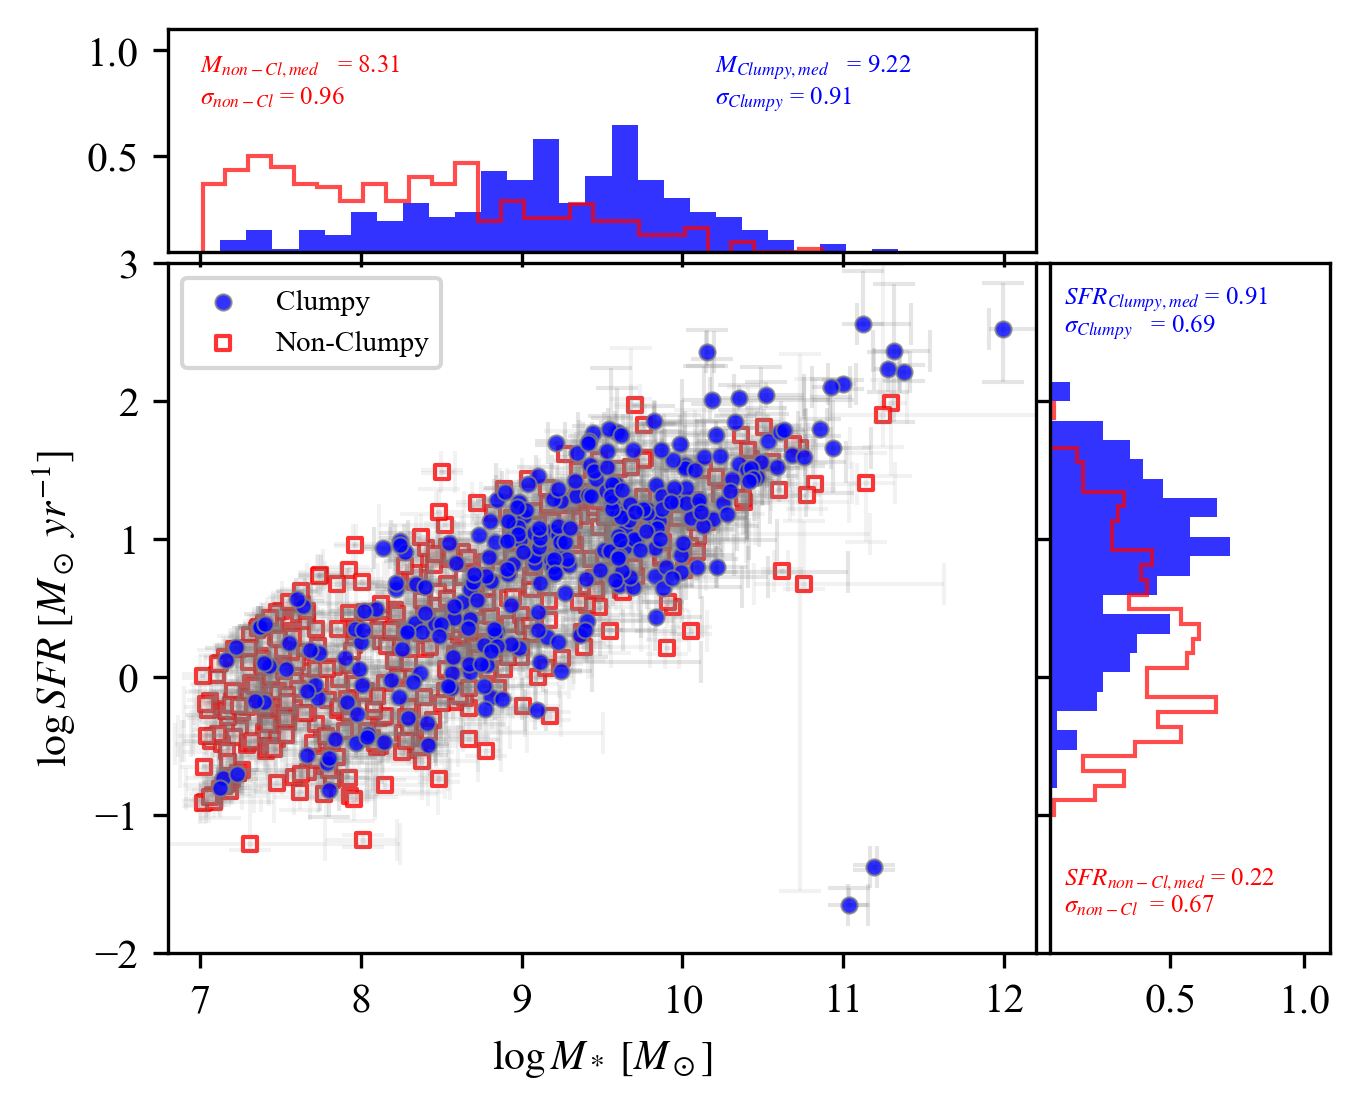

In [257]:
# Create the ax1 and the gridspec
fig = plt.figure(figsize=(5, 4), dpi=300)
gs = fig.add_gridspec(4, 4, hspace=0.05, wspace=0.05)

# Main scatter plot
ax_main = fig.add_subplot(gs[1:4, 0:3])

# Marginal histograms
ax_histx = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_histy = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

# Scatter plot
ax_main.scatter(M[C], SFR[C], facecolors='blue', edgecolor='grey', marker='o', 
                alpha=0.8, s=15, lw=0.5, label=r'Clumpy', zorder=10)
ax_main.errorbar(M[C], SFR[C], xerr=(M_e[C], M_E[C]), yerr=(SFR_e[C], SFR_E[C]), color='grey', marker='.', 
                 alpha=0.2, capsize=5, markersize=1, lw=1, ls='none')

ax_main.scatter(M[N], SFR[N], facecolors='white', edgecolor='red', marker='s', 
                alpha=0.8, s=10, lw=1, label=r'Non-Clumpy')
ax_main.errorbar(M[N], SFR[N], xerr=(M_e[N], M_E[N]), yerr=(SFR_e[N], SFR_E[N]), color='grey', marker='.', 
                 alpha=0.1, capsize=5, markersize=1, lw=1, ls='none')


# Histograms


mass_med_cl = statistics.median(M[C])
mass_sig_cl = statistics.stdev(M[C])

mass_med_nc = statistics.median(M[N])
mass_sig_nc = statistics.stdev(M[N])

SFR_med_cl = statistics.median(SFR[C])
SFR_sig_cl = statistics.stdev(SFR[C])

SFR_med_nc =statistics.median(SFR[N])
SFR_sig_nc = statistics.stdev(SFR[N])

# x axes: Mass
ax_histx.hist(M[C], bins=30, color='blue', alpha=0.8, density=True)
ax_histx.hist(M[N], bins=30, color='red', alpha=0.7, density=True, histtype='step')

ax_histx.set_ylim(0.05, 1.1)

ax_histx.text(10.2, 0.9, r'$M_{Clumpy,med}$   = ' + str(np.round(mass_med_cl, 2)), fontsize=6, color='blue')
ax_histx.text(10.2, 0.75, r'$\sigma_{Clumpy}$ = ' + str(np.round(mass_sig_cl, 2)), fontsize=6, color='blue')

ax_histx.text(7, 0.9, r'$M_{non-Cl,med}$   = ' + str(np.round(mass_med_nc, 2)), fontsize=6, color='red')
ax_histx.text(7, 0.75, r'$\sigma_{non-Cl}$ = ' + str(np.round(mass_sig_nc, 2)), fontsize=6, color='red')

# y axes: SFR
ax_histy.hist(SFR[C], bins=30, color='blue', alpha=0.8, density=True, orientation='horizontal')
ax_histy.hist(SFR[N], bins=30, color='red', alpha=0.7, density=True, orientation='horizontal', histtype='step')

ax_histy.set_xlim(0.05, 1.1)

ax_histy.text(0.1, 2.7, r'$SFR_{Clumpy,med}$ = ' + str(np.round(SFR_med_cl, 2)), fontsize=6, color='blue')
ax_histy.text(0.1, 2.5, r'$\sigma_{Clumpy}$   = ' + str(np.round(SFR_sig_cl, 2)), fontsize=6, color='blue')

ax_histy.text(0.1, -1.5, r'$SFR_{non-Cl,med}$ = ' + str(np.round(SFR_med_nc, 2)), fontsize=6, color='red')
ax_histy.text(0.1, -1.7, r'$\sigma_{non-Cl}$  = ' + str(np.round(SFR_sig_nc, 2)), fontsize=6, color='red')


# Add labels and legend
ax_main.set_xlabel('$\log M_*\ [M_\odot]$')
ax_main.set_ylabel('$\log SFR\ [M_\odot \ yr^{-1}$]')

ax_main.set_xlim(6.8, 12.2)

ax_main.set_ylim(-2,3)

ax_main.legend(fontsize=7,loc='upper left')

# Remove tick labels from histograms
plt.setp(ax_histx.get_xticklabels(), visible=False)
plt.setp(ax_histy.get_yticklabels(), visible=False)

plt.savefig('scatter_sfr_mass.png', bbox_inches='tight', dpi=300)

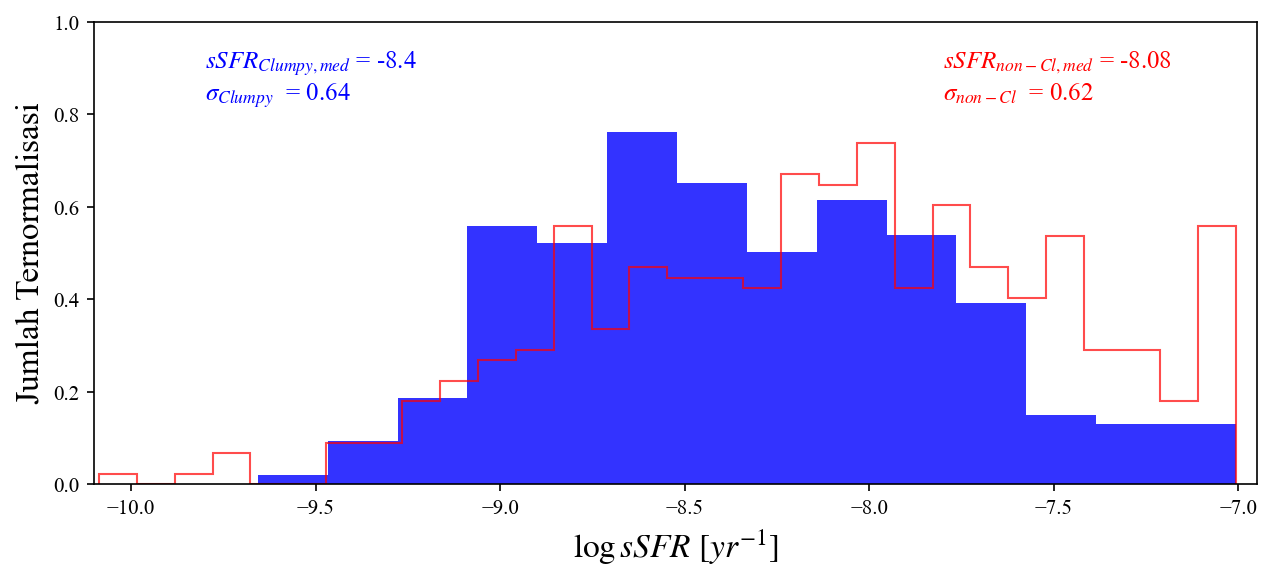

In [41]:
# Create the ax1 and axis

sSFR_med_nc = statistics.median(sSFR[N])
sSFR_sig_nc = statistics.stdev(sSFR[N])

sSFR_med_cl = statistics.median(sSFR[C])
sSFR_sig_cl = statistics.stdev(sSFR[C])

fig, ax = plt.subplots(figsize=(10, 4), dpi=150)

ax.hist(sSFR[C], bins=30, color='blue', alpha=0.8, density=True)
ax.hist(sSFR[N], bins=30, color='red', alpha=0.7, density=True, histtype='step')

ax.text(-9.8, 0.9, r'$sSFR_{Clumpy,med}$ = ' + str(np.round(sSFR_med_cl, 2)), fontsize=12, color='blue')
ax.text(-9.8, 0.83, r'$\sigma_{Clumpy}$  = ' + str(np.round(sSFR_sig_cl, 2)), fontsize=12, color='blue')

ax.text(-7.8,0.9, r'$sSFR_{non-Cl,med}$ = ' + str(np.round(sSFR_med_nc, 2)), fontsize=12, color='red')
ax.text(-7.8,0.83, r'$\sigma_{non-Cl}$  = ' + str(np.round(sSFR_sig_nc, 2)), fontsize=12, color='red')

ax.set_xlabel(r'$\log{sSFR} \  [yr^{-1}]$', fontsize=16)
ax.set_ylabel(r'Jumlah Ternormalisasi', fontsize=16)
#ax.legend()

plt.xlim(-10.1, -6.95)
plt.ylim(0, 1)
# Show the plot
plt.savefig('ssfr.png', bbox_inches='tight')


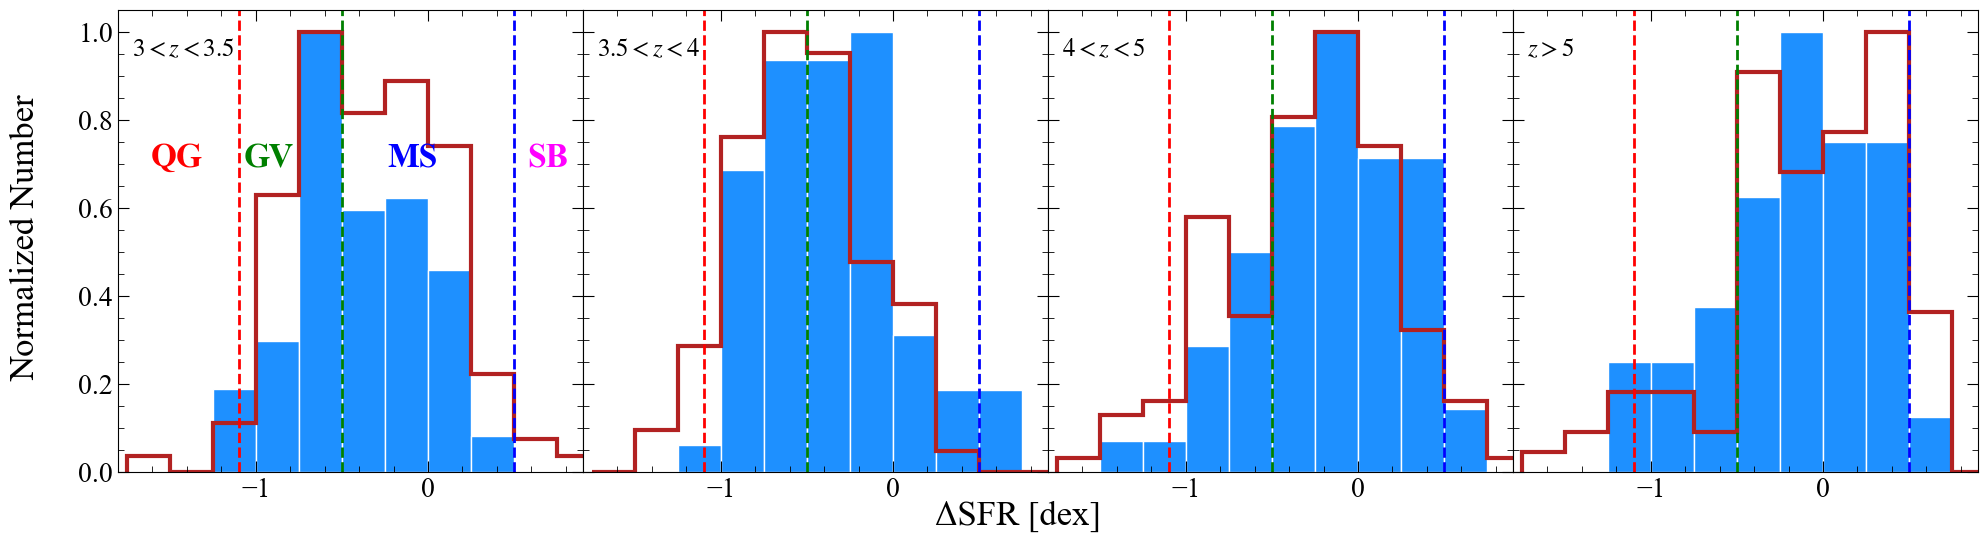

In [53]:
%matplotlib inline

# fig, axn = plt.subplots(2, 2, figsize=(12, 12), sharex='col', sharey='row')
fig, axn = plt.subplots(1, 4, figsize=(24, 6), sharex='col', sharey='row')
fig.subplots_adjust(wspace=0, hspace=0)

params = [Rsb]
params_label = ['ΔSFR [dex]']
label = ['$3<z<3.5$', '$3.5<z<4$', '$4<z<5$', '$z>5$']
coord = [(x, y) for x in range(2) for y in range(2)]

pos = 0
for j in range(len(np.unique(X['bin3']))):
    for i in range(len(params)):
        #ax = axn[coord[j]]
        ax = axn[j]
        ax.text(0.03, 0.9, label[j], transform=ax.transAxes, multialignment='center', fontsize=18)
        if j==0:
            ax.text(0.07, 0.66, 'QG', transform=ax.transAxes, color='red', fontsize=24, fontweight='black')
            ax.text(0.27, 0.66, 'GV', transform=ax.transAxes, color='green', fontsize=24, fontweight='black')
            ax.text(0.58, 0.66, 'MS', transform=ax.transAxes, color='blue', fontsize=24, fontweight='black')
            ax.text(0.88, 0.66, 'SB', transform=ax.transAxes, color='magenta', fontsize=24, fontweight='black')

        Ct = np.where((X['bin3'] == j+1) & (X['Type']=='C'))
        Nt = np.where((X['bin3'] == j+1) & (X['Type']=='N'))
        
        nbin = 12
        bins = np.linspace(-1.625, 1.125, nbin)
        hist_c, bins_c = np.histogram(params[i][Ct], bins=bins)
        hist_n, bins_n = np.histogram(params[i][Nt], bins=bins)
        norm_c = hist_c/max(hist_c)
        norm_n = hist_n/max(hist_n)
        width = bins_c[1]-bins_c[0]
        
        ax.bar(bins[:-1], norm_c, width=width, label='Clumpy', color='dodgerblue', edgecolor='white')
        ax.stairs(norm_n, bins-width/2, label='Non-Clumpy', fill=False, edgecolor='firebrick', linewidth=3)
        #ax.hist(C[params[i]], label='Clumpy', bins=bins, density=True, color='turquoise', edgecolor='paleturquoise')
        #ax.hist(N[params[i]], label='Non-Clumpy', bins=bins, density=True, histtype='step', color='black', linewidth=2)
    
        ax.axvline(0.5, color='blue', linestyle='--', linewidth=2)
        ax.axvline(-0.5, color='green', linestyle='--', linewidth=2)
        ax.axvline(-1.1, color='red', linestyle='--', linewidth=2)
        #ax.set_xlabel(params_label[i], fontsize=25)
        ax.set_xlim(-1.8, 0.9)
        ax.minorticks_on()
        ax.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4, labelsize=20)
        ax.tick_params(axis="both", which='major', length=8)
        #ax.legend(fontsize=12, loc='upper right')
fig.supylabel('Normalized Number', x=0.08, fontsize=25)
fig.supxlabel('ΔSFR [dex]', y=0.01, fontsize=25)
plt.savefig('rsb.png', bbox_inches='tight', dpi=300)

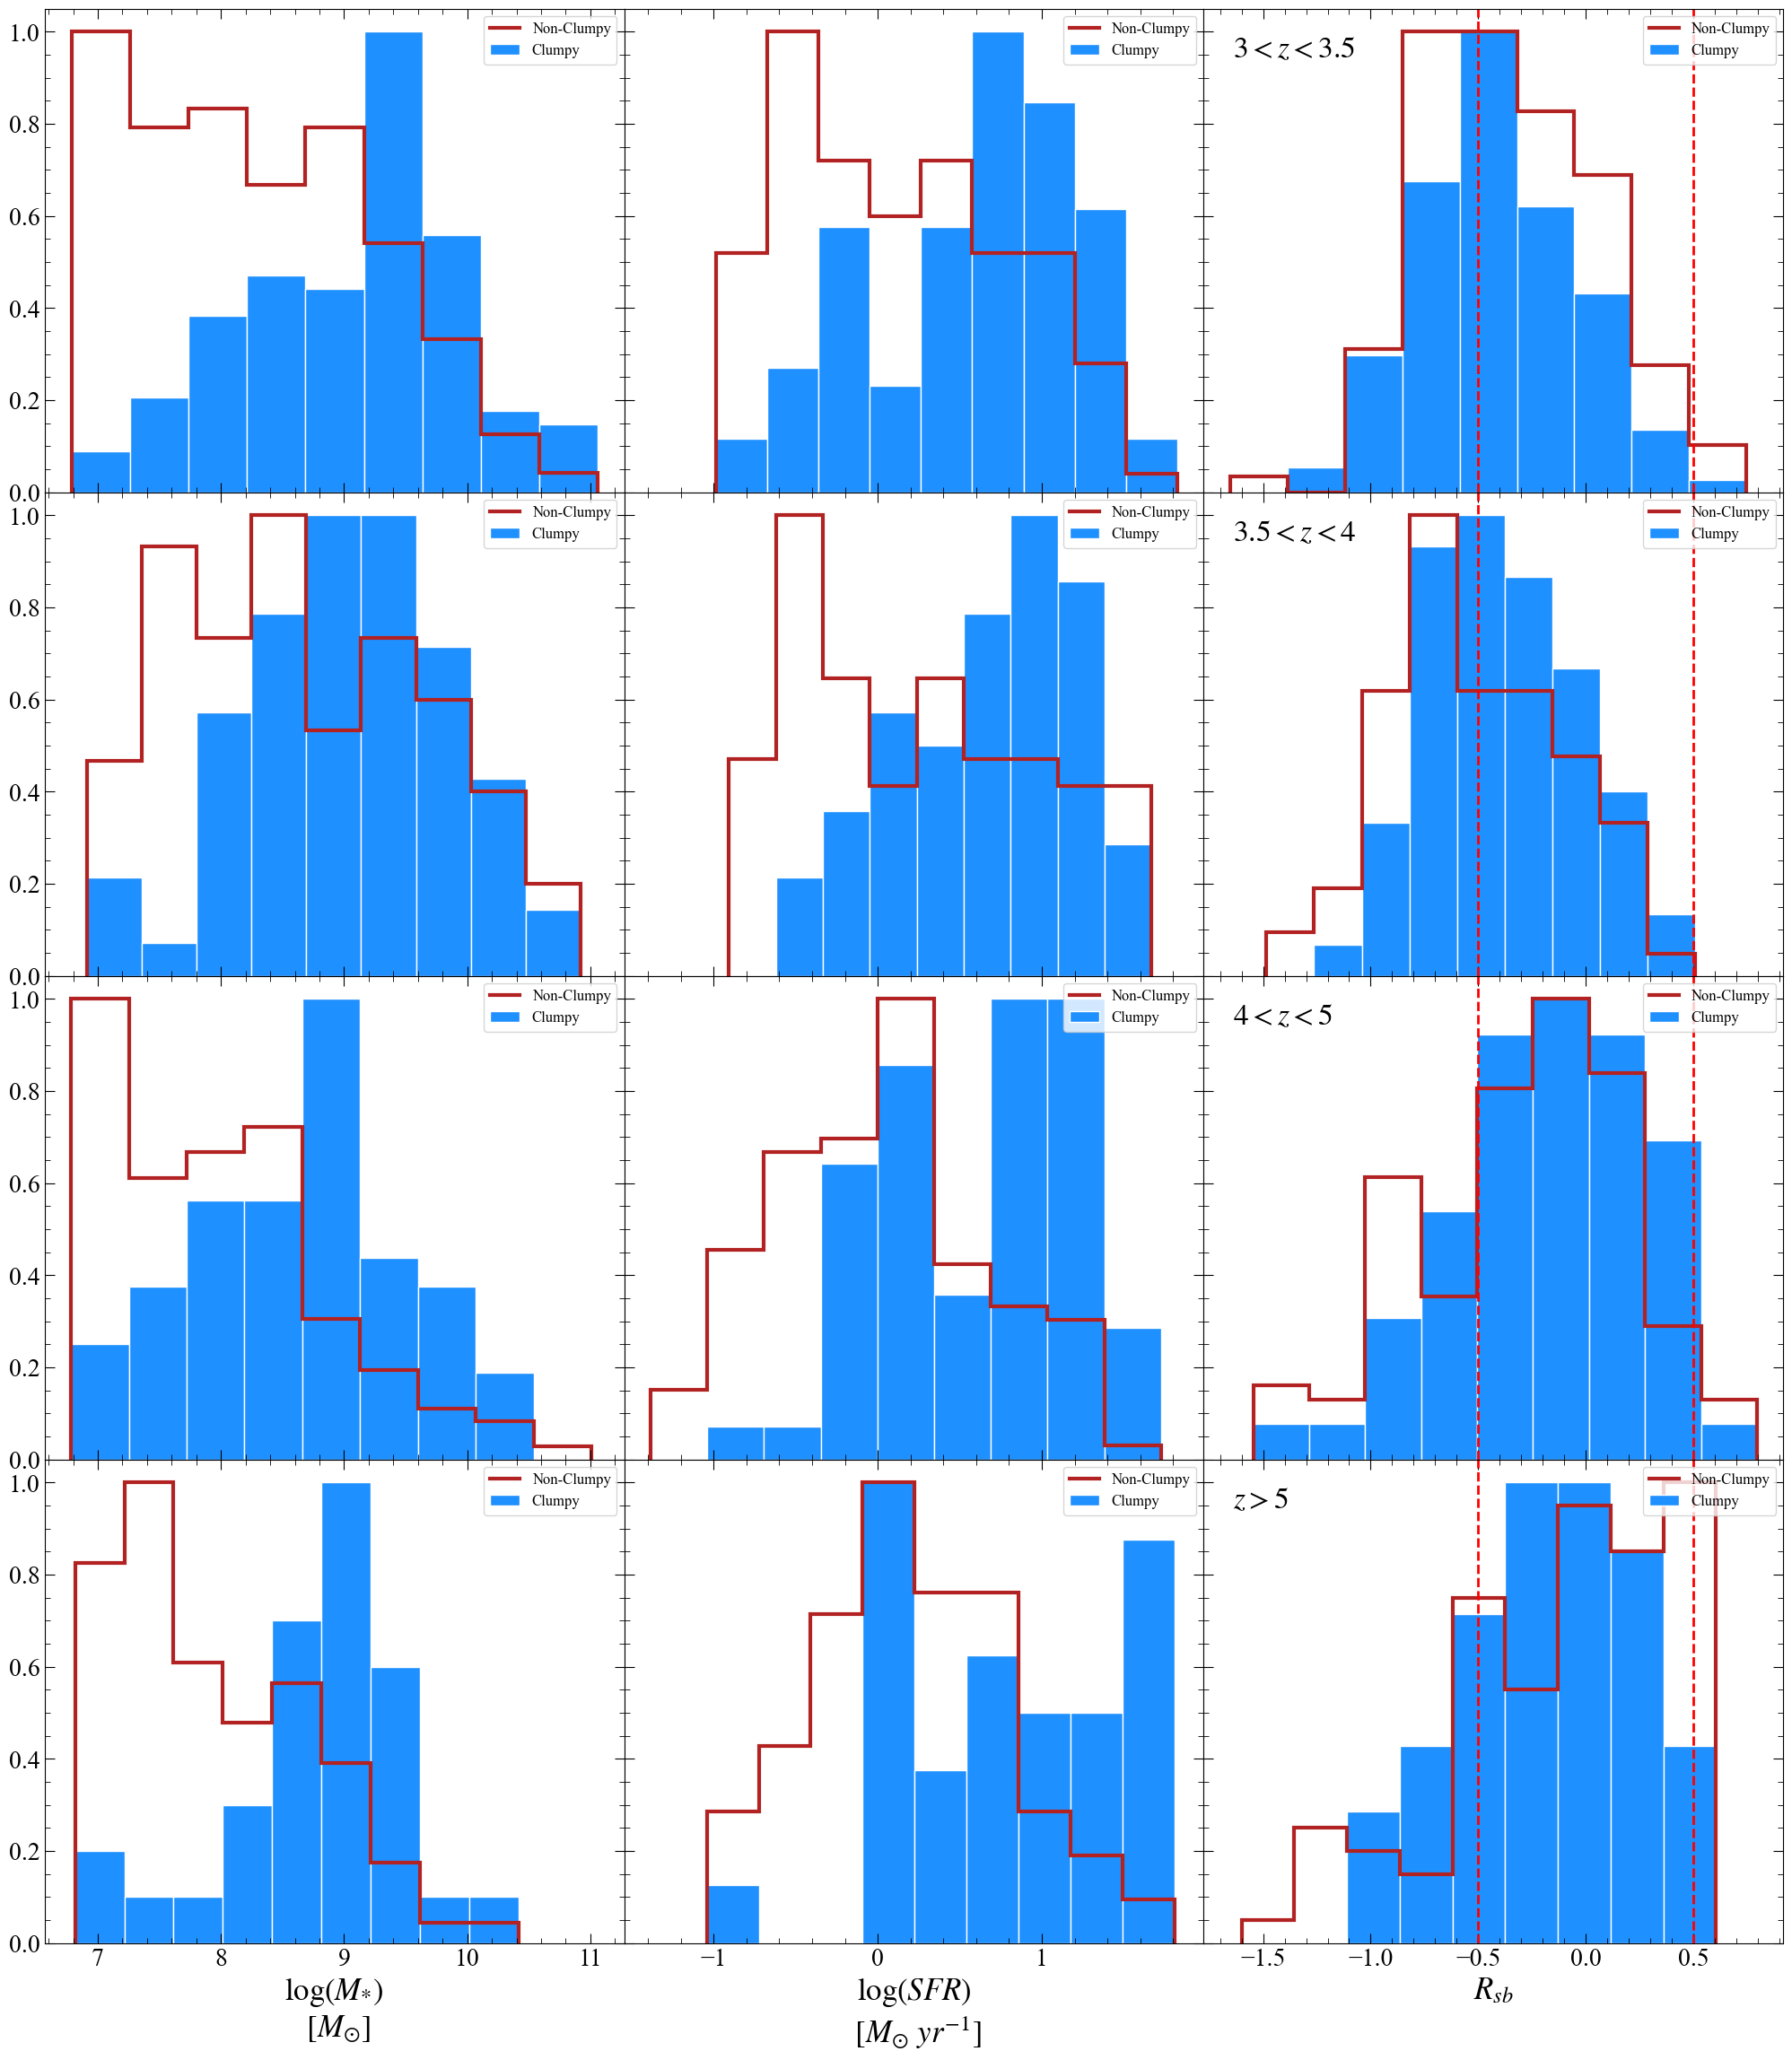

In [36]:
%matplotlib inline

fig, axn = plt.subplots(4, 3, figsize=(25, 28), sharex='col', sharey='row')
fig.subplots_adjust(wspace=0, hspace=0)

params = [M, SFR, Rsb]
params_label = ['$\log(M_{*})$' + '\n $[M_{\odot}]$', '$\log(SFR)$' + '\n $[M_{\odot}\ yr^{-1}]$', '$R_{sb}$']
label = ['$3<z<3.5$', '$3.5<z<4$', '$4<z<5$', '$z>5$']

pos = 0
for j in range(len(np.unique(X['bin3']))):
    for i in range(len(params)):
        ax = axn[j, i]
        if i == 2:
            ax.text(0.05, 0.9, label[j], transform=ax.transAxes, multialignment='center', fontsize=24)
        
        Ct = np.where((X['bin3'] == j+1) & (X['Type']=='C'))
        Nt = np.where((X['bin3'] == j+1) & (X['Type']=='N'))

        nbin = 10
        bins = np.linspace(min(params[i][Nt]), max(params[i][Nt]), nbin)
        hist_c, bins_c = np.histogram(params[i][Ct], bins=bins)
        hist_n, bins_n = np.histogram(params[i][Nt], bins=bins)
        norm_c = hist_c/max(hist_c)
        norm_n = hist_n/max(hist_n)
        width = bins_c[1]-bins_c[0]
        
        ax.bar(bins[:-1], norm_c, width=width, label='Clumpy', color='dodgerblue', edgecolor='white')
        ax.stairs(norm_n, bins-width/2, label='Non-Clumpy', fill=False, edgecolor='firebrick', linewidth=3)
        #ax.hist(C[params[i]], label='Clumpy', bins=bins, density=True, color='turquoise', edgecolor='paleturquoise')
        #ax.hist(N[params[i]], label='Non-Clumpy', bins=bins, density=True, histtype='step', color='black', linewidth=2)

        if i == 2:
            ax.axvline(0.5, color='red', linestyle='--', linewidth=2)
            ax.axvline(-0.5, color='red', linestyle='--', linewidth=2)
        ax.set_xlabel(params_label[i], fontsize=25)
        ax.legend(loc='upper right')
        ax.minorticks_on()
        ax.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4, labelsize=20)
        ax.tick_params(axis="both", which='major', length=8)
        ax.legend(fontsize=12, loc='upper right')

plt.savefig('bar_rsb.png', bbox_inches='tight')

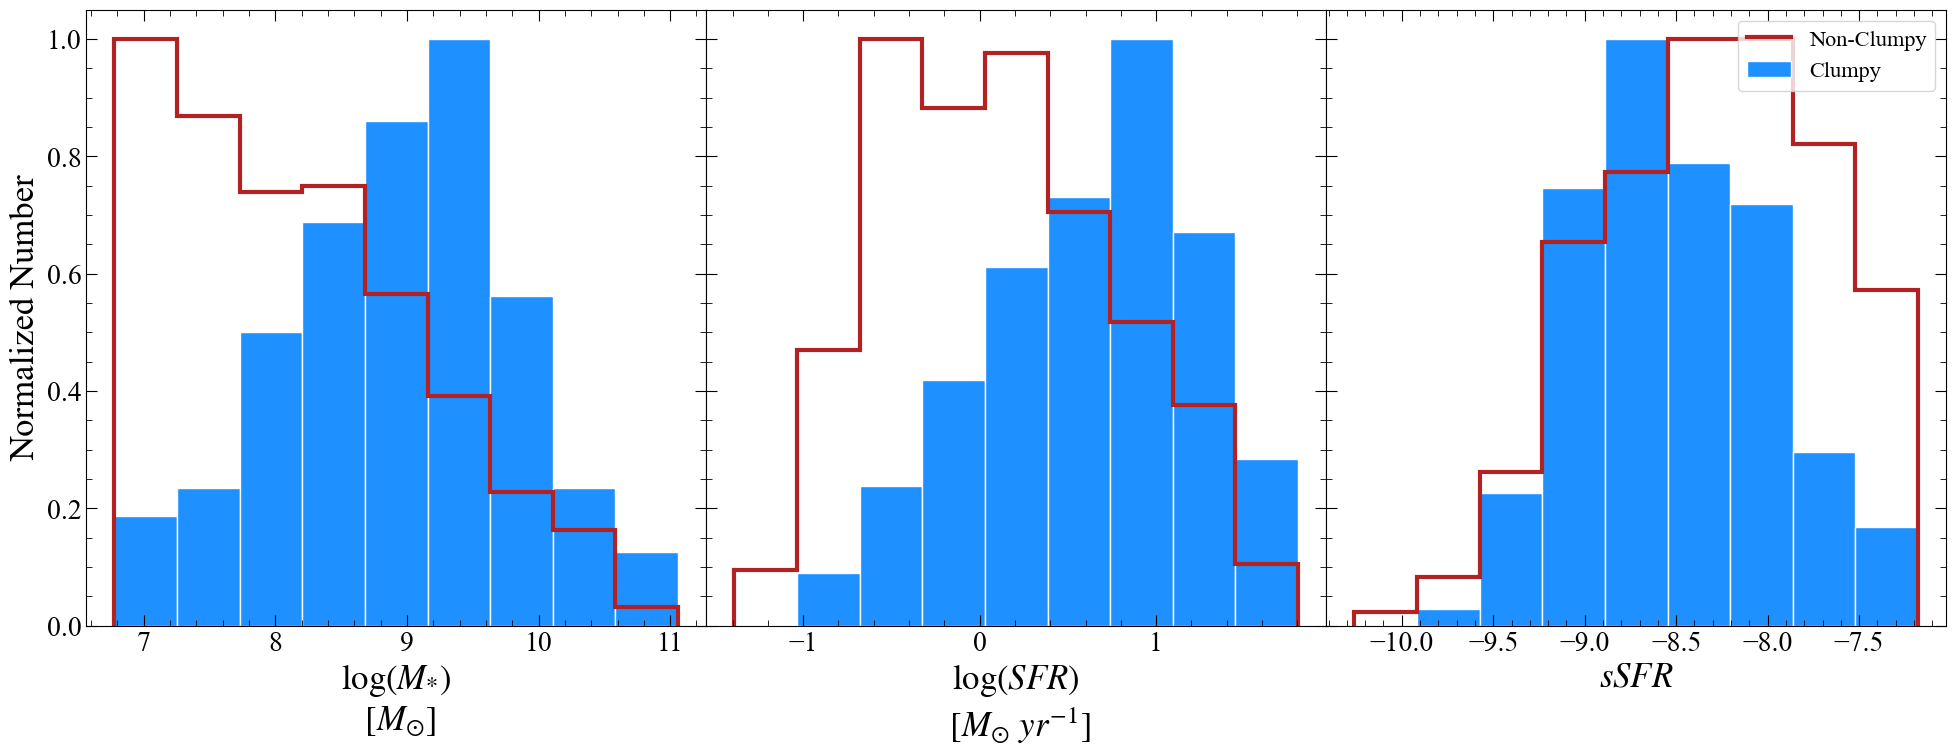

In [37]:
%matplotlib inline

fig, axn = plt.subplots(1, 3, figsize=(24, 8), sharex='col', sharey='row')
fig.subplots_adjust(wspace=0, hspace=0)

params = [M, SFR, sSFR]
params_label = ['$\log(M_{*})$' + '\n $[M_{\odot}]$', '$\log(SFR)$' + '\n $[M_{\odot}\ yr^{-1}]$', '$sSFR$']

pos = 0
for i in range(len(params)):
    ax = axn[i]

    nbin = 10
    bins = np.linspace(min(params[i][N]), max(params[i][N]), nbin)
    hist_c, bins_c = np.histogram(params[i][C], bins=bins)
    hist_n, bins_n = np.histogram(params[i][N], bins=bins)
    norm_c = hist_c/max(hist_c)
    norm_n = hist_n/max(hist_n)
    width = bins_c[1]-bins_c[0]
    
    ax.bar(bins[:-1], norm_c, width=width, label='Clumpy', color='dodgerblue', edgecolor='white')
    ax.stairs(norm_n, bins-width/2, label='Non-Clumpy', fill=False, edgecolor='firebrick', linewidth=3)
    #ax.hist(C[params[i]], label='Clumpy', bins=bins, density=True, color='turquoise', edgecolor='paleturquoise')
    #ax.hist(N[params[i]], label='Non-Clumpy', bins=bins, density=True, histtype='step', color='black', linewidth=2)

    ax.set_xlabel(params_label[i], fontsize=25)
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4, labelsize=20)
    ax.tick_params(axis="both", which='major', length=8)
    if i==0:
        ax.set_ylabel('Normalized Number', fontsize=25)
    if i==2:
        ax.legend(fontsize=16, loc='upper right')

plt.savefig('bar_sfr.png', bbox_inches='tight')

C:\Users\Ryo\AppData\Local\Temp\ipykernel_19044\2115869426.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x_d, x_d], [y1_d, y2_d], 'k--', label=f'D = {D:.3f}', color='green', zorder=0)


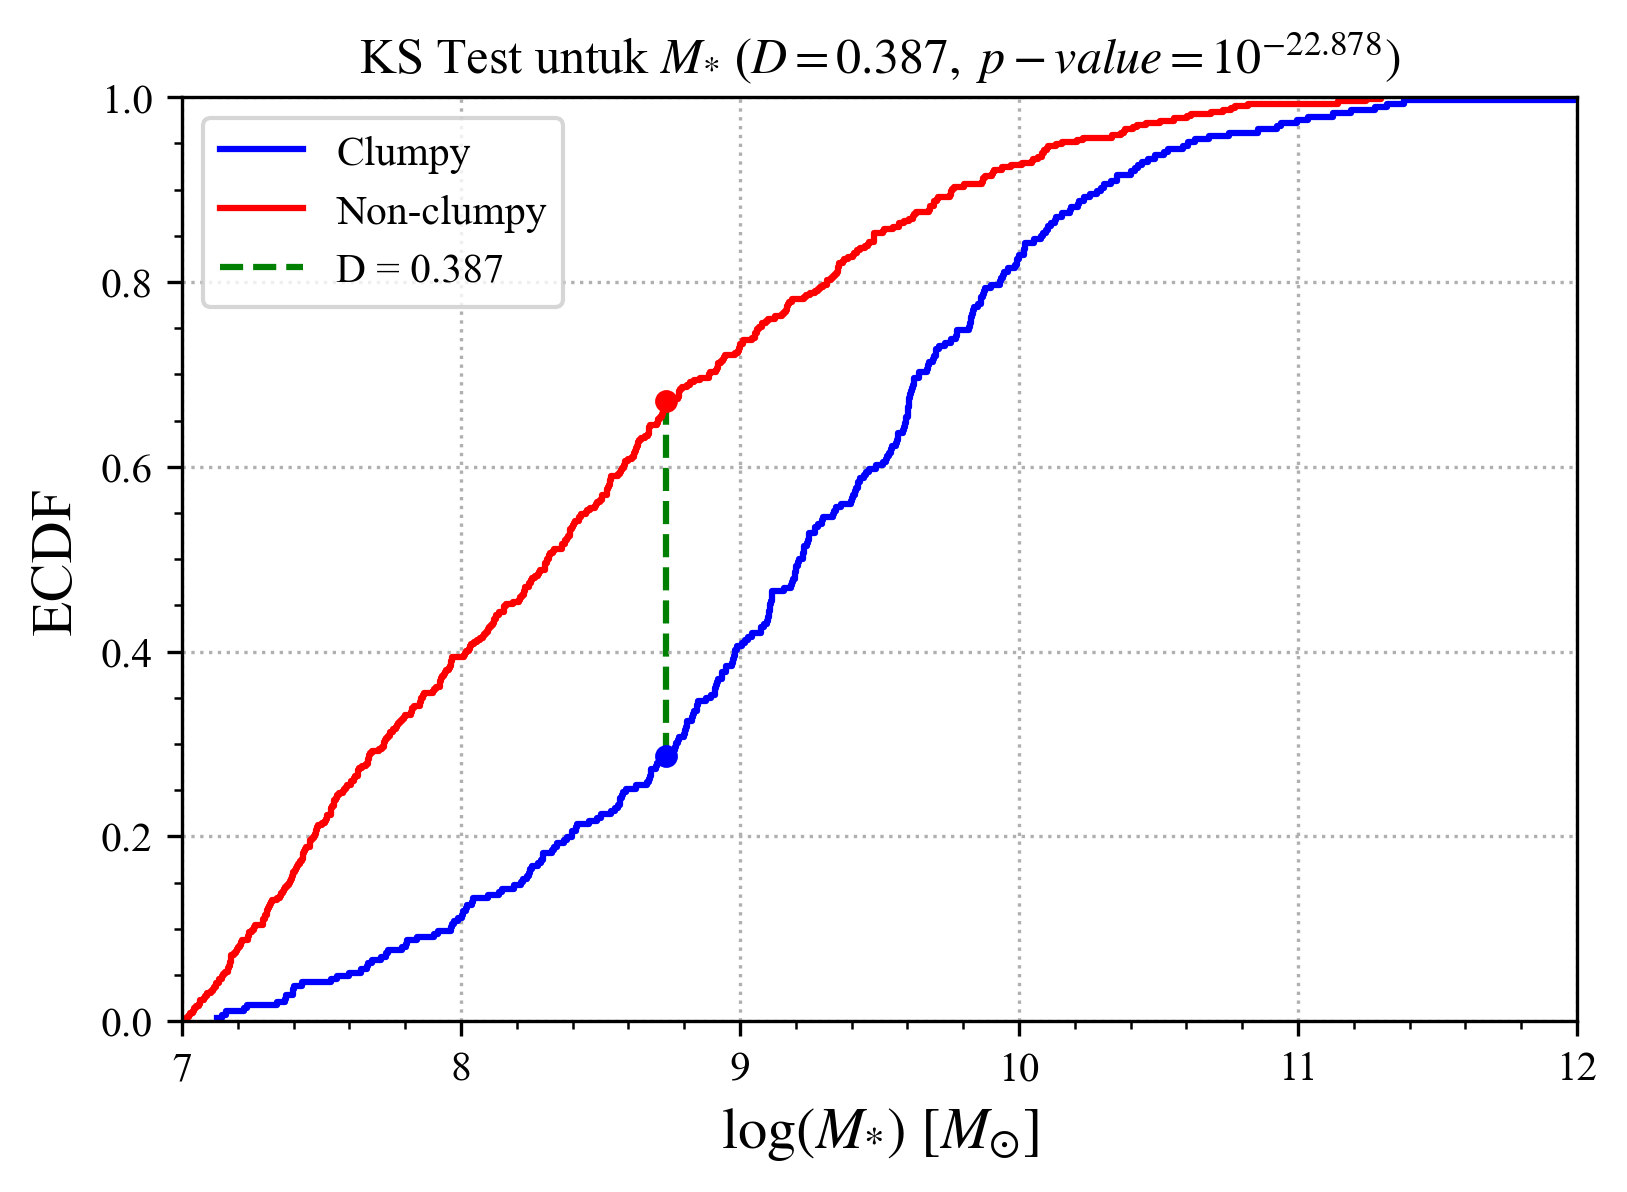

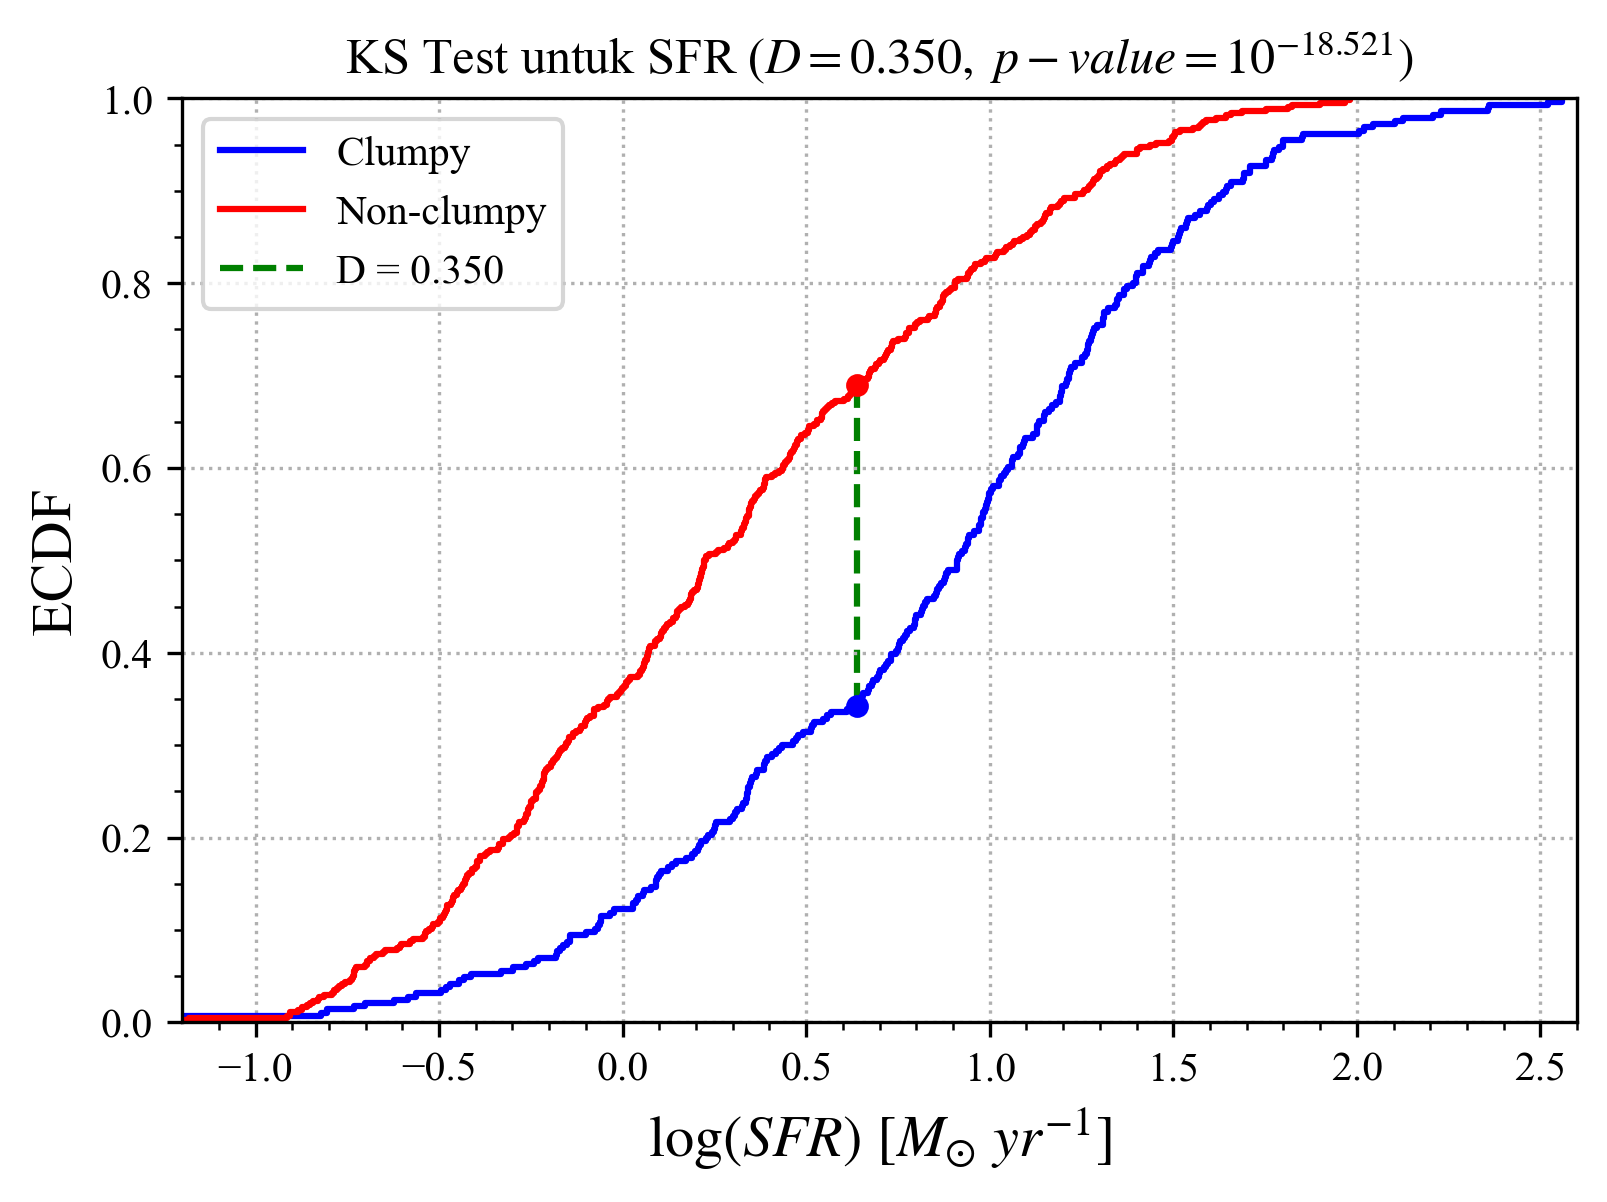

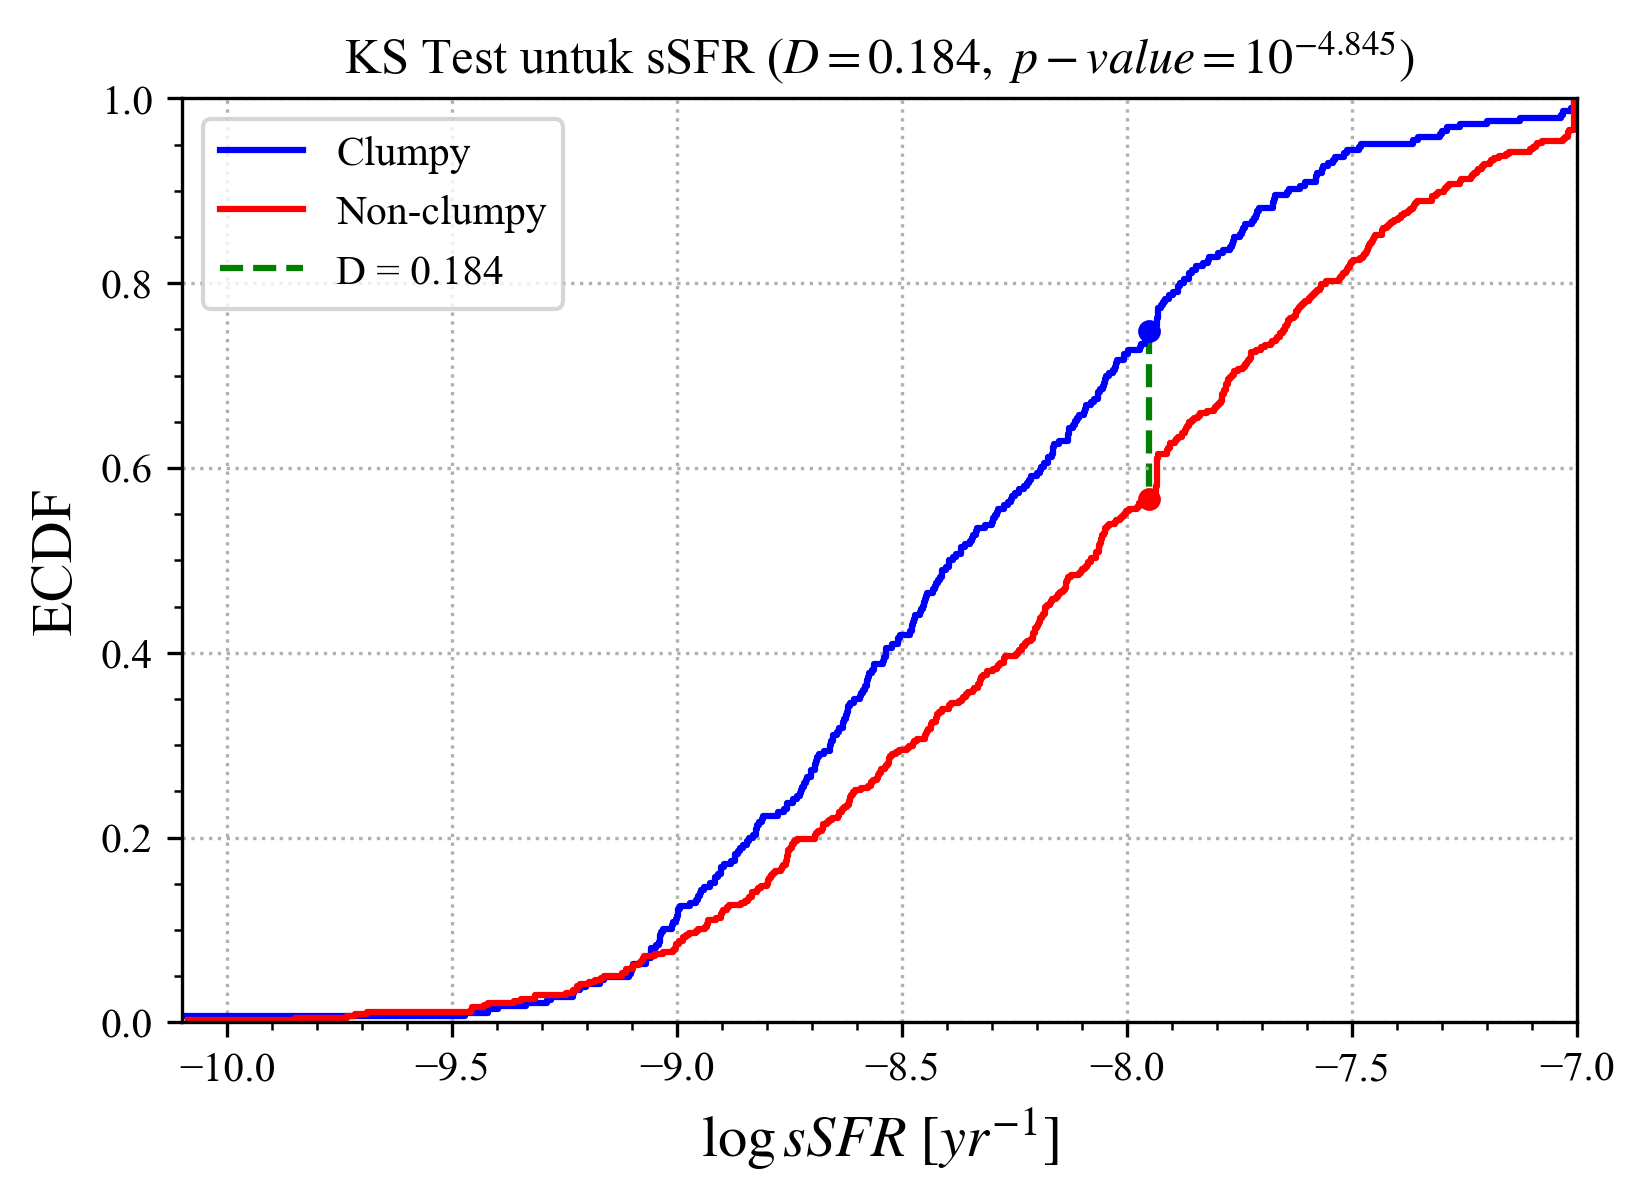

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

params = [M, SFR, sSFR]
params_label = ['$\log(M_{*})$' + ' $[M_{\odot}]$', '$\log(SFR)$' + ' $ [M_{\odot}\ yr^{-1}]$', '$\log{sSFR}$' + '$\ [yr^{-1}]$']
params_lab = ['$M_{*}$', 'SFR', 'sSFR']
xlim = [[7, 12], [-1.2, 2.6], [-10.1, -7]]

file_name = ['M', 'SFR', 'sSFR']
for i in range(len(params)):
    # Generate some sample data
    data_C = params[i][C]
    data_N = params[i][N]
    
    # Compute the KS test
    D, p_value = stats.ks_2samp(data_C, data_N)
    
    # Compute the ECDFs
    def ecdf(data):
        x = np.sort(data)
        y = np.arange(1, len(data) + 1) / len(data)
        return x, y
    
    x1, y1 = ecdf(data_C)
    x2, y2 = ecdf(data_N)
    
    fig = plt.figure(figsize=(6, 4), dpi=300)
    
    # Plot the ECDFs
    plt.step(x1, y1, where='post', color='blue', label='Clumpy')
    plt.step(x2, y2, where='post', color='red', label='Non-clumpy')
    
    # Find the point of maximum difference
    diff = np.abs(y1 - np.interp(x1, x2, y2))
    idx = np.argmax(diff)
    x_d = x1[idx]
    y1_d = y1[idx]
    y2_d = np.interp(x_d, x2, y2)
    
    # Plot the D statistic
    plt.scatter([x_d], [y1_d], color='blue', s=20)
    plt.scatter([x_d], [y2_d], color='red', s=20)
    plt.plot([x_d, x_d], [y1_d, y2_d], 'k--', label=f'D = {D:.3f}', color='green', zorder=0)
    
    
    # Add labels and legend
    plt.ylim(0, 1)
    plt.xlim(xlim[i][0], xlim[i][1])
    plt.grid(visible=True, linestyle=':')
    plt.minorticks_on()
    plt.xlabel(params_label[i], fontsize=14)
    plt.ylabel('ECDF', fontsize=14)
    plt.legend()
    plt.title('KS Test untuk ' + params_lab[i] + ' ($D={:.3f}, \ p-value=10^{{{:.3f}}})$'.format(D, np.log10(p_value)))

    plt.savefig('KS Test {}.png'.format(file_name[i]), bbox_inches='tight', dpi=300)
    # Show plot
    plt.show()


### Clumpy Fraction

C:\Users\Ryo\AppData\Local\Temp\ipykernel_4492\2473179711.py:87: UserWarning: You passed a edgecolor/edgecolors ('xkcd:bluish') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(ref['z'], ref['frac'], s=80, facecolor=facecolor, edgecolor=color_list[i], lw=3,


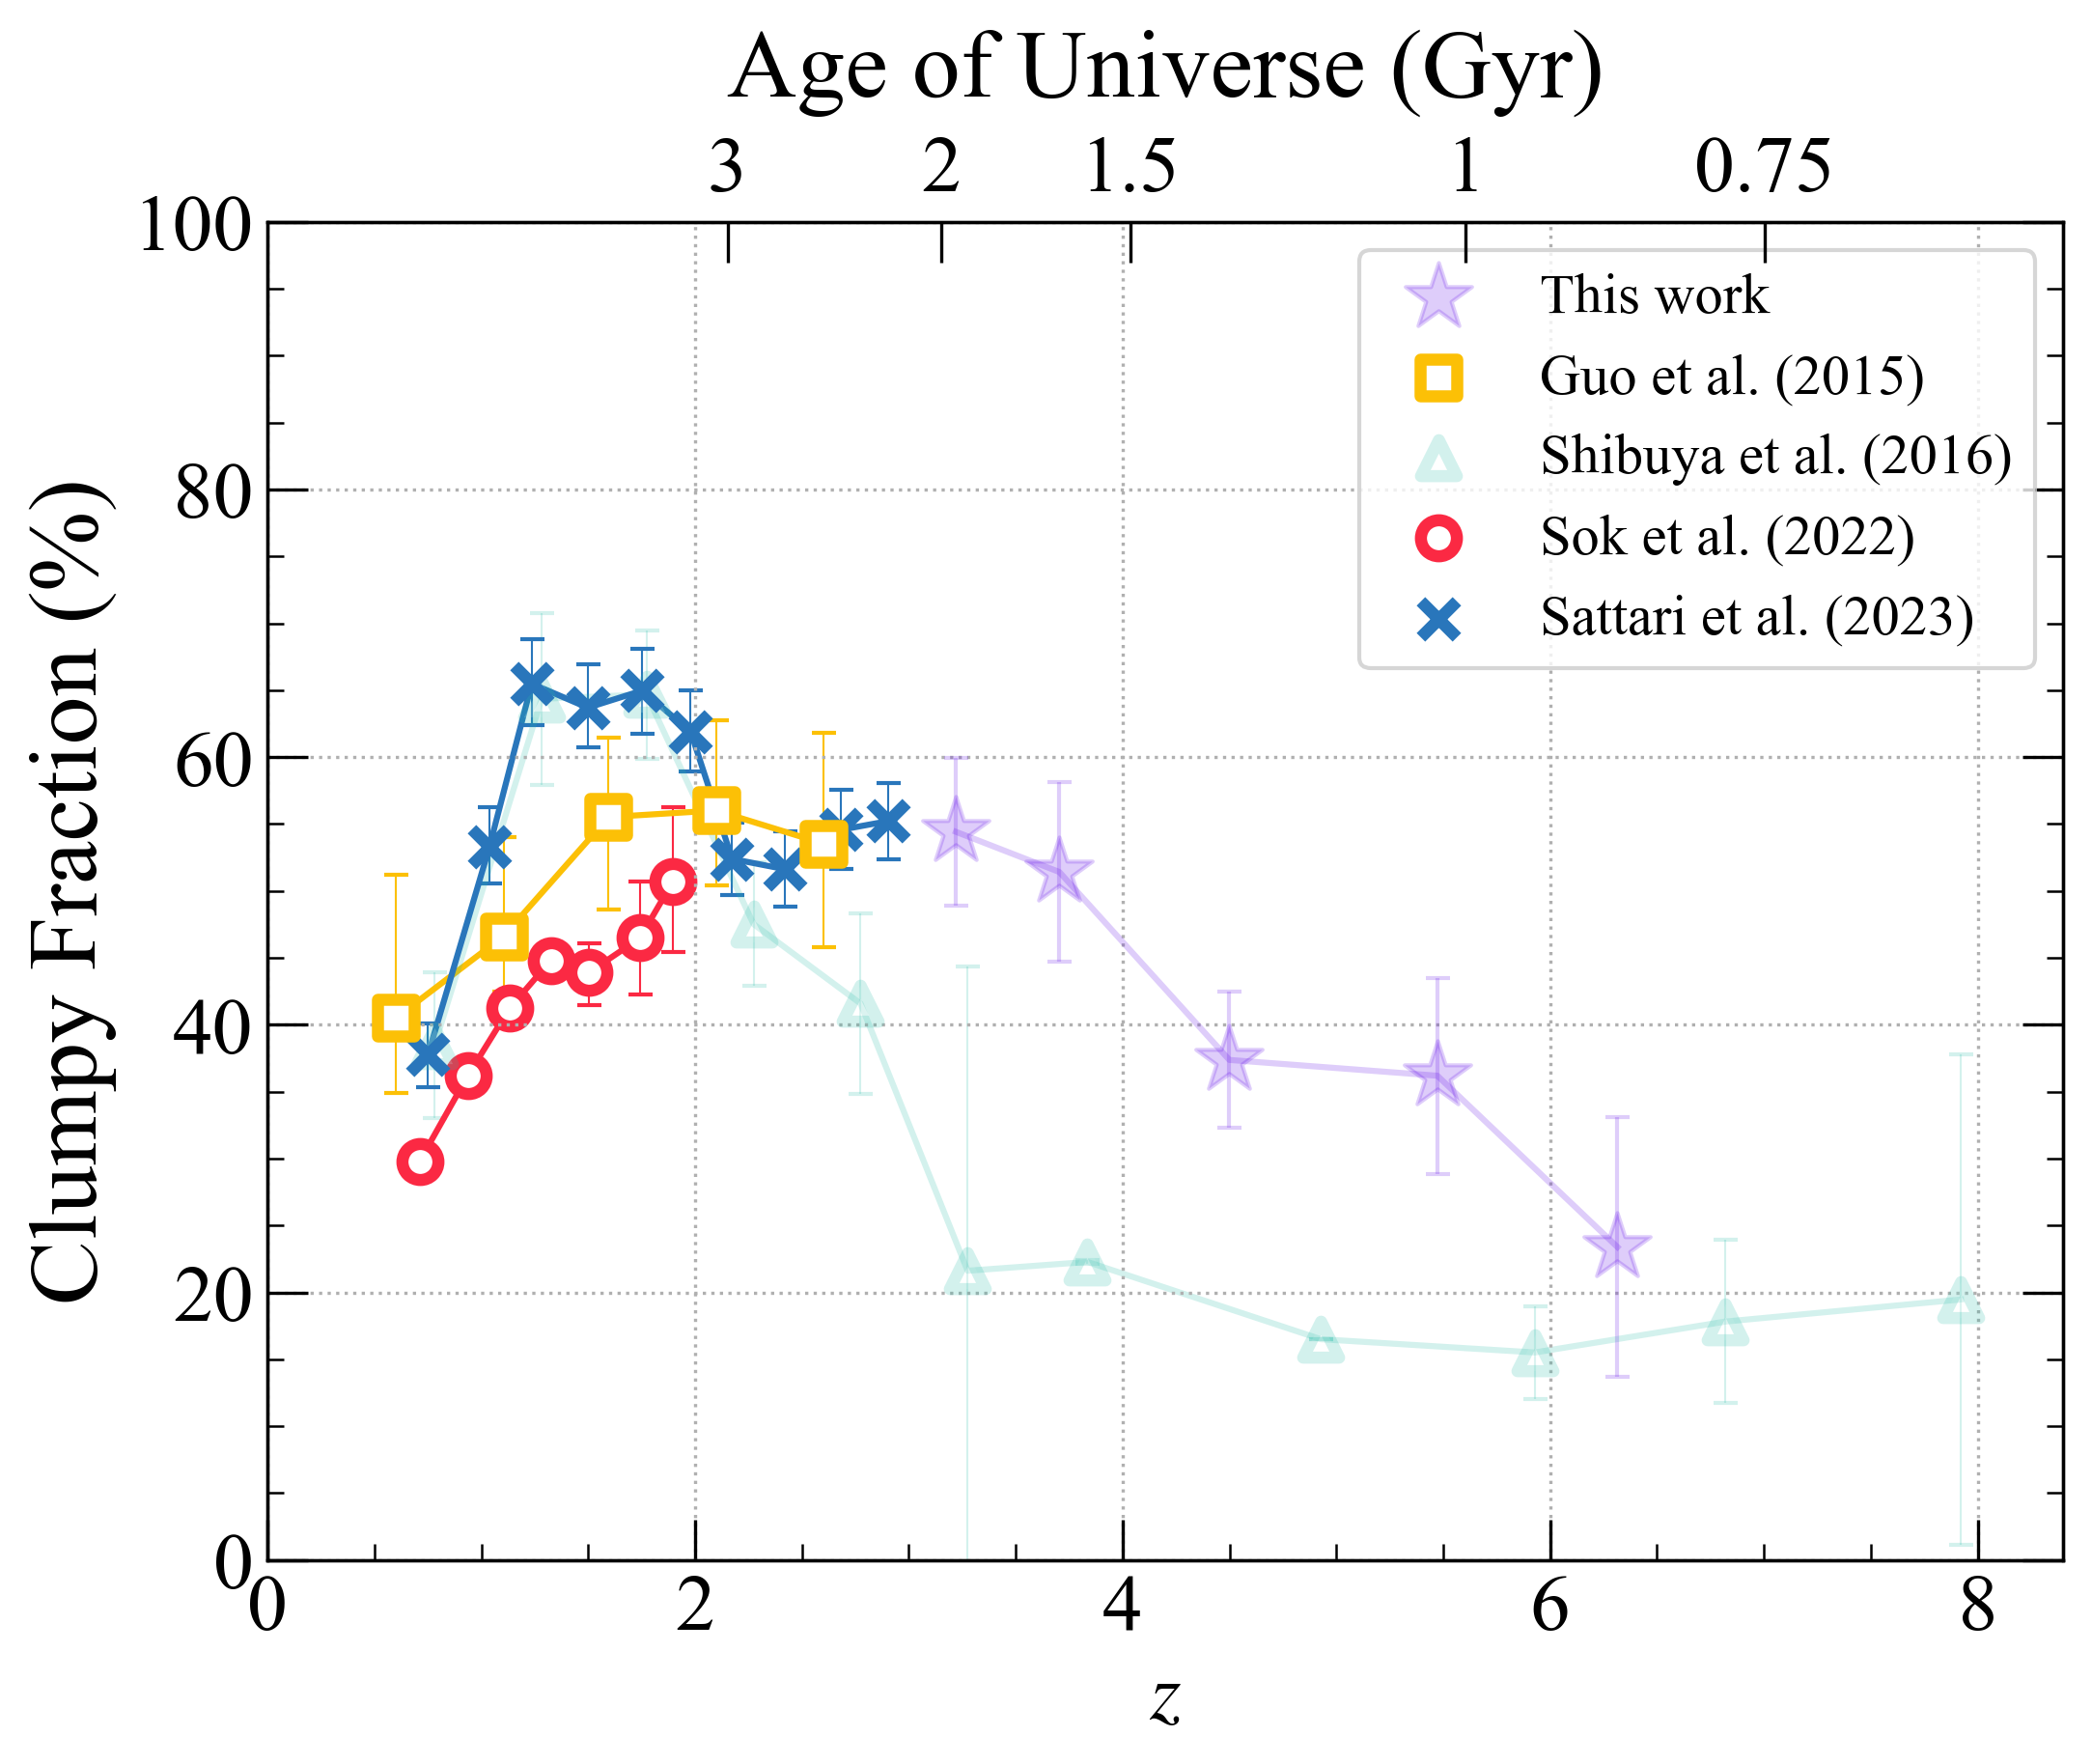

In [51]:
# Function definition

# Number fraction
def fraction(a, b):
    return a/b

# Number fraction error
def fraction_err(a, b):
    a_err = np.sqrt(a)
    b_err = np.sqrt(b)
    return np.sqrt((a_err / b)**2 + (a / b**2 * b_err)**2)

# Number fraction completeness correction
def comp_corr(f, X):
    n = 2
    return f + 1/n * (1/X - 1) * f - 1/n * (1/X - 1) * f**2

# Number fraction completeness correction error
def comp_err(f, X, e_f):
    n = 2
    return e_f * (1 + 1/n * (1/X - 1) - 2/n * (1/X - 1) * f)
    
# Completeness file
co = pd.read_csv('comple.csv')
Mark = co['Mark']

# bins on redshifts
bins = [3, 3.5, 4, 5, 6, 11]

# Dictionary for counting
Ncom = {bin: 0 for bin in bins[:-1]} 
Nclm = {bin: 0 for bin in bins[:-1]}
Ngal = {bin: 0 for bin in bins[:-1]}
zlist = {bin: [] for bin in bins[:-1]}
# Counting
for z_bin_l, z_bin_r in zip(bins, bins[1:]):
    for i in range(len(zsp)):
        if z_bin_l <= zsp[i] < z_bin_r:
            zlist[z_bin_l].append(zsp[i])
            Ngal[z_bin_l] += 1
            
            if types[i] == "C":
                Nclm[z_bin_l] += 1
                
            if Mark[i] == "Y":
                Ncom[z_bin_l] += 1

# Fractiona Calculation
frac_clump = []
frac_clump_e = []
z_med = []
for bin in bins[:-1]:
    if Ngal[bin] > 0:
        frac = fraction(Nclm[bin], Ngal[bin])
        frac_e = fraction_err(Nclm[bin], Ngal[bin])
        comp = fraction(Ncom[bin], Ngal[bin])
        comp_frac = comp_corr(frac, comp)
        comp_frac_e = comp_err(frac, comp, frac_e)
        frac_clump.append(comp_frac * 100)
        frac_clump_e.append(comp_frac_e * 100)
        z_med.append(np.median(zlist[bin]))

# Plot
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=300)

# Data
ax1.scatter(z_med, frac_clump, s=300, c='xkcd:blue violet', marker='*', label='This work', zorder=10, alpha=0.2)
ax1.errorbar(z_med, frac_clump, yerr=frac_clump_e, c='xkcd:blue violet', capsize=3, capthick=1, elinewidth=1, alpha=0.2)

# References
references_list = ['guo', 'shibuya', 'sok', 'sattari']
color_list = ['xkcd:marigold', 'xkcd:tealish', 'xkcd:strawberry', 'xkcd:bluish']
marker_list = ['s', '^', 'o', 'x']
zorder_list = [10, 4, 1, 7]
ref_label = ['Guo et al. (2015)', 'Shibuya et al. (2016)', 'Sok et al. (2022)', 'Sattari et al. (2023)']
for i in range((len(references_list))):
    ref_alpha = 1
    ref = pd.read_excel('clump_frac_other.xlsx', sheet_name=references_list[i])
    if i == 3: 
        facecolor='xkcd:bluish'
    else:
        facecolor='white'
    if i == 1:
        ref_alpha=0.2
    ax1.errorbar(ref['z'], ref['frac'], [ref['frac_low'], ref['frac_up']], c=color_list[i], 
                 alpha=ref_alpha, capsize=3, capthick=1, elinewidth=0.5, fmt='-', zorder=0)
    ax1.scatter(ref['z'], ref['frac'], s=80, facecolor=facecolor, edgecolor=color_list[i], lw=3,
                alpha=ref_alpha, marker=marker_list[i], label=ref_label[i], zorder=zorder_list[i])

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xlim(0, 8.4)

z = np.linspace(0.2, 8.4, 1000)
lbtime = cosmo.lookback_time(z).value

lookback_time_ticks = [0.75, 1, 1.5, 2, 3]
z_ticks = z_at_value(cosmo.age, lookback_time_ticks*u.Gyr).value

ax2.set_xticks(z_ticks)
ax2.set_xticklabels([f'{lt}' for lt in lookback_time_ticks])

ax2.tick_params(axis='x', which='both', direction='in')
ax2.tick_params(axis='x', which='major', length=10, labelsize=20)

# Customizing
ax1.grid(visible=True, linestyle=':')
ax1.set_title('Age of Universe (Gyr)', fontsize=24, pad=10)
ax1.set_xlabel('$z$', fontsize=20)
ax1.set_ylabel('Clumpy Fraction (%)', fontsize=24)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='both', direction = "in", right="on", length=4)
ax1.tick_params(axis='both', which='major', length=10, labelsize=20)
ax1.set_ylim(0,100)
ax1.set_xlim(0,8.4)
ax1.legend(fontsize=14)
plt.savefig('overall.png', bbox_inches='tight', dpi=300)
plt.show()

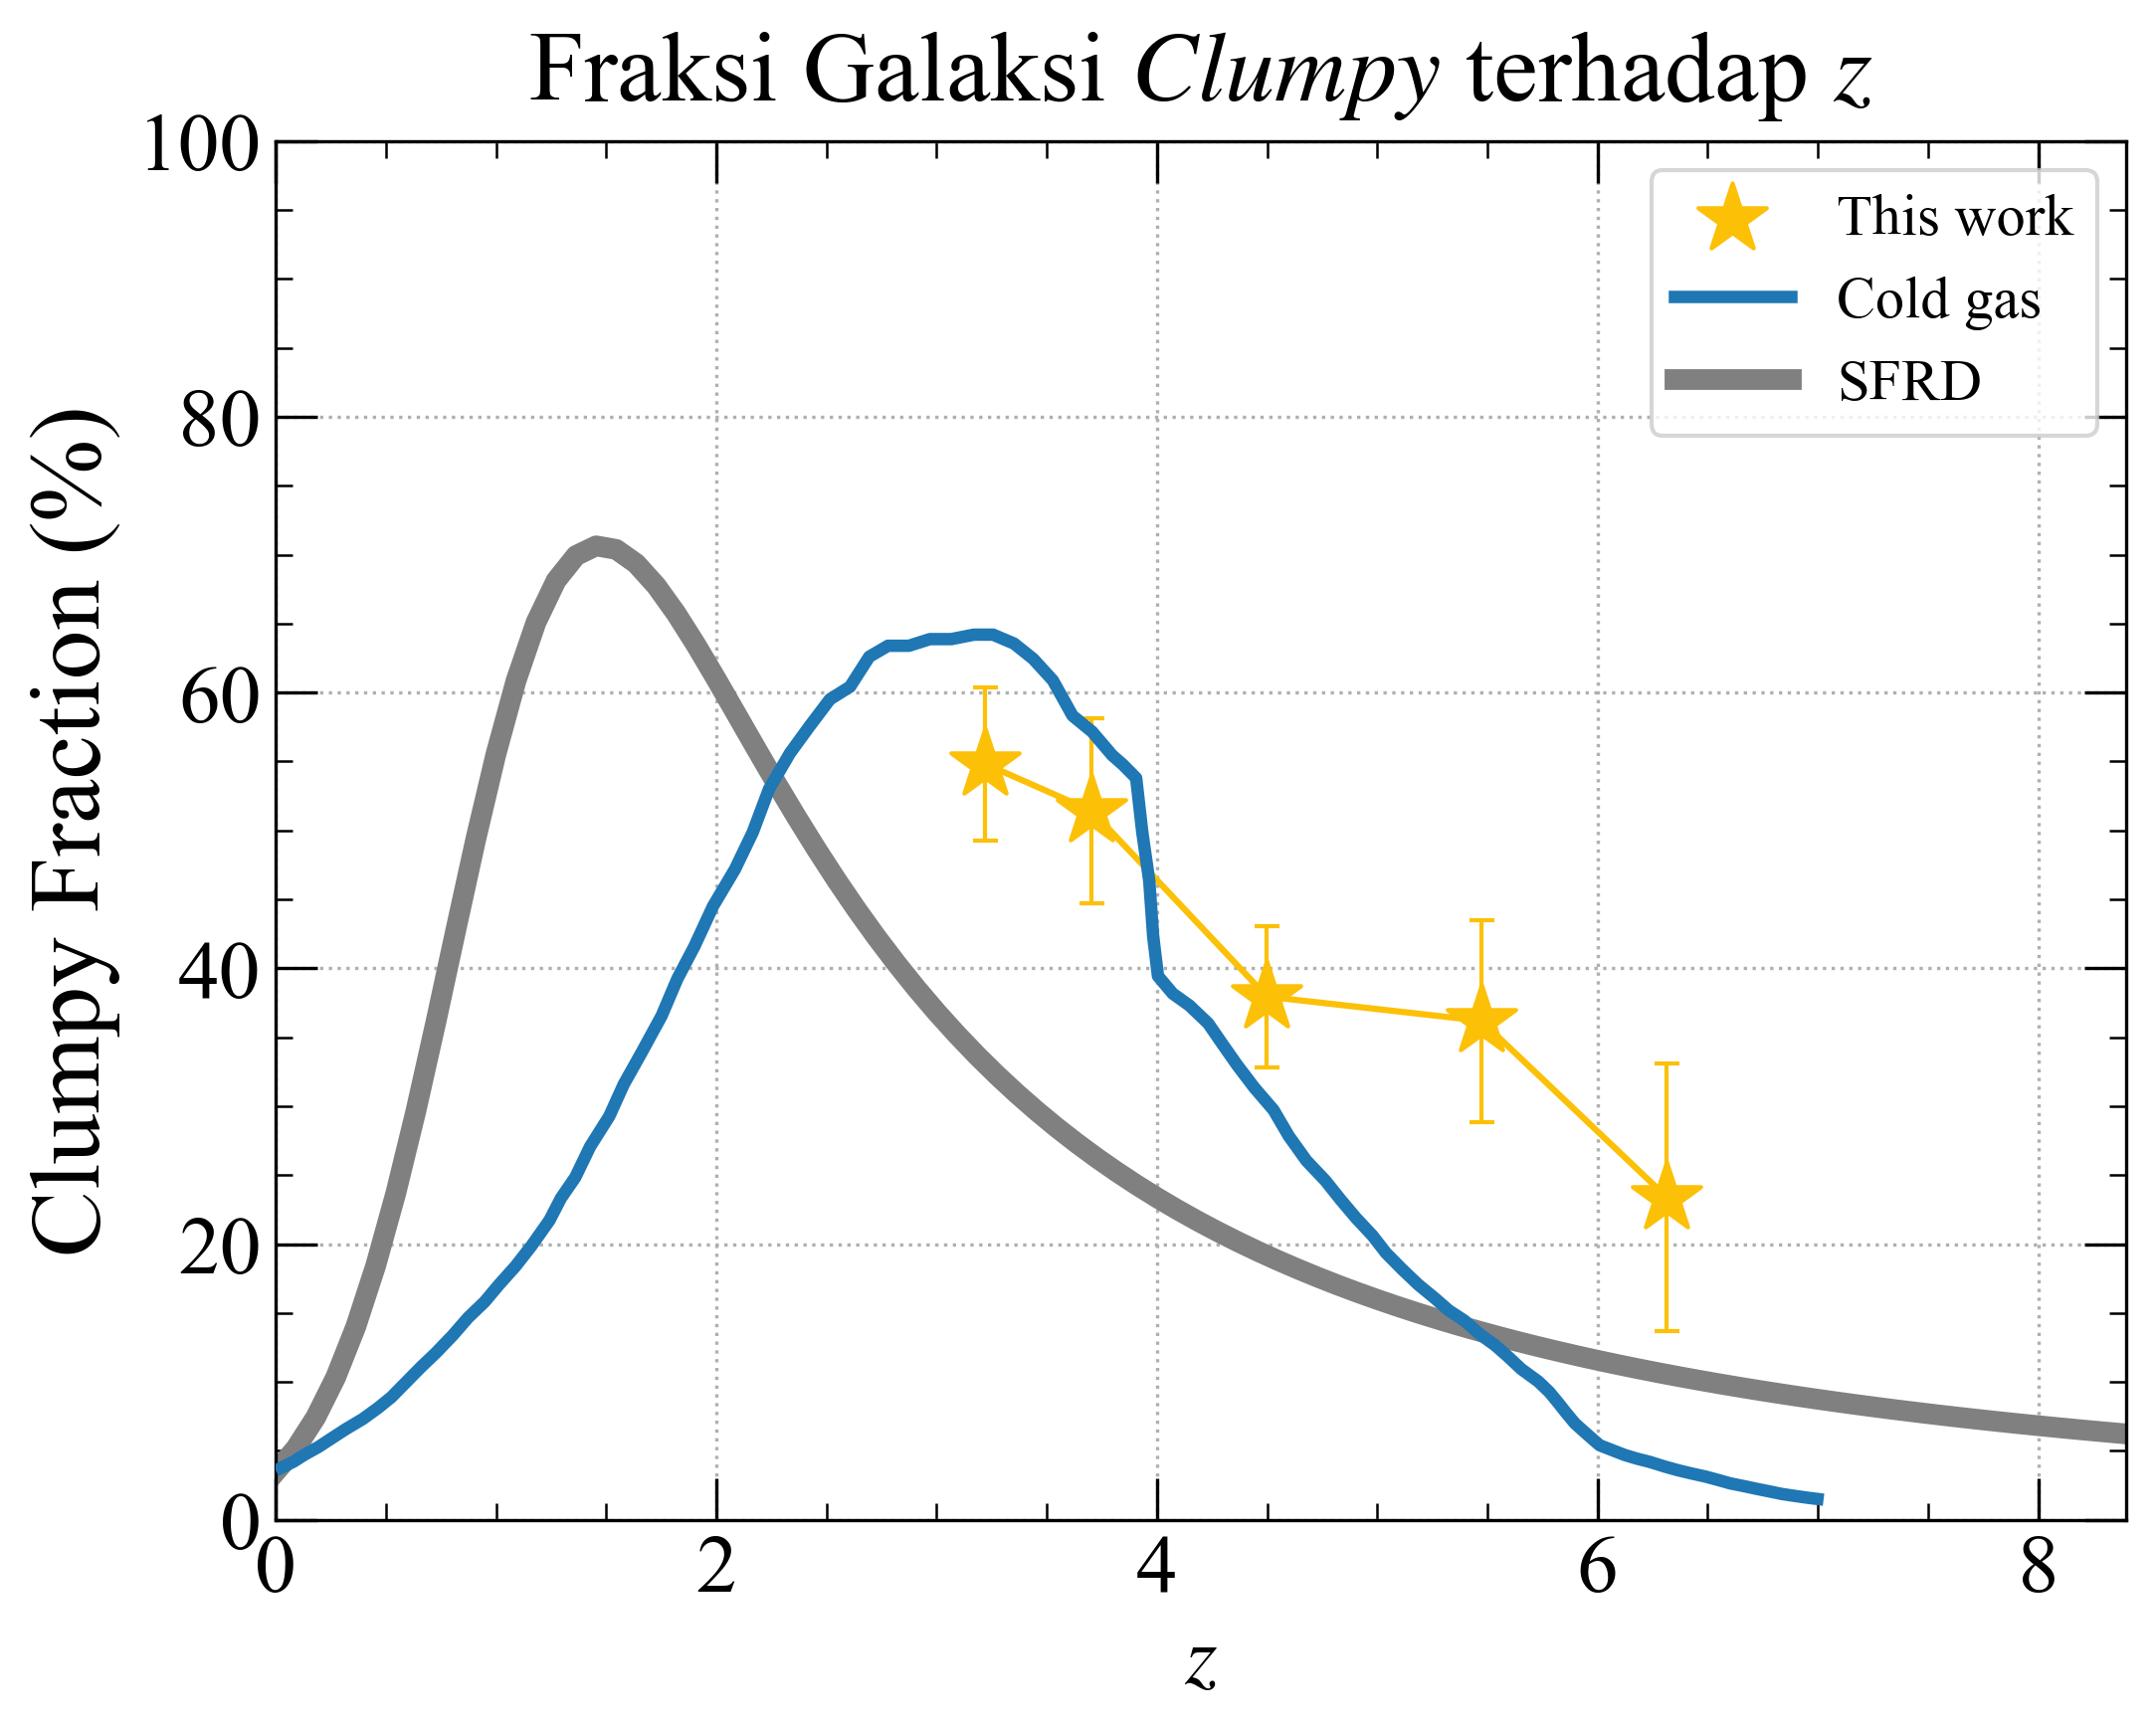

In [78]:
# Function definition

# Number fraction
def fraction(a, b):
    return a/b

# Number fraction error
def fraction_err(a, b):
    a_err = np.sqrt(a)
    b_err = np.sqrt(b)
    return np.sqrt((a_err / b)**2 + (a / b**2 * b_err)**2)

# Number fraction completeness correction
def comp_corr(f, X):
    n = 2
    return f + 1/n * (1/X - 1) * f - 1/n * (1/X - 1) * f**2

# Number fraction completeness correction error
def comp_err(f, X, e_f):
    n = 2
    return e_f * (1 + 1/n * (1/X - 1) - 2/n * (1/X - 1) * f)
    
# Completeness file
co = pd.read_csv('comple.csv')
Mark = co['Mark']

# bins on redshifts
bins = [3, 3.5, 4, 5, 6, 11]

# Dictionary for counting
Ncom = {bin: 0 for bin in bins[:-1]} 
Nclm = {bin: 0 for bin in bins[:-1]}
Ngal = {bin: 0 for bin in bins[:-1]}
zlist = {bin: [] for bin in bins[:-1]}
# Counting
for z_bin_l, z_bin_r in zip(bins, bins[1:]):
    for i in range(len(zsp)):
        if z_bin_l <= zsp[i] < z_bin_r:
            zlist[z_bin_l].append(zsp[i])
            Ngal[z_bin_l] += 1
            
            if types[i] == "C":
                Nclm[z_bin_l] += 1
                
            if Mark[i] == "Y":
                Ncom[z_bin_l] += 1

# Fractiona Calculation
frac_clump = []
frac_clump_e = []
z_med = []
for bin in bins[:-1]:
    if Ngal[bin] > 0:
        frac = fraction(Nclm[bin], Ngal[bin])
        frac_e = fraction_err(Nclm[bin], Ngal[bin])
        comp = fraction(Ncom[bin], Ngal[bin])
        comp_frac = comp_corr(frac, comp)
        comp_frac_e = comp_err(frac, comp, frac_e)
    
        frac_clump.append(comp_frac * 100)
        frac_clump_e.append(comp_frac_e * 100)
        z_med.append(np.median(zlist[bin]))

# Plot
plt.figure(figsize=(8, 6), dpi=300)

# Data
plt.scatter(z_med, frac_clump, s=300, c='xkcd:marigold', marker='*', label='This work', zorder=10)
plt.errorbar(z_med, frac_clump, yerr=frac_clump_e, c='xkcd:marigold', capsize=3, capthick=1, elinewidth=1)

# Cold gas
cg = pd.read_excel('coldgas.xlsx', sheet_name='coldgas3')
scale = 120
#cg['z'] = z_at_value(cosmo.age, np.array(cg['x'])*u.Gyr).value
cg['z'] = cg['x']
plt.plot(cg['z'], cg['y']*scale, lw=3, alpha=1, label='Cold gas', zorder=10)

zlin = np.linspace(0, 9, 100)
plt.plot(zlin, clumpy_frac(zlin, 0.035, 4.6, 2.2, 6.7), lw=5, c='grey', label='SFRD')

# Customizing
plt.grid(visible=True, linestyle=':')
plt.title('Fraksi Galaksi $Clumpy$ terhadap $z$', fontsize=24, pad=10)
plt.xlabel('$z$', fontsize=20)
plt.ylabel('Clumpy Fraction (%)', fontsize=24)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4)
plt.tick_params(axis='both', which='major', length=10, labelsize=20)
plt.ylim(0,100)
plt.xlim(0,8.4)
plt.legend(fontsize=14)
plt.savefig('overall.png', bbox_inches='tight', dpi=300)
plt.show()

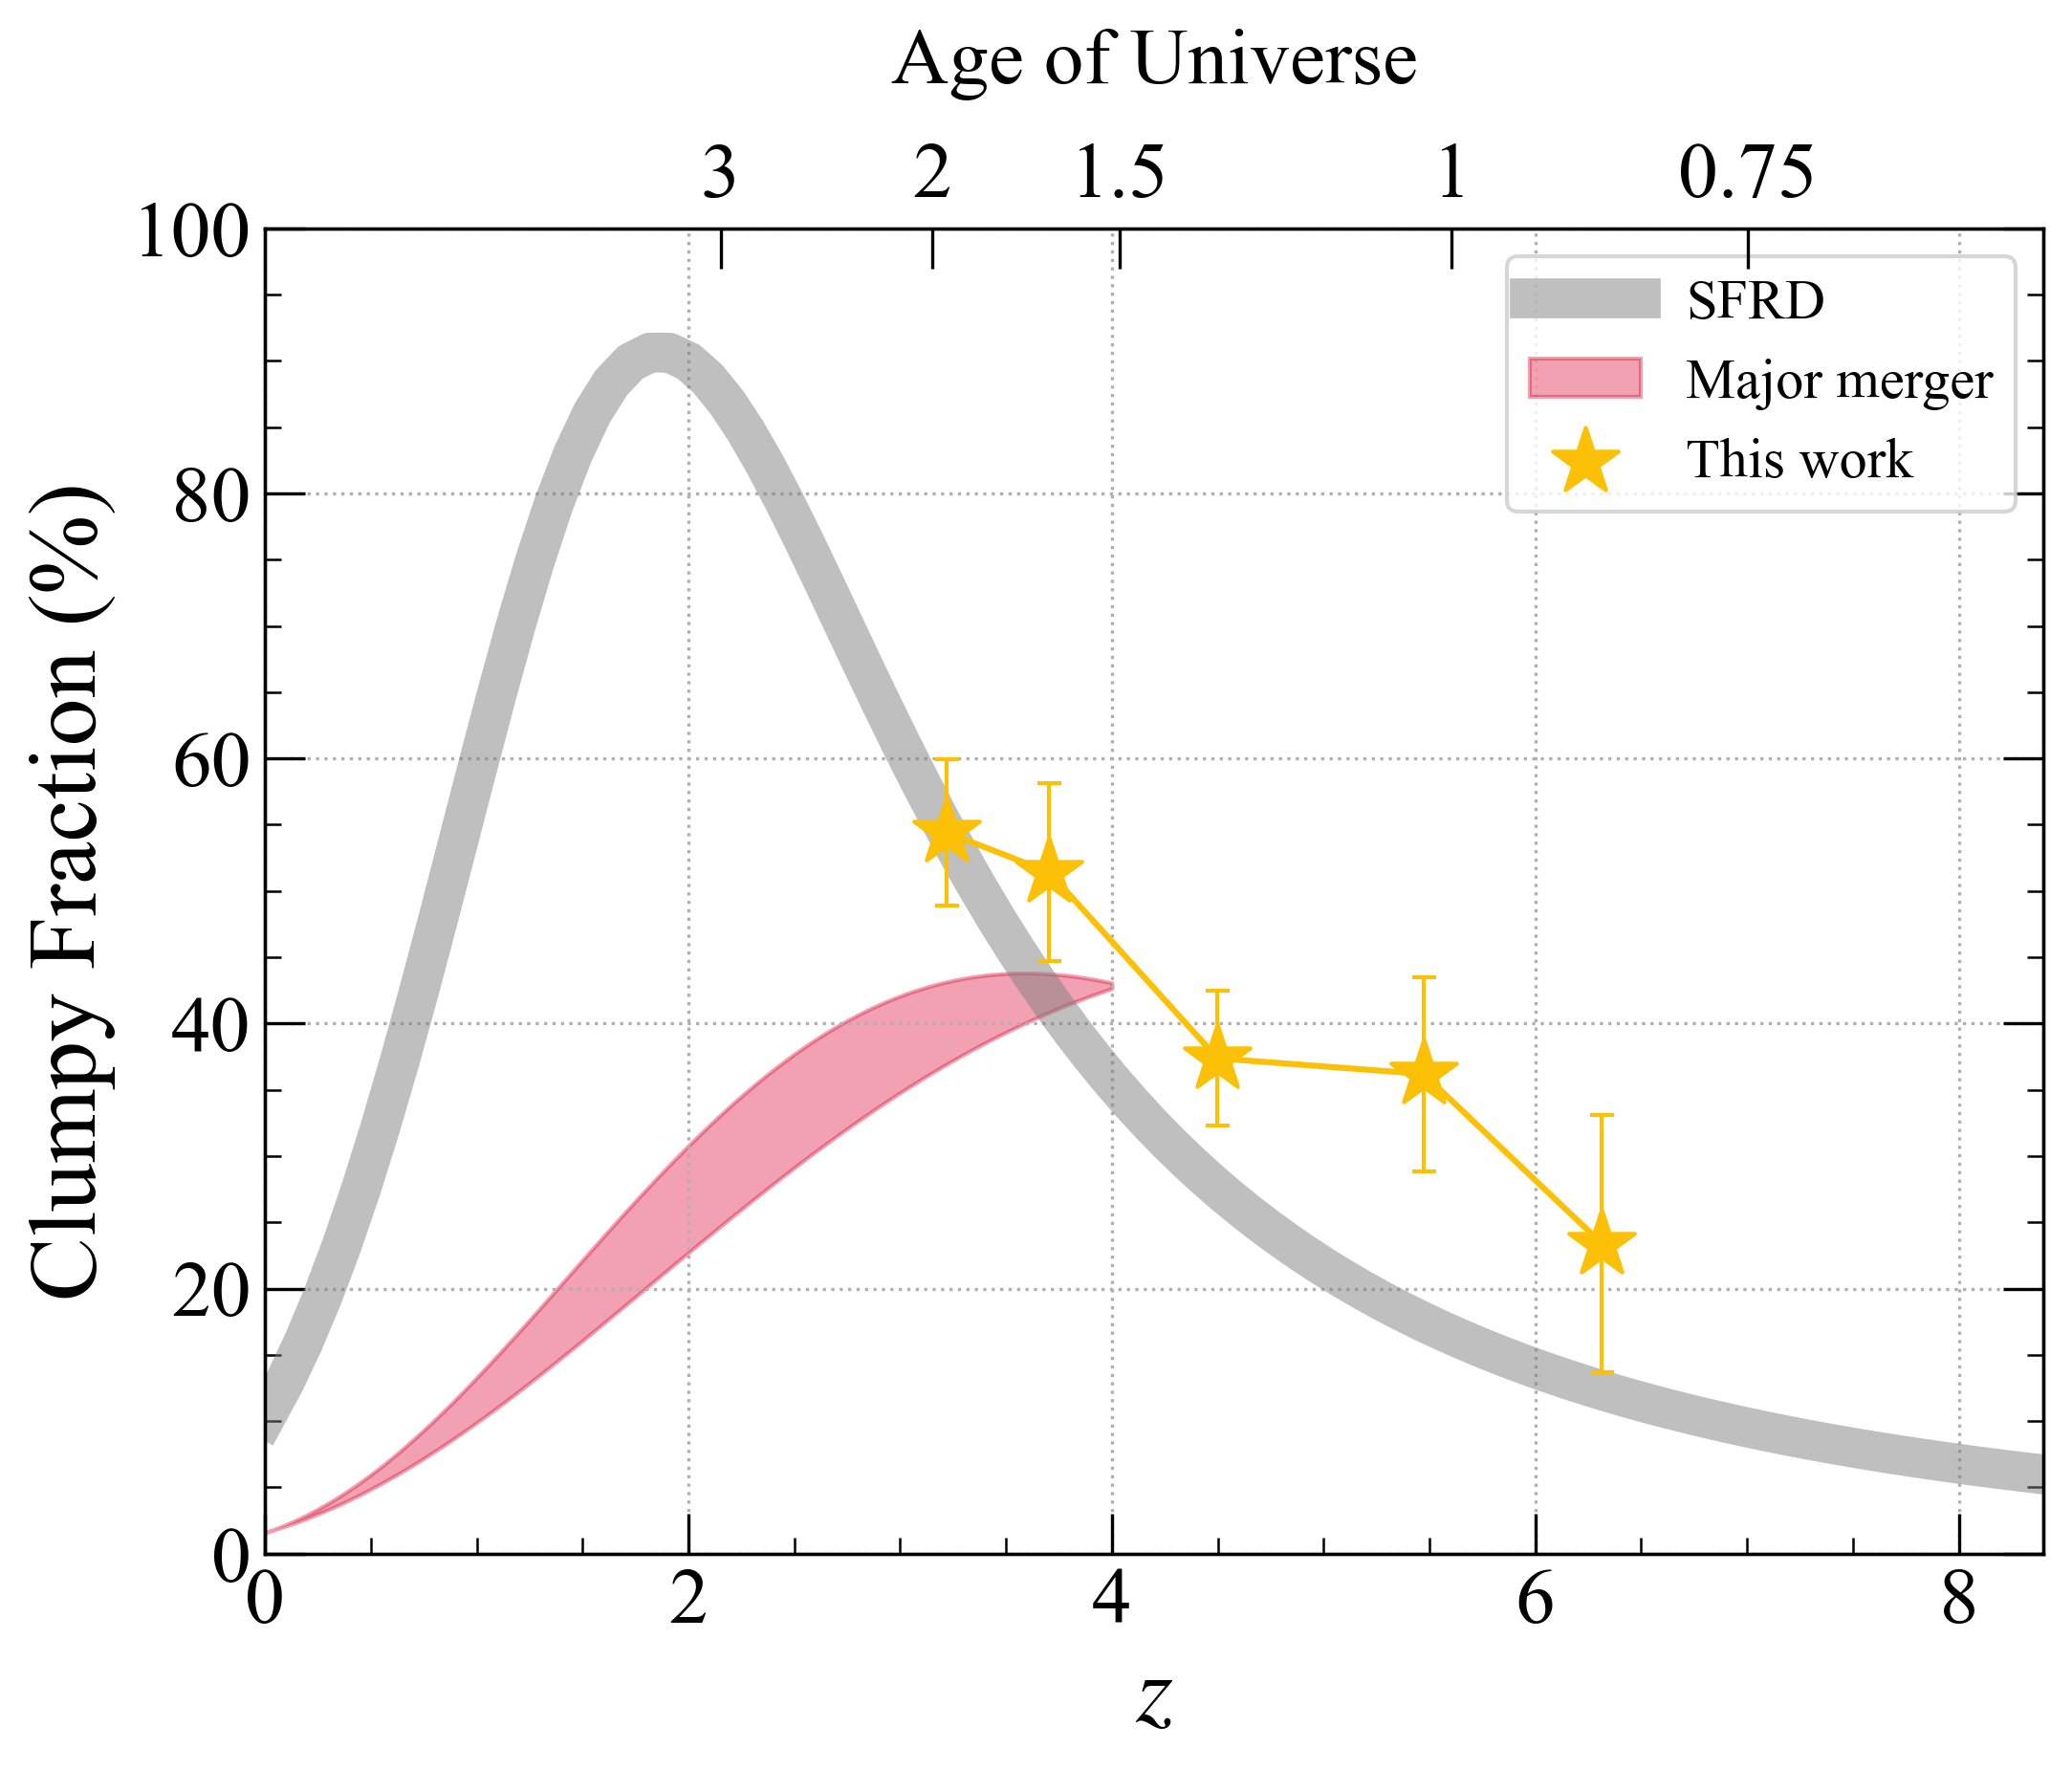

In [65]:
# Function definition
from scipy.optimize import curve_fit

def clumpy_frac(z, a, b, c, d):
    return a*((1+z)**b/(1+((1+z)/c)**d))*100

def major_rate_up(z):
    a = 0.035 + 0.0069
    b = 3.964 + 0.519 
    c = 0.771 + 0.206
    return a * (1 + z)**b * np.exp(-c * (1 + z)) * 100

def major_rate_low(z):
    a = 0.035 - 0.0069
    b = 3.964 - 0.519 
    c = 0.771 - 0.206
    return a * (1 + z)**b * np.exp(-c * (1 + z)) * 100

def scale(z, x):
    return clumpy_frac(z, 0.015, 2.7, 2.9, 5.6)*x
    
# Number fraction
def fraction(a, b):
    return a/b

# Number fraction error
def fraction_err(a, b):
    a_err = np.sqrt(a)
    b_err = np.sqrt(b)
    return np.sqrt((a_err / b)**2 + (a / b**2 * b_err)**2)

# Number fraction completeness correction
def comp_corr(f, X):
    n = 2
    return f + 1/n * (1/X - 1) * f - 1/n * (1/X - 1) * f**2

# Number fraction completeness correction error
def comp_err(f, X, e_f):
    n = 2
    return e_f * (1 + 1/n * (1/X - 1) - 2/n * (1/X - 1) * f)
    
# Completeness file
co = pd.read_csv('comple.csv')
Mark = co['Mark']

# bins on redshifts
bins = [3, 3.5, 4, 5, 6, 11]

# Dictionary for counting
Ncom = {bin: 0 for bin in bins[:-1]} 
Nclm = {bin: 0 for bin in bins[:-1]}
Ngal = {bin: 0 for bin in bins[:-1]}
zlist = {bin: [] for bin in bins[:-1]}
# Counting
for z_bin_l, z_bin_r in zip(bins, bins[1:]):
    for i in range(len(zsp)):
        if z_bin_l <= zsp[i] < z_bin_r:
            zlist[z_bin_l].append(zsp[i])
            Ngal[z_bin_l] += 1
            
            if types[i] == "C":
                Nclm[z_bin_l] += 1
                
            if Mark[i] == "Y":
                Ncom[z_bin_l] += 1

# Fractiona Calculation
frac_clump = []
frac_clump_e = []
z_med = []
for bin in bins[:-1]:
    if Ngal[bin] > 0:
        frac = fraction(Nclm[bin], Ngal[bin])
        frac_e = fraction_err(Nclm[bin], Ngal[bin])
        comp = fraction(Ncom[bin], Ngal[bin])
        comp_frac = comp_corr(frac, comp)
        comp_frac_e = comp_err(frac, comp, frac_e)
    
        frac_clump.append(comp_frac * 100)
        frac_clump_e.append(comp_frac_e * 100)
        z_med.append(np.median(zlist[bin]))

# Plot
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=300)

scale = frac_clump[0] / clumpy_frac(z_med[0], 0.015, 2.7, 2.9, 5.6)
# Data
zlin = np.linspace(0, 9, 100)
ax1.plot(zlin, clumpy_frac(zlin, 0.015, 2.7, 2.9, 5.6)*scale, lw=10, c='grey', alpha=0.5, label='SFRD')
zlin = np.linspace(0, 4, 100)
ax1.fill_between(zlin, major_rate_low(zlin), major_rate_up(zlin), color='crimson', alpha=0.4, label='Major merger')

ax1.scatter(z_med, frac_clump, s=300, c='xkcd:marigold', marker='*', label='This work', zorder=10)
ax1.errorbar(z_med, frac_clump, yerr=frac_clump_e, c='xkcd:marigold', capsize=3, capthick=1, elinewidth=1)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xlim(0, 8.4)

z = np.linspace(0.2, 8.4, 1000)
lbtime = cosmo.lookback_time(z).value

lookback_time_ticks = [0.75, 1, 1.5, 2, 3]
z_ticks = z_at_value(cosmo.age, lookback_time_ticks*u.Gyr).value

ax2.set_xticks(z_ticks)
ax2.set_xticklabels([f'{lt}' for lt in lookback_time_ticks])

ax2.tick_params(axis='x', which='both', direction='in')
ax2.tick_params(axis='x', which='major', length=10, labelsize=20)

ax2.set_xlabel('Age of Universe', fontsize=20, labelpad=15)

# Customizing
ax1.grid(visible=True, linestyle=':')
ax1.set_xlabel('$z$', fontsize=24)
ax1.set_ylabel('Clumpy Fraction (%)', fontsize=24)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='both', direction = "in", top=False, right="on", length=4)
ax1.tick_params(axis='both', which='major', length=10, labelsize=20)
ax1.set_ylim(0,100)
ax1.set_xlim(0,8.4)
ax1.legend(fontsize=14)
plt.savefig('clump-sfrd.png', bbox_inches='tight', dpi=300)
plt.show()

### SFMS

In [ ]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0 = 70, Om0 = 0.3)

def sfms(t, log_M):
    return (0.80-0.022*t)*log_M-(6.09-0.07*t)

def sfms_up(t, log_M):
    return (0.82-0.025*t)*log_M-(6.32-0.10*t)

def sfms_low(t, log_M):
    return (0.78-0.019*t)*log_M-(5.86-0.04*t)
    
label = ['$3<z<3.5$', '$3.5<z<4$', '$4<z<5$', '$z>5$']

fig, axn = plt.subplots(2, 2, figsize=(10, 8), sharex='col', sharey='row')
fig.subplots_adjust(wspace=0.1, hspace=0.15)

coord = [(x, y) for x in range(2) for y in range(2)]

for j in range(len(np.unique(X['bin3']))):
    ax = axn[coord[j]]
    
    Ct = np.where((X['bin3'] == j+1) & (X['Type']=='C'))
    Nt = np.where((X['bin3'] == j+1) & (X['Type']=='N'))

    zmed = np.median(zsp[Nt])
    t = cosmo.age(zmed).value

    x = np.linspace(6.8, 12.2, 100)
    
    ax.plot(x, sfms(t, x), color='gold', zorder=0)
    ax.fill_between(x, sfms(t, x)-0.5, sfms(t, x)+0.5, color='gold', alpha=0.3, label='Main Sequence', zorder=0)
    
    ax.scatter(M[Ct], SFR[Ct], label='Clumpy', s=30, lw=1, alpha=1, marker='o', c='royalblue', edgecolor='blue', zorder=10)
    ax.scatter(M[Nt], SFR[Nt], label='Non-Clumpy', s=15, lw=1.5, alpha=0.5, marker='s',  facecolor='white', edgecolor='red', zorder=5)

    ax.errorbar(M[Ct], SFR[Ct], xerr=[M_e[Ct], M_E[Ct]], yerr=[SFR_e[Ct], SFR_E[Ct]],
                 fmt=' ', c='grey', capsize=2, capthick=1, elinewidth=1, alpha=0.6, zorder=1)
    ax.errorbar(M[Nt], SFR[Nt], xerr=[M_e[Nt], M_E[Nt]], yerr=[SFR_e[Nt], SFR_E[Nt]],
                 fmt=' ', c='grey', capsize=2, capthick=1, elinewidth=1, alpha=0.6, zorder=1)

    
    ax.grid(visible=True, linestyle=':')
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', direction = "in", top="on", right="on")
    ax.tick_params(axis="both", which='major', length=6)
    ax.set_title(label[j], fontsize=20)
    ax.legend(loc='upper left')
    ax.set_ylim(-1, 3)
    ax.set_xlim(6.8, 12.2)
fig.supxlabel('$\log(M_{*})$' + ' $[M_{\odot}]$', y=0.04, fontsize=18)
fig.supylabel('$\log(SFR)$' + ' $[M_{\odot}\ yr^{-1}]$', x=0.06, fontsize=18)
name_out = 'SFMS_col.png'.format(j+1)
plt.savefig(name_out, dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0 = 70, Om0 = 0.3)

def sfms(t, log_M):
    return (0.80-0.022*t)*log_M-(6.09-0.07*t)

def sfms_up(t, log_M):
    return (0.82-0.025*t)*log_M-(6.32-0.10*t)

def sfms_low(t, log_M):
    return (0.78-0.019*t)*log_M-(5.86-0.04*t)
    
zmed = 4
t = cosmo.age(zmed).value

x = np.linspace(6.8, 12.2, 100)

a = 0.4
plt.fill_between(x, sfms(t, x)+0.5, sfms(t, x)+6, color='magenta', alpha=a, zorder=0)
plt.fill_between(x, sfms(t, x)-0.5, sfms(t, x)+0.5, color='blue', alpha=a, zorder=0)
plt.fill_between(x, sfms(t, x)-1.1, sfms(t, x)-0.5, color='green', alpha=a, zorder=0)
plt.fill_between(x, sfms(t, x)-5, sfms(t, x)-1.1, color='red', alpha=a, zorder=0)
plt.fill_between(x, sfms(t, x)-0.075, sfms(t, x)+0.075, color='yellow', alpha=0.4, zorder=0)
plt.plot(x, sfms(t, x), color='gold', zorder=0)

plt.text(8.3, 1.2, 'Starbursts (SB)', rotation=37, c='magenta', fontsize=14, fontweight='bold')
plt.text(8.9, 1.1, 'SFMS', rotation=37, c='gold', fontsize=14, fontweight='bold')
plt.text(8.7, 0.4, 'Main Sequence (MS)', rotation=37, c='blue', fontsize=14, fontweight='bold')
plt.text(9.0, 0.1, 'Green Valley (GV)', rotation=37, c='green', fontsize=14, fontweight='bold')
plt.text(9.3, -0.2, 'Quiescent (QG)', rotation=37, c='red', fontsize=14, fontweight='bold')


plt.grid(visible=True, linestyle=':')
plt.xlabel('$\log(M_{*})$' + ' $[M_{\odot}]$', fontsize=18)
plt.ylabel('$\log(SFR)$' + ' $[M_{\odot}\ yr^{-1}]$', fontsize=18)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on")
plt.tick_params(axis="both", which='major', length=6)
plt.ylim(-1, 3)
plt.xlim(6.8, 12.2)
plt.savefig('bluck.png', bbox_inches='tight', dpi=300)
plt.show()

### Merger Fraction & VDI

#### VDI

In [36]:
D = pd.read_excel('All-Clumpy-Nonclumpy.xlsx', sheet_name='Clumpy Number')
U = pd.read_csv('ultimate.csv')
d_cl = []
d_r = []
for i in range(len(D)):
    if 'FRESCO' in D.ID[i]:
        d_cl.append(np.sqrt((D.x[i]-50)**2+(D.y[i]-50)**2))
    else:
        d_cl.append(np.sqrt((D.x[i]-25)**2+(D.y[i]-25)**2))

D['z'] = D.merge(U[['ID', 'z_sp']], on='ID', how='left')['z_sp'].tolist()
D['d_cl'] = d_cl

dcl_real = []
for i in range(len(D)):
    if 'FRESCO' in D.ID[i]:
        dcl_real.append(D.d_cl[i] * 0.02 * cosmo.kpc_proper_per_arcmin(D.z[i]).value / 60)
    else:
        dcl_real.append(D.d_cl[i] * 0.04 * cosmo.kpc_proper_per_arcmin(D.z[i]).value / 60)

D['dcl_kpc'] = dcl_real

df = pd.read_csv('UV slope.csv')
D['Muv'] = D.merge(df[['ID', 'Muv']], on='ID', how='left')['Muv'].tolist()

ID_list, index = np.unique(D.ID, return_index=True)

d_list = []
z_list = []
Muv_list = []
ID_ = []
for i in index:
    if len(D[D['ID'] == D['ID'][i]]) > 1:
        d_list.append(max(D[D['ID'] == D['ID'][i]]['dcl_kpc']))
        z_list.append(D.z[i])
        Muv_list.append(D.Muv[i])
        ID_.append(D.ID[i])

zbin = [3, 4, 5, 6]
title = ['$z=3-4$', '$z=4-5$', '$z>5$']

w = 0
dcl_ = {bin: [] for bin in zbin[:-1]}
z_ = {bin: [] for bin in zbin[:-1]}
for z_bin_l, z_bin_r in zip(zbin, zbin[1:]):
    for i in range(len(d_list)):
        if z_bin_l < z_list[i] < z_bin_r:
            dcl_[z_bin_l].append(d_list[i])
            z_[z_bin_l].append(z_list[i])

DD = {'ID': ID_,
      'z': z_list,
      'dcl': d_list,
      'Muv': Muv_list}

DD = pd.DataFrame(DD)

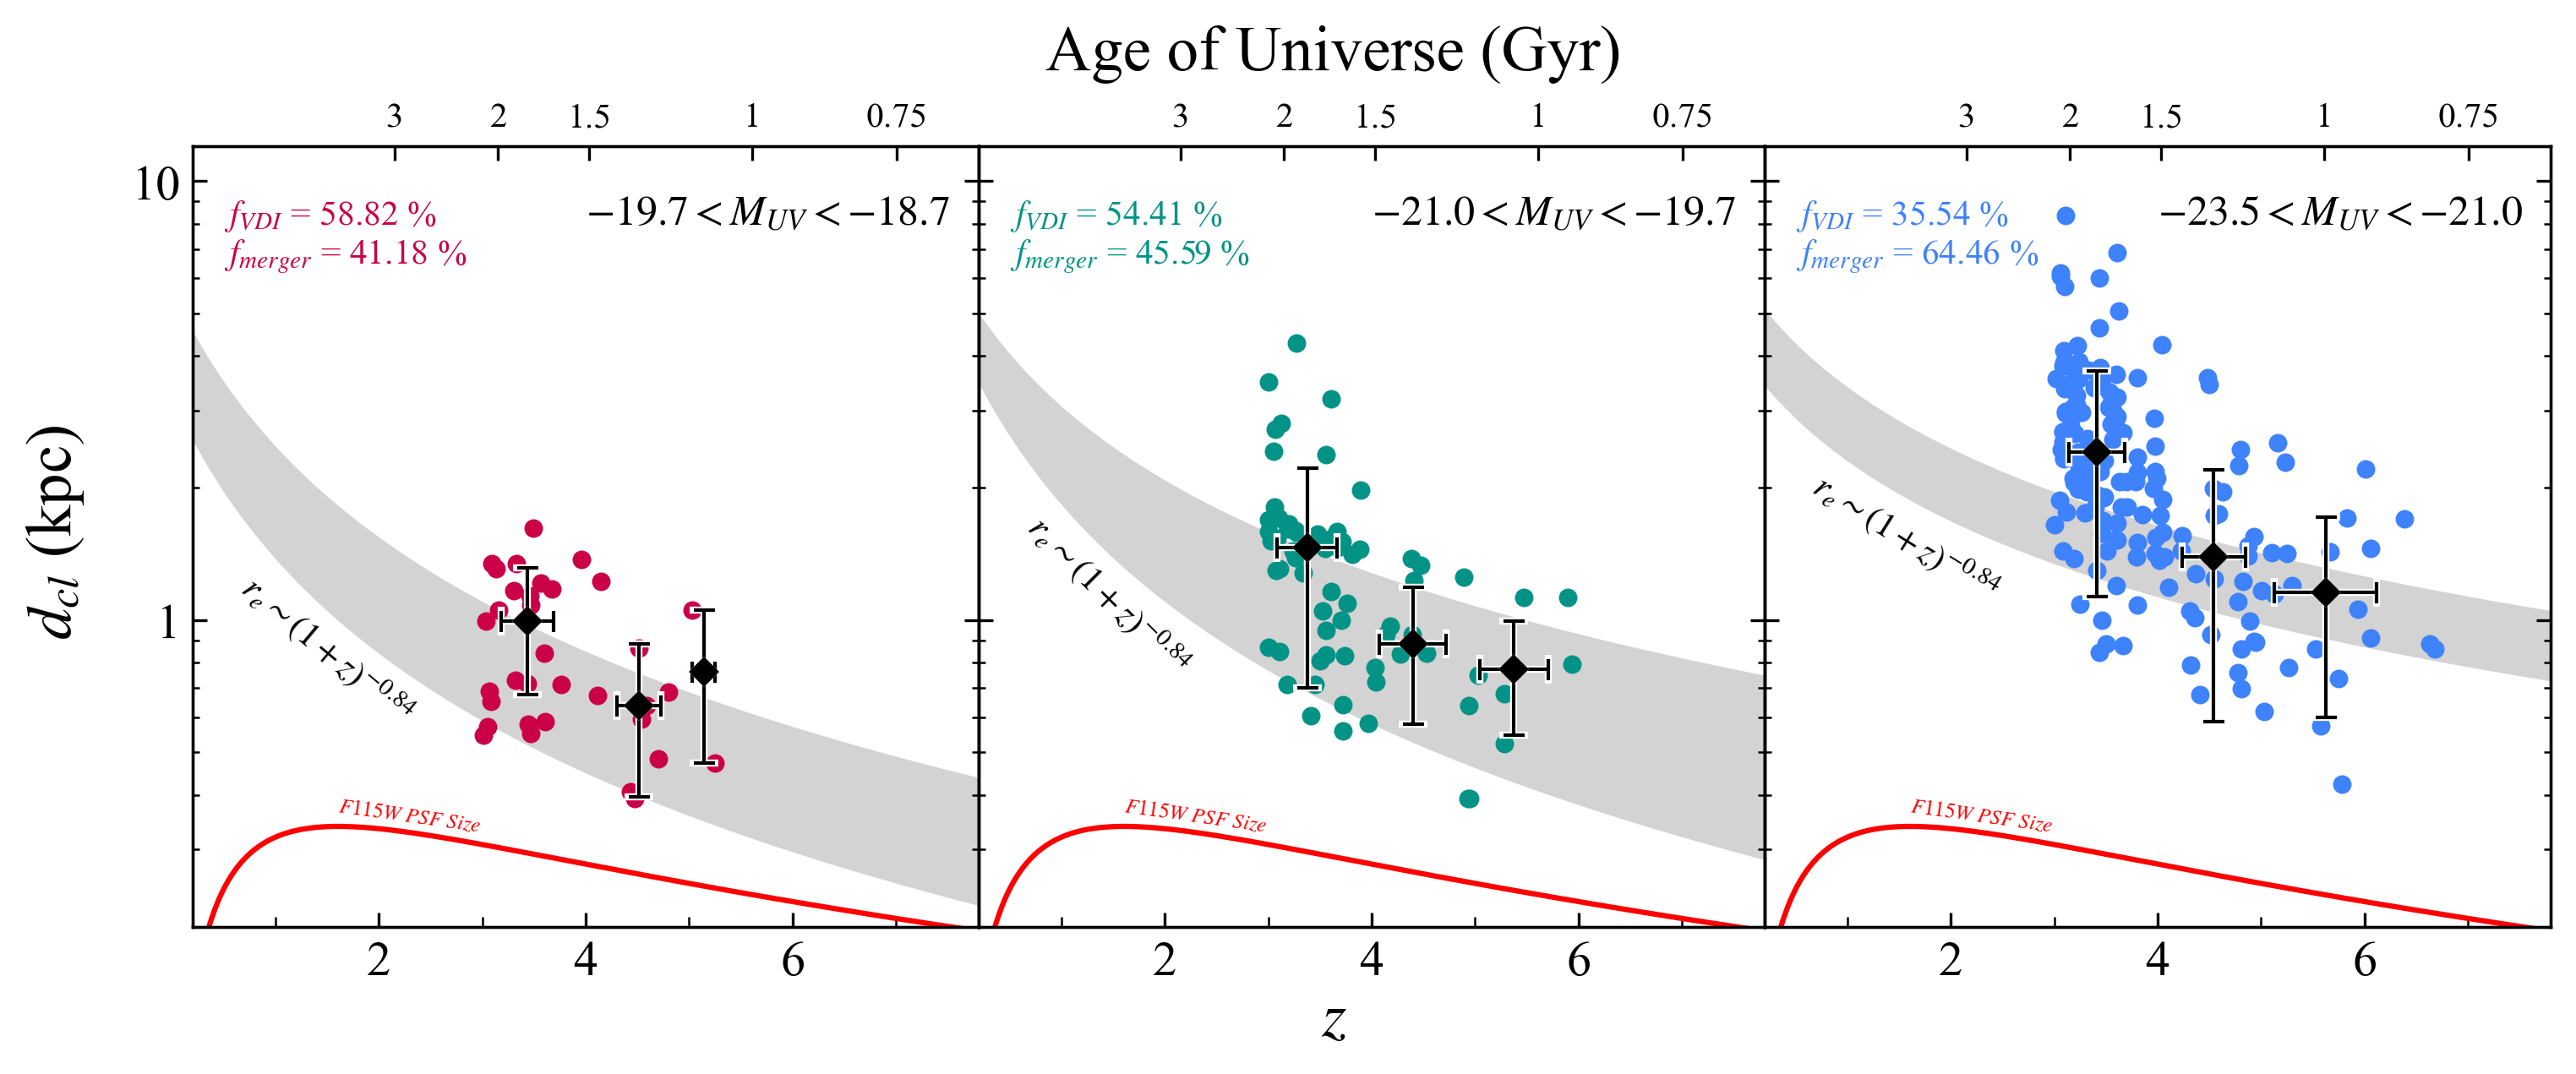

In [37]:
from matplotlib.ticker import ScalarFormatter, MultipleLocator


fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey='row', dpi=300)
fig.subplots_adjust(wspace=0)

# L = 0.12 - 0.3
B_med = [4.44, 5.45, 4.78]
B_avg = [5.52, 5.85, 5.80]
B_mod = [3.28, 4.45, 4.00]
beta_med = [-1.22, -1.10, -0.84]
beta_avg = [-1.17, -0.95, -0.79]
beta_mod = [-1.23, -1.26, -0.78]

Muv_bin = [-18.7, -19.7, -21, -23.5]

color = ['xkcd:ruby', 'xkcd:teal', 'xkcd:dodger blue']


def psf_size(z):
    return 0.04 * cosmo.kpc_proper_per_arcmin(z).value / 60
        
for i in range(3):
    def re_med(z):
        B = B_med[i]
        beta = beta_med[i]
        return B * (1 + z) ** beta
        
    def re_avg(z):
        B = B_avg[i]
        beta = beta_avg[i]
        return B * (1 + z) ** beta
    
    def re_mode(z):
        B = B_mod[i]
        beta = beta_mod[i]
        return B * (1 + z) ** beta

    dcl_p = []
    z_p = []
    for j in range(len(d_list)):
        if Muv_bin[i+1] < Muv_list[j] < Muv_bin[i]:
            dcl_p.append(d_list[j])
            z_p.append(z_list[j])


    z = np.linspace(0, 16, 1000)
    ax[i].plot(z, psf_size(z), c='red')
    ax[i].fill_between(z, re_avg(z), re_mode(z), color='lightgrey')
    ax[i].fill_between(z, re_avg(z), re_med(z), color='lightgrey')
    ax[i].scatter(z_p, dcl_p, s=20, c=color[i], linewidths=0.8)

    Nin = 0
    Nout = 0
    for j in range(len(dcl_p)):
        if dcl_p[j] < re_avg(z_p[j]):
            Nin += 1
        else:
            Nout += 1

    fraction_vdi = Nin / (Nout + Nin) * 100
    fraction_mer = Nout / (Nout + Nin) * 100
    ax[i].text(0.5, 8, '$f_{VDI}$ = ' + str(np.round(fraction_vdi, 2)) + ' %', color=color[i], fontsize=10)
    ax[i].text(0.5, 6.5, '$f_{merger}$ = ' + str(np.round(fraction_mer, 2)) + ' %', color=color[i], fontsize=10)
    ax[i].text(1.6, 0.33, '$F115W\ PSF\ Size$', rotation=-8, color='red', fontweight='bold', fontsize=6)

    zbin = [3, 4, 5, 11]
    for zbin_l, zbin_r in zip(zbin, zbin[1:]):
        zbinl = []
        dbinl = []
        for j in range(len(z_p)):
            if zbin_l < z_p[j] < zbin_r:
                zbinl.append(z_p[j])
                dbinl.append(dcl_p[j])
            
        median_d = np.median(dbinl)
        std_d = np.std(dbinl)
        median_z = np.median(zbinl)
        std_z = np.std(zbinl)
        ax[i].errorbar(median_z, median_d, yerr=std_d, xerr=std_z, fmt='D', color='white', markersize=5, capthick=2, elinewidth=2, capsize=4)
        ax[i].errorbar(median_z, median_d, yerr=std_d, xerr=std_z, fmt='D', color='black', markersize=5, capthick=1, elinewidth=1, capsize=3)

    ax2 = ax[i].twiny()  # instantiate a second axes that shares the same x-axis
    ax2.set_xlim(0.2, 7.8)
    
    z = np.linspace(0.2, 7.8, 1000)
    lbtime = cosmo.lookback_time(z).value
    
    lookback_time_ticks = [0.75, 1, 1.5, 2, 3]
    z_ticks = z_at_value(cosmo.age, lookback_time_ticks*u.Gyr).value
    
    ax2.set_xticks(z_ticks)
    ax2.set_xticklabels([f'{lt}' for lt in lookback_time_ticks])
    
    # minor_lookback_time_ticks = [1, 3, 5, 7, 9, 11, 13]
    # minor_z_ticks = z_at_value(cosmo.lookback_time, minor_lookback_time_ticks*u.Gyr).value
    # ax2.xaxis.set_minor_locator(mpl.ticker.FixedLocator(minor_z_ticks))
    ax2.tick_params(axis='x', which='both', direction='in')
    ax2.tick_params(axis='x', which='major', length=4, labelsize=10)
    ax2.tick_params(which='minor', length=3, direction='in')


ax[0].text(0.6, 0.58, '$r_e\sim(1+z)^{-0.84}$', rotation=-40, color='black', fontweight='bold', fontsize=10)
ax[0].text(4.0, 8, '$-19.7<M_{UV}<-18.7$', color='black', fontweight='bold', fontsize=12)

ax[1].text(0.6, 0.75, '$r_e\sim(1+z)^{-0.84}$', rotation=-45, color='black', fontweight='bold', fontsize=10)
ax[1].text(4.0, 8, '$-21.0<M_{UV}<-19.7$', color='black', fontweight='bold', fontsize=12)

ax[2].text(0.6, 1.1, '$r_e\sim(1+z)^{-0.84}$', rotation=-32, color='black', fontweight='bold', fontsize=10)
ax[2].text(4.0, 8, '$-23.5<M_{UV}<-21.0$', color='black', fontweight='bold', fontsize=12)

for x in ax:
    x.set_ylim(0.2, 12)
    x.set_xlim(0.2, 7.8)
    x.minorticks_on()
    x.set_yscale('log')
    ticks = [1, 10]
    x.set_yticks(ticks)
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    x.get_yaxis().set_major_formatter(formatter)
    minor_locator = MultipleLocator(1)
    x.xaxis.set_minor_locator(minor_locator)
    x.tick_params(axis='x', which='both', direction = "in", right="on", length=3)
    x.tick_params(axis='y', which='both', direction = "in", right="on", length=2)
    x.tick_params(axis='both', which='major', length=4, labelsize=14)
    
fig.supylabel('$d_{cl}$ (kpc)', x=0.07, fontsize=18)
fig.suptitle('Age of Universe (Gyr)', y=1, fontsize=18)
fig.supxlabel('$z$', y=-0.01, fontsize=18)


plt.savefig('clump_dist.png', bbox_inches='tight', dpi=300)
plt.show()

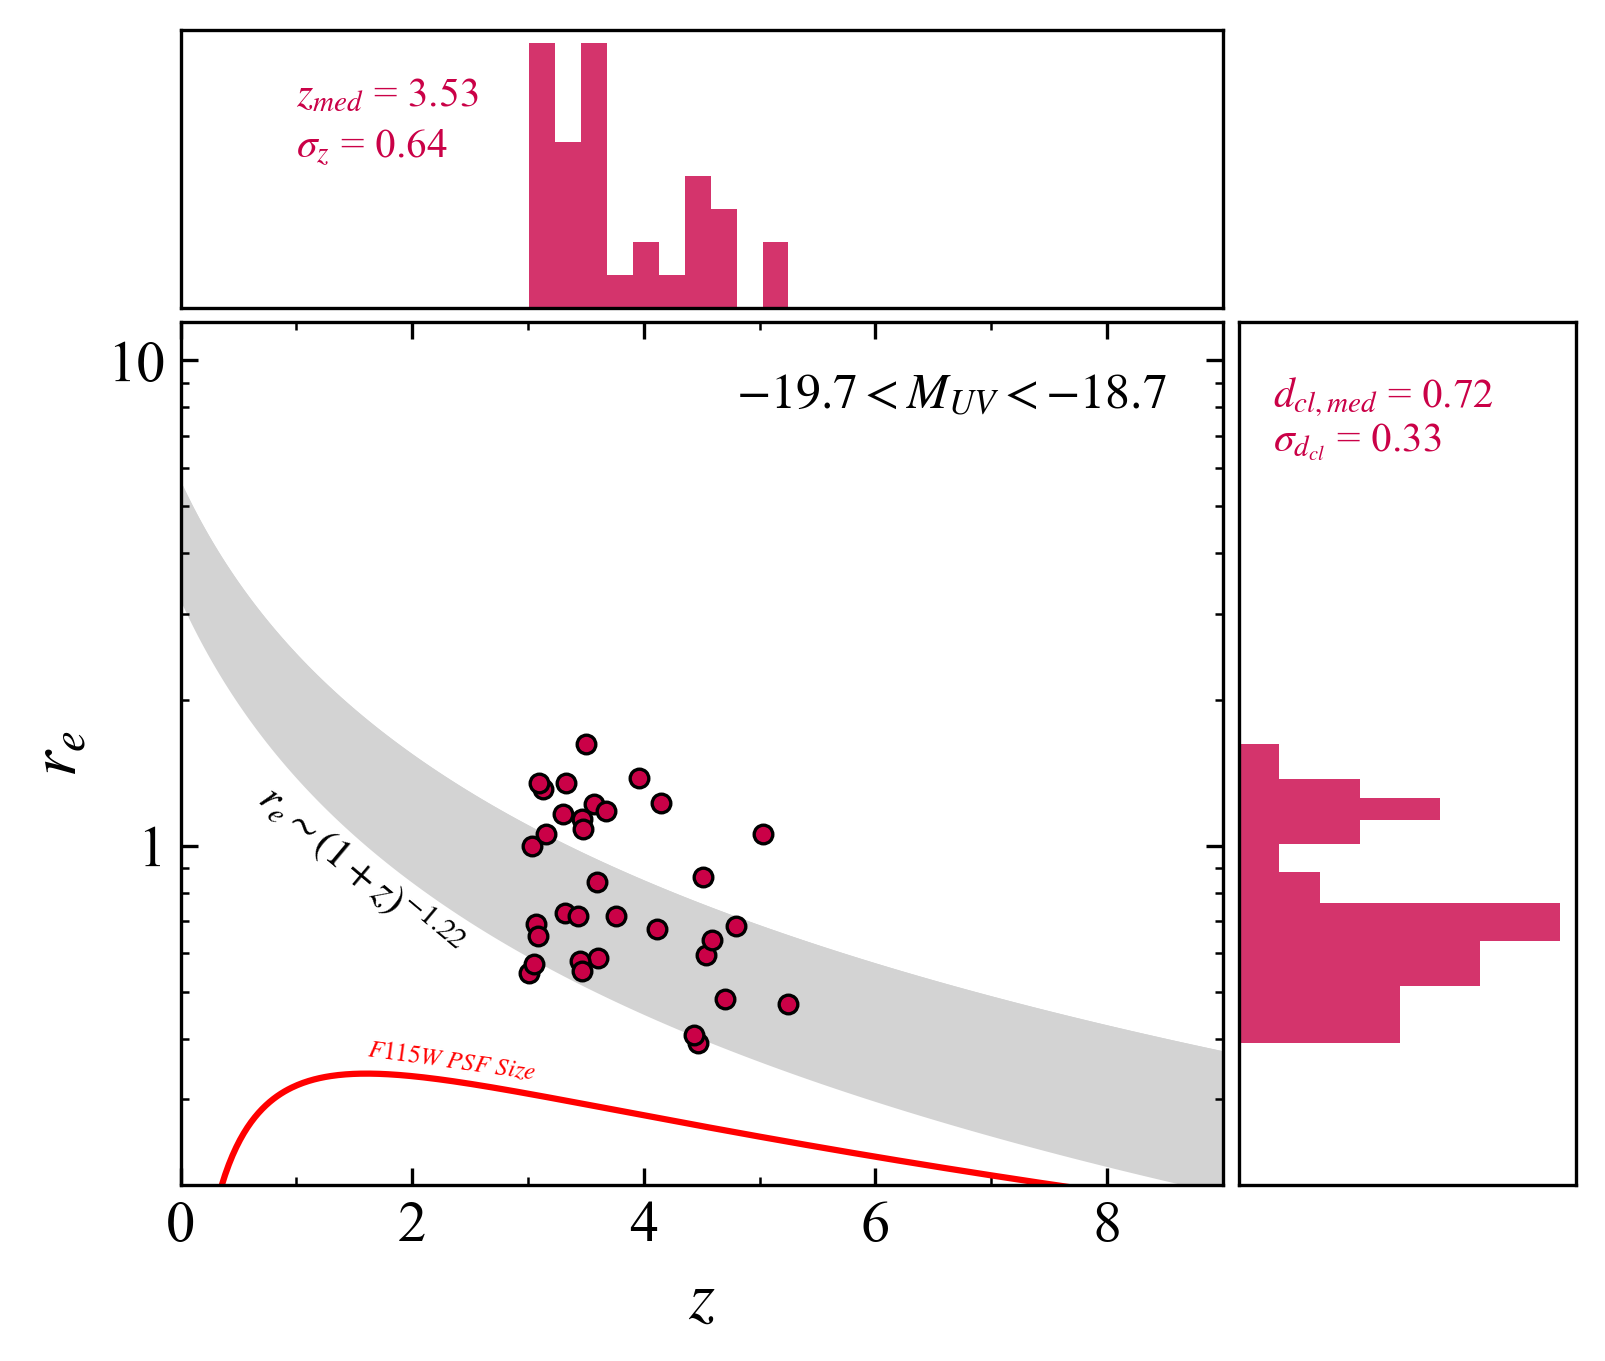

In [38]:
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# L = 0.12 - 3

def re_med(z):
    B = 4.44
    beta = -1.22
    return B * (1 + z) ** beta
    
def re_avg(z):
    B = 5.52
    beta = -1.17
    return B * (1 + z) ** beta

def re_mode(z):
    B = 3.28
    beta = -1.23
    return B * (1 + z) ** beta

def psf_size(z):
    return 0.04 * cosmo.kpc_proper_per_arcmin(z).value / 60

dcl_p = []
z_p = []
for i in range(len(d_list)):
    if -19.7 < Muv_list[i] < -18.7:
        dcl_p.append(d_list[i])
        z_p.append(z_list[i])

color = 'xkcd:ruby'

fig = plt.figure(figsize=(6, 5), dpi=300)
gs = fig.add_gridspec(4, 4, hspace=0.05, wspace=0.05)

ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_histx = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_histy = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
    
z = np.linspace(0, 16, 1000)
ax_main.plot(z, psf_size(z), c='red')
ax_main.fill_between(z, re_avg(z), re_mode(z), color='lightgrey')
ax_main.fill_between(z, re_avg(z), re_med(z), color='lightgrey')
ax_main.scatter(z_p, dcl_p, s=20, c=color, edgecolor='black', linewidths=0.8)

ax_histx.hist(z_p, density=True, color=color, alpha=0.8)
ax_histy.hist(dcl_p, density=True, color=color, orientation='horizontal', alpha=0.8)

ax_main.set_ylim(0.2, 12)
ax_main.set_xlim(0, 9)
ax_main.minorticks_on()
ax_main.set_yscale('log')
ticks = [1, 10]
ax_main.set_yticks(ticks)
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax_main.get_yaxis().set_major_formatter(formatter)
minor_locator = MultipleLocator(1)
ax_main.xaxis.set_minor_locator(minor_locator)
ax_main.set_ylabel('$r_e$', fontsize=16)
ax_main.set_xlabel('$z$', fontsize=16)
ax_main.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=2)
ax_main.tick_params(axis='both', which='major', length=4, labelsize=14)


median_z = np.median(z_p)
median_d = np.median(dcl_p)
std_z = np.std(z_p)
std_d = np.std(dcl_p)

ax_histx.text(1, 0.8, '$z_{med}$ = ' + str(np.round(median_z, 2)), color=color, fontsize=10)
ax_histx.text(1, 0.6, '$\sigma_{z}$ = ' + str(np.round(std_z, 2)), color=color, fontsize=10)
ax_histy.text(0.2, 8, '$d_{cl, med}$ = ' + str(np.round(median_d, 2)), color=color, fontsize=10)
ax_histy.text(0.2, 6.5, '$\sigma_{d_{cl}}$ = ' + str(np.round(std_d, 2)), color=color, fontsize=10)

ax_main.text(1.6, 0.33, '$F115W\ PSF\ Size$', rotation=-8, color='red', fontweight='bold', fontsize=6)
ax_main.text(0.6, 0.58, '$r_e\sim(1+z)^{-1.22}$', rotation=-40, color='black', fontweight='bold', fontsize=10)
ax_main.text(4.8, 8, '$-19.7<M_{UV}<-18.7$', color='black', fontweight='bold', fontsize=12)

# Remove tick labels from histograms
plt.setp(ax_histx.get_xticklabels(), visible=False)
plt.setp(ax_histy.get_yticklabels(), visible=False)

ax_histx.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=0, label1On=False, label2On=False)
ax_histy.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=0, label1On=False, label2On=False)

plt.savefig('re.png', bbox_inches='tight', dpi=300)
plt.show()

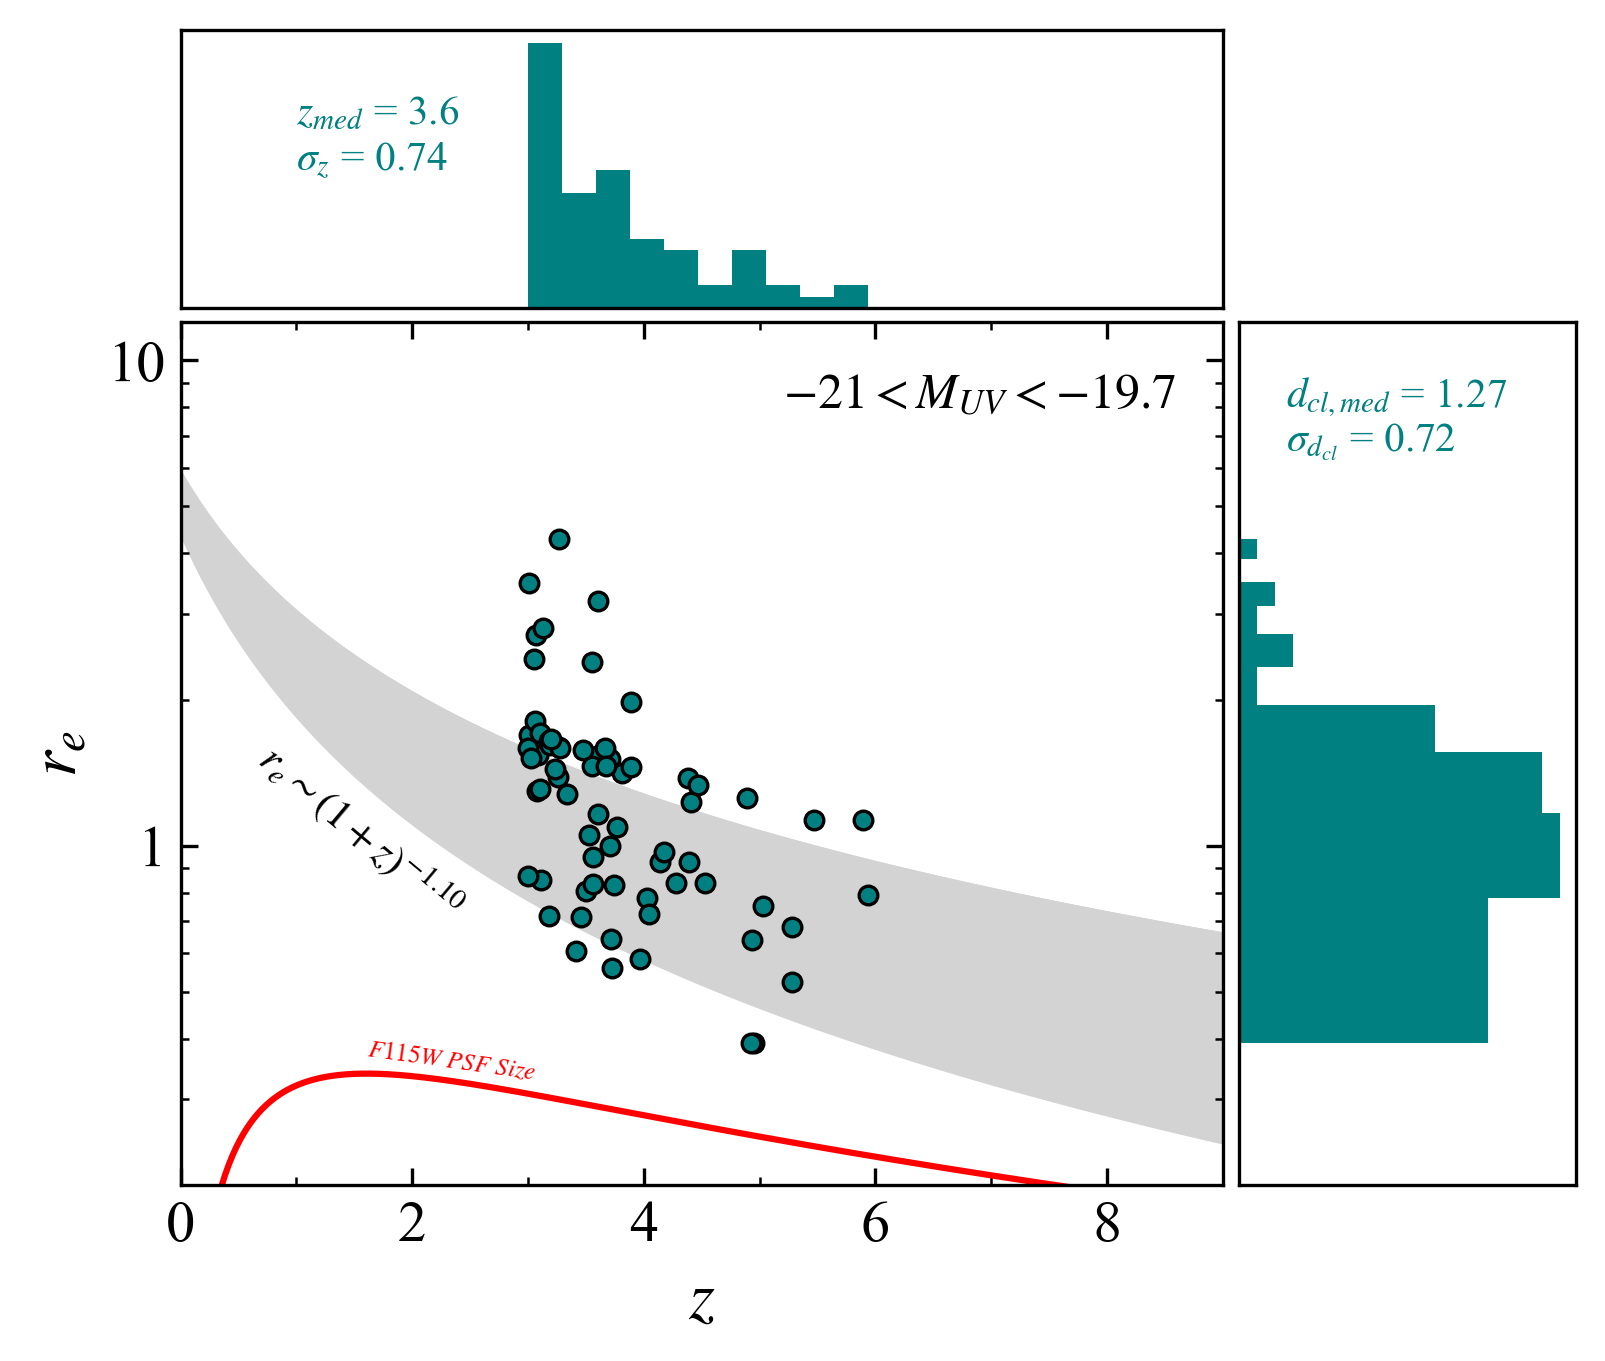

In [464]:
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# L = 0.12 - 3

def re_med(z):
    B = 5.45
    beta = -1.1
    return B * (1 + z) ** beta
    
def re_avg(z):
    B = 5.85
    beta = -0.95
    return B * (1 + z) ** beta

def re_mode(z):
    B = 4.45
    beta = -1.26
    return B * (1 + z) ** beta

def psf_size(z):
    return 0.04 * cosmo.kpc_proper_per_arcmin(z).value / 60

dcl_p = []
z_p = []
for i in range(len(d_list)):
    if -21 < Muv_list[i] < -19.7:
        dcl_p.append(d_list[i])
        z_p.append(z_list[i])

color = 'teal'

fig = plt.figure(figsize=(6, 5), dpi=300)
gs = fig.add_gridspec(4, 4, hspace=0.05, wspace=0.05)

ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_histx = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_histy = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
    
z = np.linspace(0, 16, 1000)
ax_main.plot(z, psf_size(z), c='red')
ax_main.fill_between(z, re_avg(z), re_mode(z), color='lightgrey')
ax_main.fill_between(z, re_avg(z), re_med(z), color='lightgrey')
ax_main.scatter(z_p, dcl_p, s=20, c=color, edgecolor='black', linewidths=0.8)

ax_histx.hist(z_p, density=True, color=color)
ax_histy.hist(dcl_p, density=True, color=color, orientation='horizontal')

ax_main.set_ylim(0.2, 12)
ax_main.set_xlim(0, 9)
ax_main.minorticks_on()
ax_main.set_yscale('log')
ticks = [1, 10]
ax_main.set_yticks(ticks)
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax_main.get_yaxis().set_major_formatter(formatter)
minor_locator = MultipleLocator(1)
ax_main.xaxis.set_minor_locator(minor_locator)
ax_main.set_ylabel('$r_e$', fontsize=16)
ax_main.set_xlabel('$z$', fontsize=16)
ax_main.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=2)
ax_main.tick_params(axis='both', which='major', length=4, labelsize=14)


median_z = np.median(z_p)
median_d = np.median(dcl_p)
std_z = np.std(z_p)
std_d = np.std(dcl_p)

ax_histx.text(1, 0.8, '$z_{med}$ = ' + str(np.round(median_z, 2)), color=color, fontsize=10)
ax_histx.text(1, 0.6, '$\sigma_{z}$ = ' + str(np.round(std_z, 2)), color=color, fontsize=10)
ax_histy.text(0.1, 8, '$d_{cl, med}$ = ' + str(np.round(median_d, 2)), color=color, fontsize=10)
ax_histy.text(0.1, 6.5, '$\sigma_{d_{cl}}$ = ' + str(np.round(std_d, 2)), color=color, fontsize=10)

ax_main.text(1.6, 0.33, '$F115W\ PSF\ Size$', rotation=-8, color='red', fontweight='bold', fontsize=6)
ax_main.text(0.6, 0.7, '$r_e\sim(1+z)^{-1.10}$', rotation=-40, color='black', fontweight='bold', fontsize=10)
ax_main.text(5.2, 8, '$-21<M_{UV}<-19.7$', color='black', fontweight='bold', fontsize=12)

# Remove tick labels from histograms
plt.setp(ax_histx.get_xticklabels(), visible=False)
plt.setp(ax_histy.get_yticklabels(), visible=False)

ax_histx.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=0, label1On=False, label2On=False)
ax_histy.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=0, label1On=False, label2On=False)

plt.savefig('re.png', bbox_inches='tight', dpi=300)
plt.show()

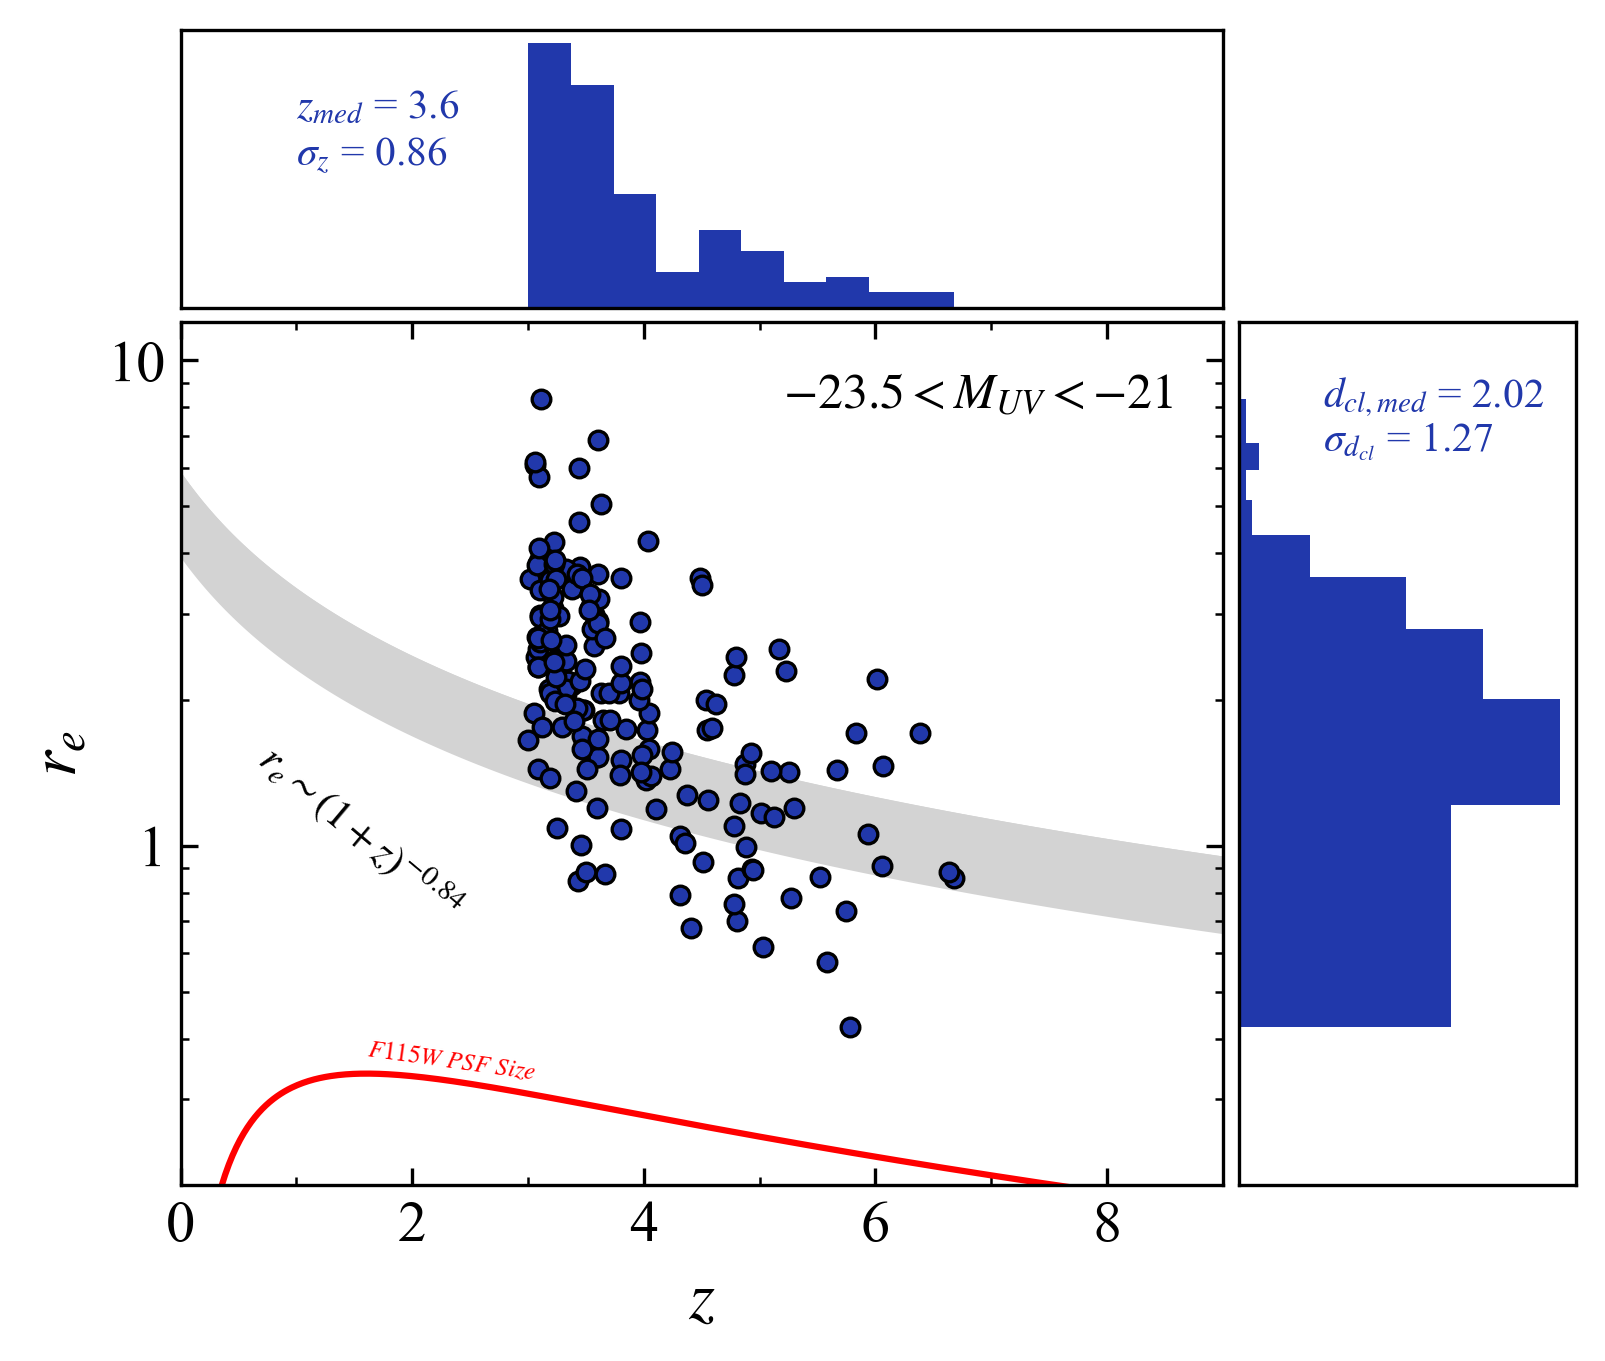

In [462]:
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# L = 0.12 - 3

def re_med(z):
    B = 4.78
    beta = -0.84
    return B * (1 + z) ** beta
    
def re_avg(z):
    B = 5.80
    beta = -0.79
    return B * (1 + z) ** beta

def re_mode(z):
    B = 4
    beta = -0.78
    return B * (1 + z) ** beta

def psf_size(z):
    return 0.04 * cosmo.kpc_proper_per_arcmin(z).value / 60

dcl_p = []
z_p = []
for i in range(len(d_list)):
    if -23.5 < Muv_list[i] < -21:
        dcl_p.append(d_list[i])
        z_p.append(z_list[i])

color = 'xkcd:sapphire'

fig = plt.figure(figsize=(6, 5), dpi=300)
gs = fig.add_gridspec(4, 4, hspace=0.05, wspace=0.05)

ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_histx = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_histy = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
    
z = np.linspace(0, 16, 1000)
ax_main.plot(z, psf_size(z), c='red')
ax_main.fill_between(z, re_avg(z), re_mode(z), color='lightgrey')
ax_main.fill_between(z, re_avg(z), re_med(z), color='lightgrey')
ax_main.scatter(z_p, dcl_p, s=20, c=color, edgecolor='black', linewidths=0.8)

ax_histx.hist(z_p, density=True, color=color)
ax_histy.hist(dcl_p, density=True, color=color, orientation='horizontal')

ax_main.set_ylim(0.2, 12)
ax_main.set_xlim(0, 9)
ax_main.minorticks_on()
ax_main.set_yscale('log')
ticks = [1, 10]
ax_main.set_yticks(ticks)
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax_main.get_yaxis().set_major_formatter(formatter)
minor_locator = MultipleLocator(1)
ax_main.xaxis.set_minor_locator(minor_locator)
ax_main.set_ylabel('$r_e$', fontsize=16)
ax_main.set_xlabel('$z$', fontsize=16)
ax_main.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=2)
ax_main.tick_params(axis='both', which='major', length=4, labelsize=14)


median_z = np.median(z_p)
median_d = np.median(dcl_p)
std_z = np.std(z_p)
std_d = np.std(dcl_p)

ax_histx.text(1, 0.6, '$z_{med}$ = ' + str(np.round(median_z, 2)), color=color, fontsize=10)
ax_histx.text(1, 0.45, '$\sigma_{z}$ = ' + str(np.round(std_z, 2)), color=color, fontsize=10)
ax_histy.text(0.1, 8, '$d_{cl, med}$ = ' + str(np.round(median_d, 2)), color=color, fontsize=10)
ax_histy.text(0.1, 6.5, '$\sigma_{d_{cl}}$ = ' + str(np.round(std_d, 2)), color=color, fontsize=10)

ax_main.text(1.6, 0.33, '$F115W\ PSF\ Size$', rotation=-8, color='red', fontweight='bold', fontsize=6)
ax_main.text(0.6, 0.7, '$r_e\sim(1+z)^{-0.84}$', rotation=-40, color='black', fontweight='bold', fontsize=10)
ax_main.text(5.2, 8, '$-23.5<M_{UV}<-21$', color='black', fontweight='bold', fontsize=12)

# Remove tick labels from histograms
plt.setp(ax_histx.get_xticklabels(), visible=False)
plt.setp(ax_histy.get_yticklabels(), visible=False)

ax_histx.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=0, label1On=False, label2On=False)
ax_histy.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=0, label1On=False, label2On=False)

plt.savefig('re.png', bbox_inches='tight', dpi=300)
plt.show()

#### Merger

In [269]:
# Rodriguez-Gomez(2015)
# Define parameters
log_A0 = -2.2287
A0 = 10**log_A0 
M0 = 2e10
eta = 2.4644
alpha_0 = 0.2241
alpha_1 = -1.1759
beta_0 = -1.2595
beta_1 = 0.0611
gamma = -0.0477
delta_0 = 0.7668
delta_1 = -0.4695

# Define function
def A(z):
    return A0 * (1 + z)**eta

def alpha(z):
    return alpha_0 * (1 + z)**alpha_1

def beta(z):
    return beta_0 * (1 + z)**beta_1

def delta(z):
    return delta_0 * (1 + z)**delta_1

def dN_dmu_dt(M, mu, z):
    return A(z) * (M / 1e10)**alpha(z) * (1 + (M / M0))**delta(z) * mu**(beta(z) + gamma * np.log10(M / 1e10))

def cumulative_merger_rate(M, mu_min, z):
    mu_val = np.linspace(mu_min, 1, 1000)
    cumulative_rate = np.trapz([dN_dmu_dt(M, mu, z) for mu in mu_val], mu_val)
    return cumulative_rate

def t_dyn(mu, z):
    a = -0.65 * mu + 2.06
    b = -1.60 
    return a * (1 + z)**b
    
def t_dyn_err(mu, z):
    a = -0.65 * mu + 2.06
    b = -1.60 
    a_err = 0.08 * mu + 0.01
    b_err = 0.01
    return np.sqrt(((1 + z) ** b * a_err)**2 + (a * b * (1 + z) ** (b-1) * b_err)**2)    

def fraction(a, b):
    return a/b

def fraction_err(a, b):
    a_err = np.sqrt(a)
    b_err = np.sqrt(b)
    return np.sqrt((a_err / b)**2 + (a / b**2 * b_err)**2)

def comp_corr(f, X):
    n = 2
    return f + 1/n * (1/X - 1) * f - 1/n * (1/X - 1) * f**2

def comp_err(f, X, e_f):
    n = 2
    return e_f * (1 + 1/n * (1/X - 1) - 2/n * (1/X - 1) * f)

def data_merger_rate(f, tau):
    return f / tau

def data_merger_rate_err(f, tau, f_e, tau_e):
    return np.sqrt((f_e / tau)**2 + (f / tau**2 * tau_e)**2)

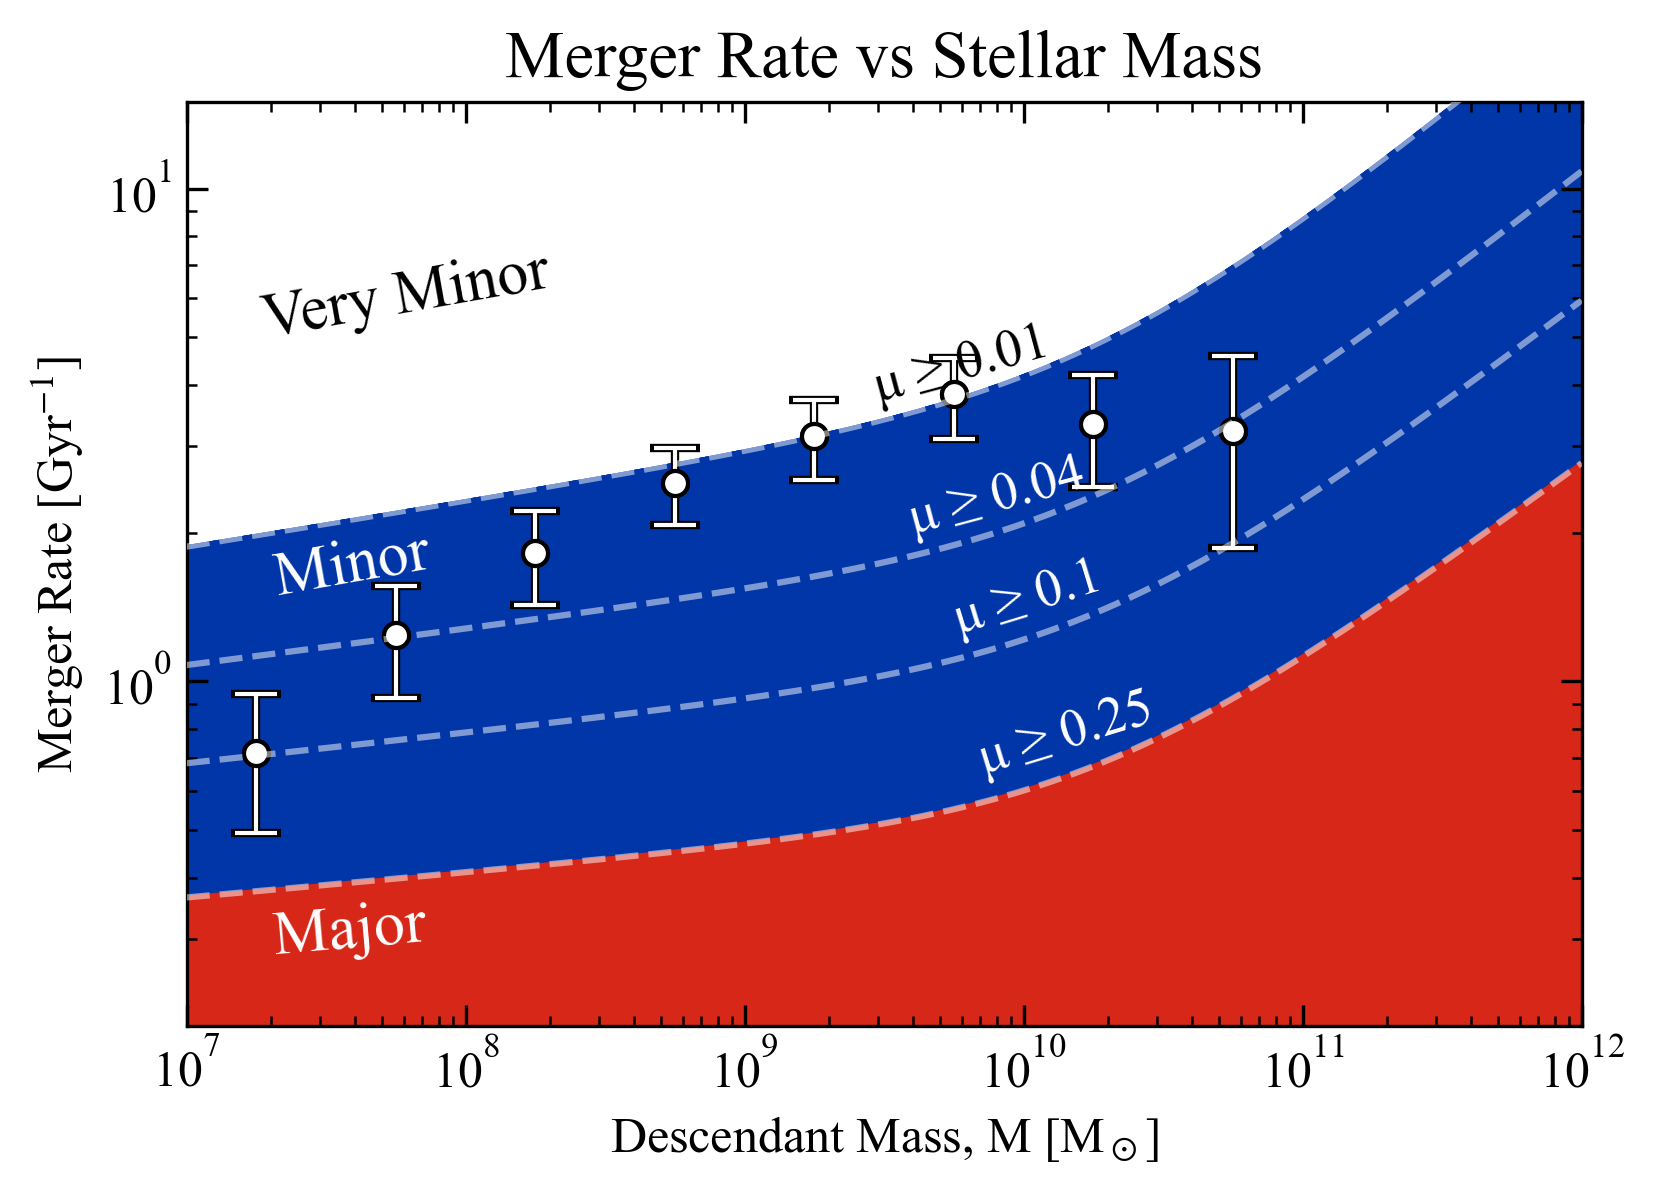

In [346]:
# Define bins for z
z_bins = [3, 11]

fig, ax = plt.subplots(figsize=(6,4), dpi=300)

ax.set_xscale('log')
ax.set_yscale('log')

co = pd.read_csv('comple.csv')
Mark = co['Mark']

# Rotate angle
angle = [15, 15, 17, 17]
texty = [3.7, 2, 1.25, 0.65]
textx = [3e9, 4e9, 5.85e9, 7.2e9]
for z_bin_l, z_bin_r in zip(z_bins, z_bins[1:]):
    # Define bins for log_SM
    width = 0.5
    M_bins = np.arange(7, 12 + width, width)
    
    # Initialize counters for each bin
    total_counts = {bin: 0 for bin in M_bins[:-1]}
    clumpy_counts = {bin: 0 for bin in M_bins[:-1]}
    tau_sum = {bin: 0 for bin in M_bins[:-1]}
    tau_err = {bin: 0 for bin in M_bins[:-1]}
    Ncom = {bin: 0 for bin in M_bins[:-1]}
    z_arr = []

    Ncom = {bin: 0 for bin in M_bins[:-1]}
    
    mu = 0.25 # example value for mu
    for i in range(len(zsp)):
        if z_bin_l <= zsp[i] < z_bin_r:
        # Bin the data
            log_M = M[i]
            z_sp = zsp[i]
            Type = types[i]
            z_arr.append(z_sp)
            
            for M_bin_l, M_bin_r in zip(M_bins[:-1], M_bins[1:-1]):
                if M_bin_l <= log_M < M_bin_r:
                    total_counts[M_bin_l] += 1
                    tau = t_dyn(mu, z_sp)
                    tau_e = t_dyn_err(mu, z_sp)
                    tau_sum[M_bin_l] += tau
                    tau_err[M_bin_l] += tau_e ** 2
                    Ncom[M_bin_l] += 1
                    if Type == "C":
                        clumpy_counts[M_bin_l] += 1
                        
                    if Mark[i] == "Y":
                        Ncom[M_bin_l] += 1

        
    # Calculate the merger rate and errors
    merger_rates = []
    errors = []
    bin_centers = []
    
    for bin in M_bins[:-1]:
        if total_counts[bin] > 10:
            frac = fraction(clumpy_counts[bin], total_counts[bin])
            frac_err = fraction_err(clumpy_counts[bin], total_counts[bin])
            comp = fraction(Ncom[bin], total_counts[bin])
            frac_comp = comp_corr(frac, comp)
            frac_comp_err = comp_err(frac, comp, frac_err)

            tau_av = tau_sum[bin] / total_counts[bin]
            tau_error = np.sqrt(tau_err[bin]) / total_counts[bin]
            
            merger_rate = data_merger_rate(frac_comp, tau_av)
            merger_rate_err = data_merger_rate_err(frac_comp, tau_av, frac_comp_err, tau_error)
        
            merger_rates.append(merger_rate)
            errors.append(merger_rate_err)
            bin_centers.append(10**(bin + width/2))
            
    # Generate data for plotting
    M_values = np.logspace(7, 12, 100)  # Mass range from 10^7 to 10^12 solar masses
    zv = np.median(z_arr)
        
    # Adding lines for different mu values
    mu_values = [0.01, 0.04, 0.1, 0.25]

    z = zv  # average redshift for example
    
    # Adding shaded regions
    # Calculate the y-values for each mu
    for mu_min in mu_values:
        y_values = [cumulative_merger_rate(M, mu_min,zv) for M in M_values]
        ax.plot(M_values, y_values,  color='white', ls='--', alpha=0.5, zorder=20)
 
        y_values_mu_01 = [cumulative_merger_rate(M, 0.01, zv) for M in M_values]
        y_values_mu_25 = [cumulative_merger_rate(M, 0.25, zv) for M in M_values]

        # Plot the shaded regions
        ax.fill_between(M_values, y_values_mu_01,y_values_mu_25, color='#0036A7', alpha=1, label='Minor merger')
        ax.fill_between(M_values, y_values_mu_25, color='#D62718', alpha=1, label='Major merger')
        
    for i in range(len(texty)):
        if i==0:
            color='black'

        else:
            color='white'
        ax.text(textx[i], texty[i],f'μ ≥ {mu_values[i]}',fontsize=13, color=color, alpha=1, rotation=angle[i], rotation_mode='anchor')

plt.text(1.8e7, 5, 'Very Minor' , fontsize=15, rotation=10, color='black', alpha=1)

plt.text(2e7, 1.5, 'Minor' , fontsize=15, rotation=10, color='white', alpha=1)

plt.text(2e7, 0.28,'Major', fontsize=15, rotation=5, color='white', alpha=1)

ax.errorbar(bin_centers, merger_rates, yerr=errors, fmt='o', c='black', alpha=1, capthick=2, elinewidth=2, capsize=6)
ax.errorbar(bin_centers, merger_rates, yerr=errors, fmt='o', c='white', mec='black', alpha=1, capthick=1, elinewidth=1, capsize=5)

ax.set_xlabel(r'Descendant Mass, M [M$_\odot$]', fontsize=12)
ax.set_ylabel(r'Merger Rate [Gyr$^{-1}$]', fontsize=12)
ax.set_title(r'Merger Rate vs Stellar Mass', fontsize=16)

ax.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=2.5)
ax.tick_params(axis='both', which='major', length=5, labelsize=12)

plt.xlim(1e7,1e12)
plt.ylim(0.2,15)
    #plt.legend()
plt.savefig("merger rate overall.png", bbox_inches='tight', dpi=300)
plt.show()

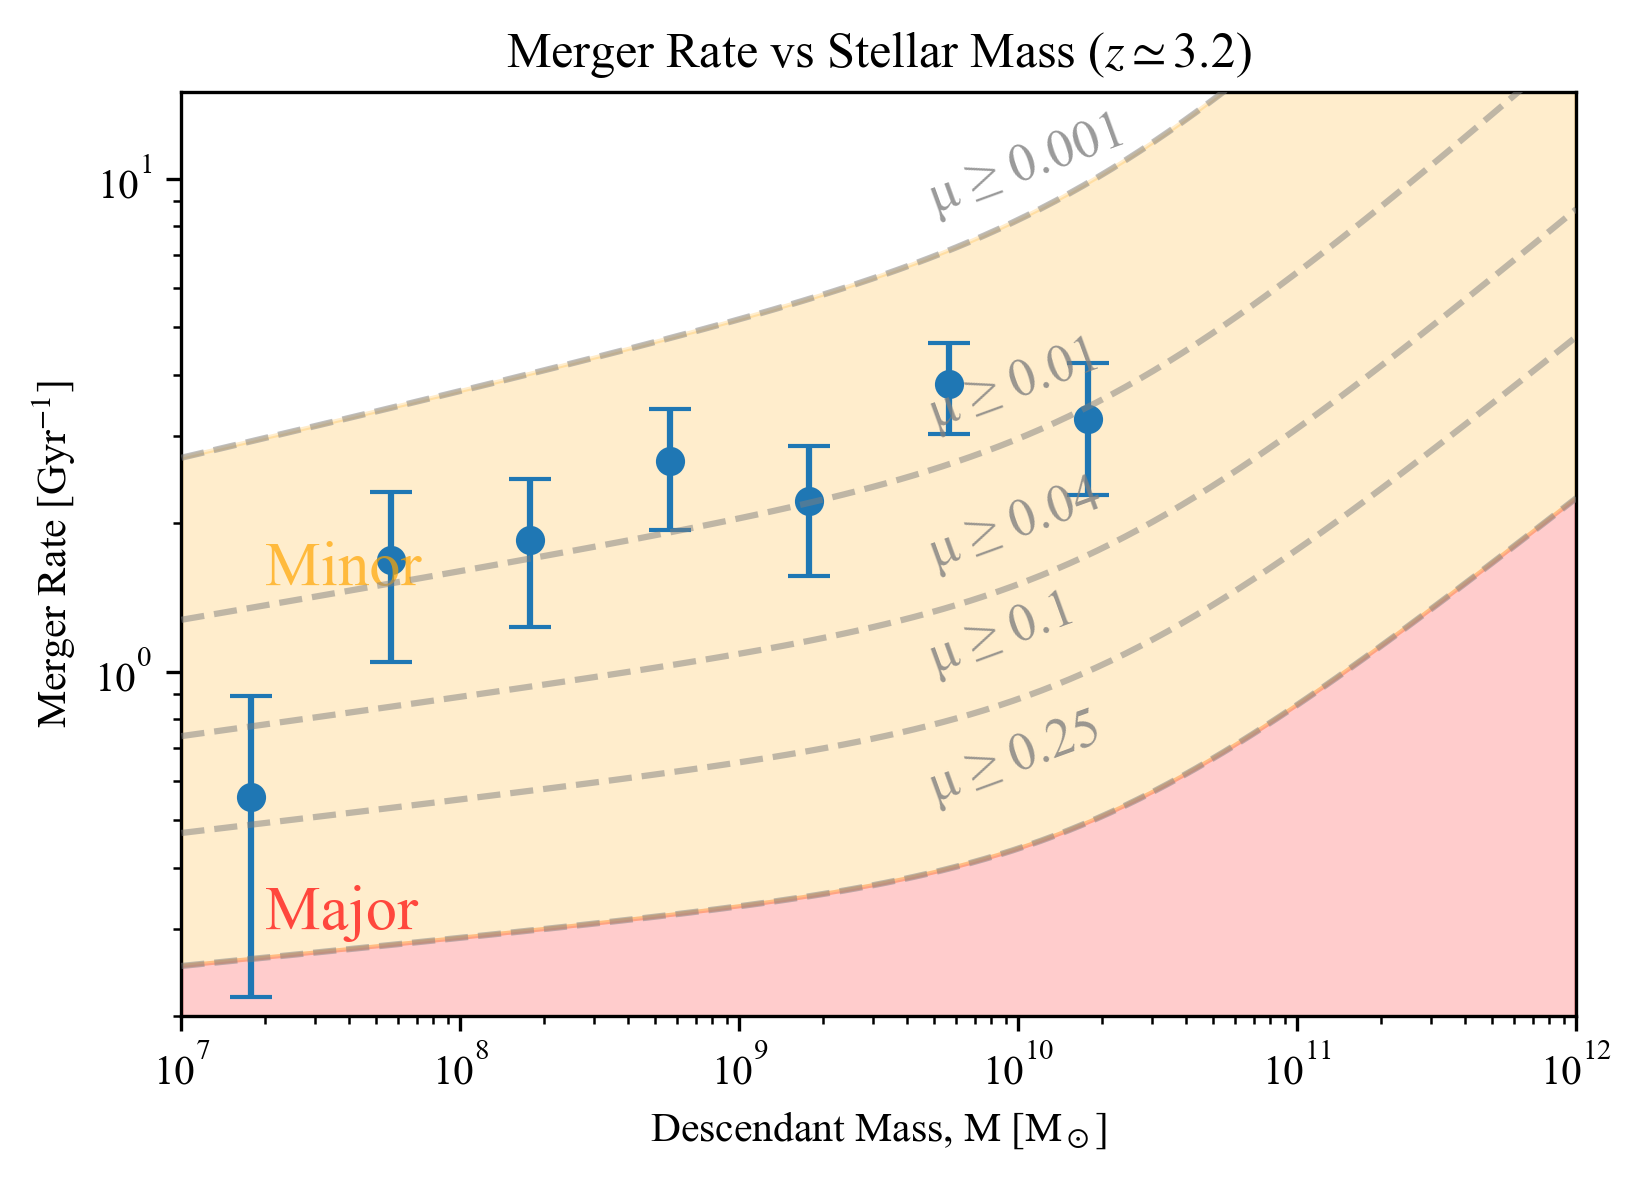

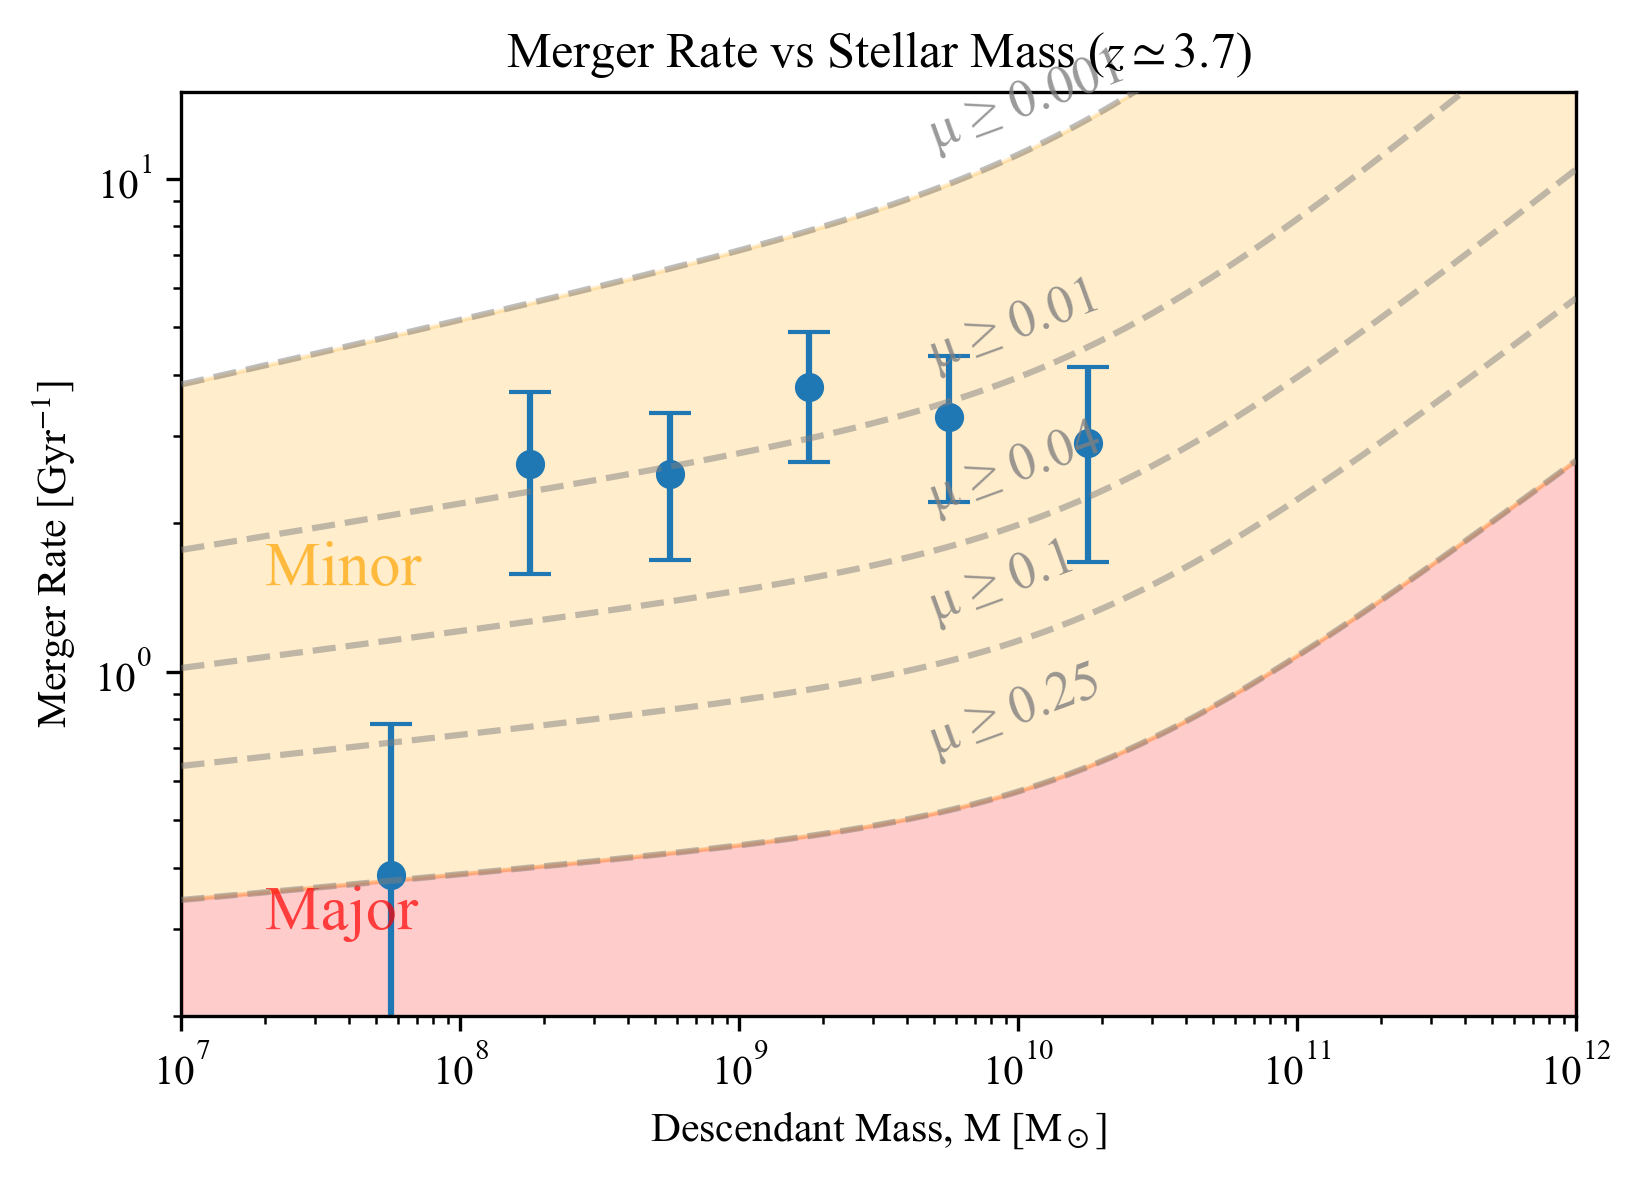

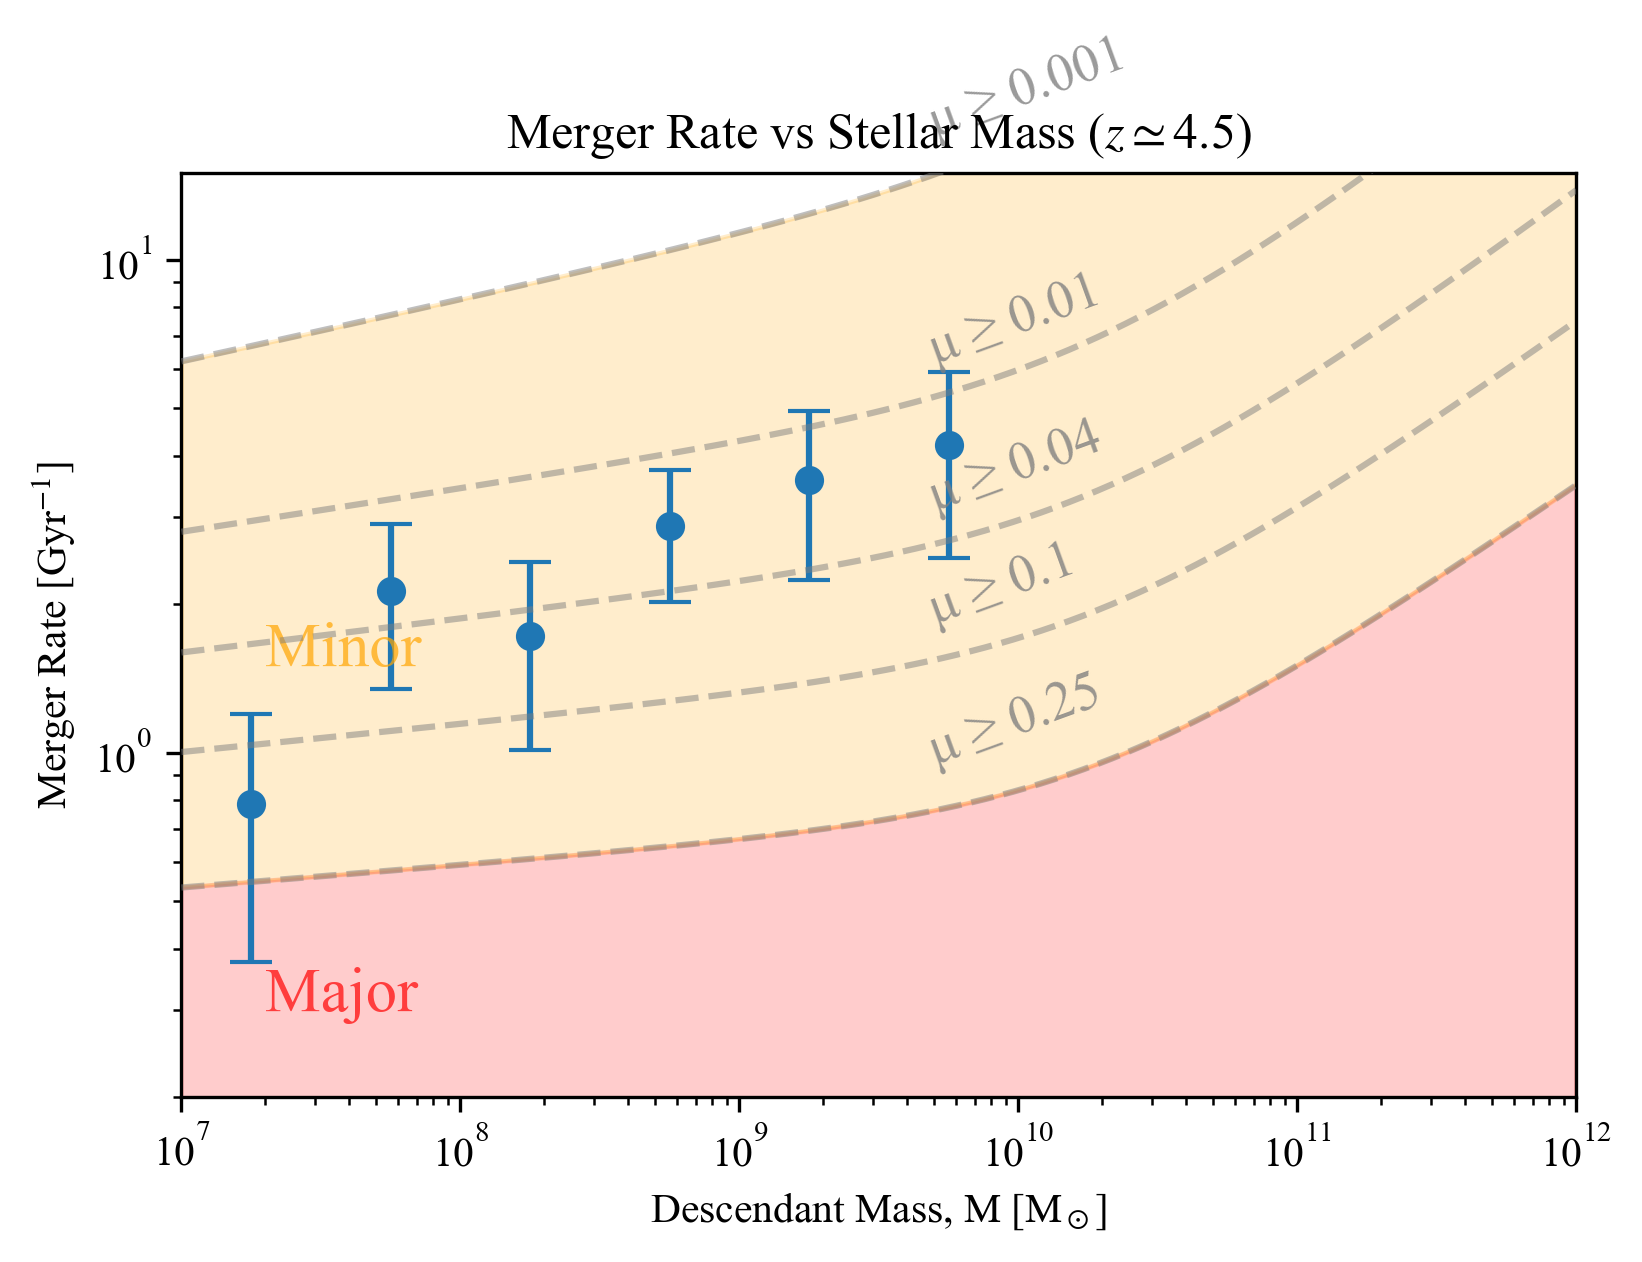

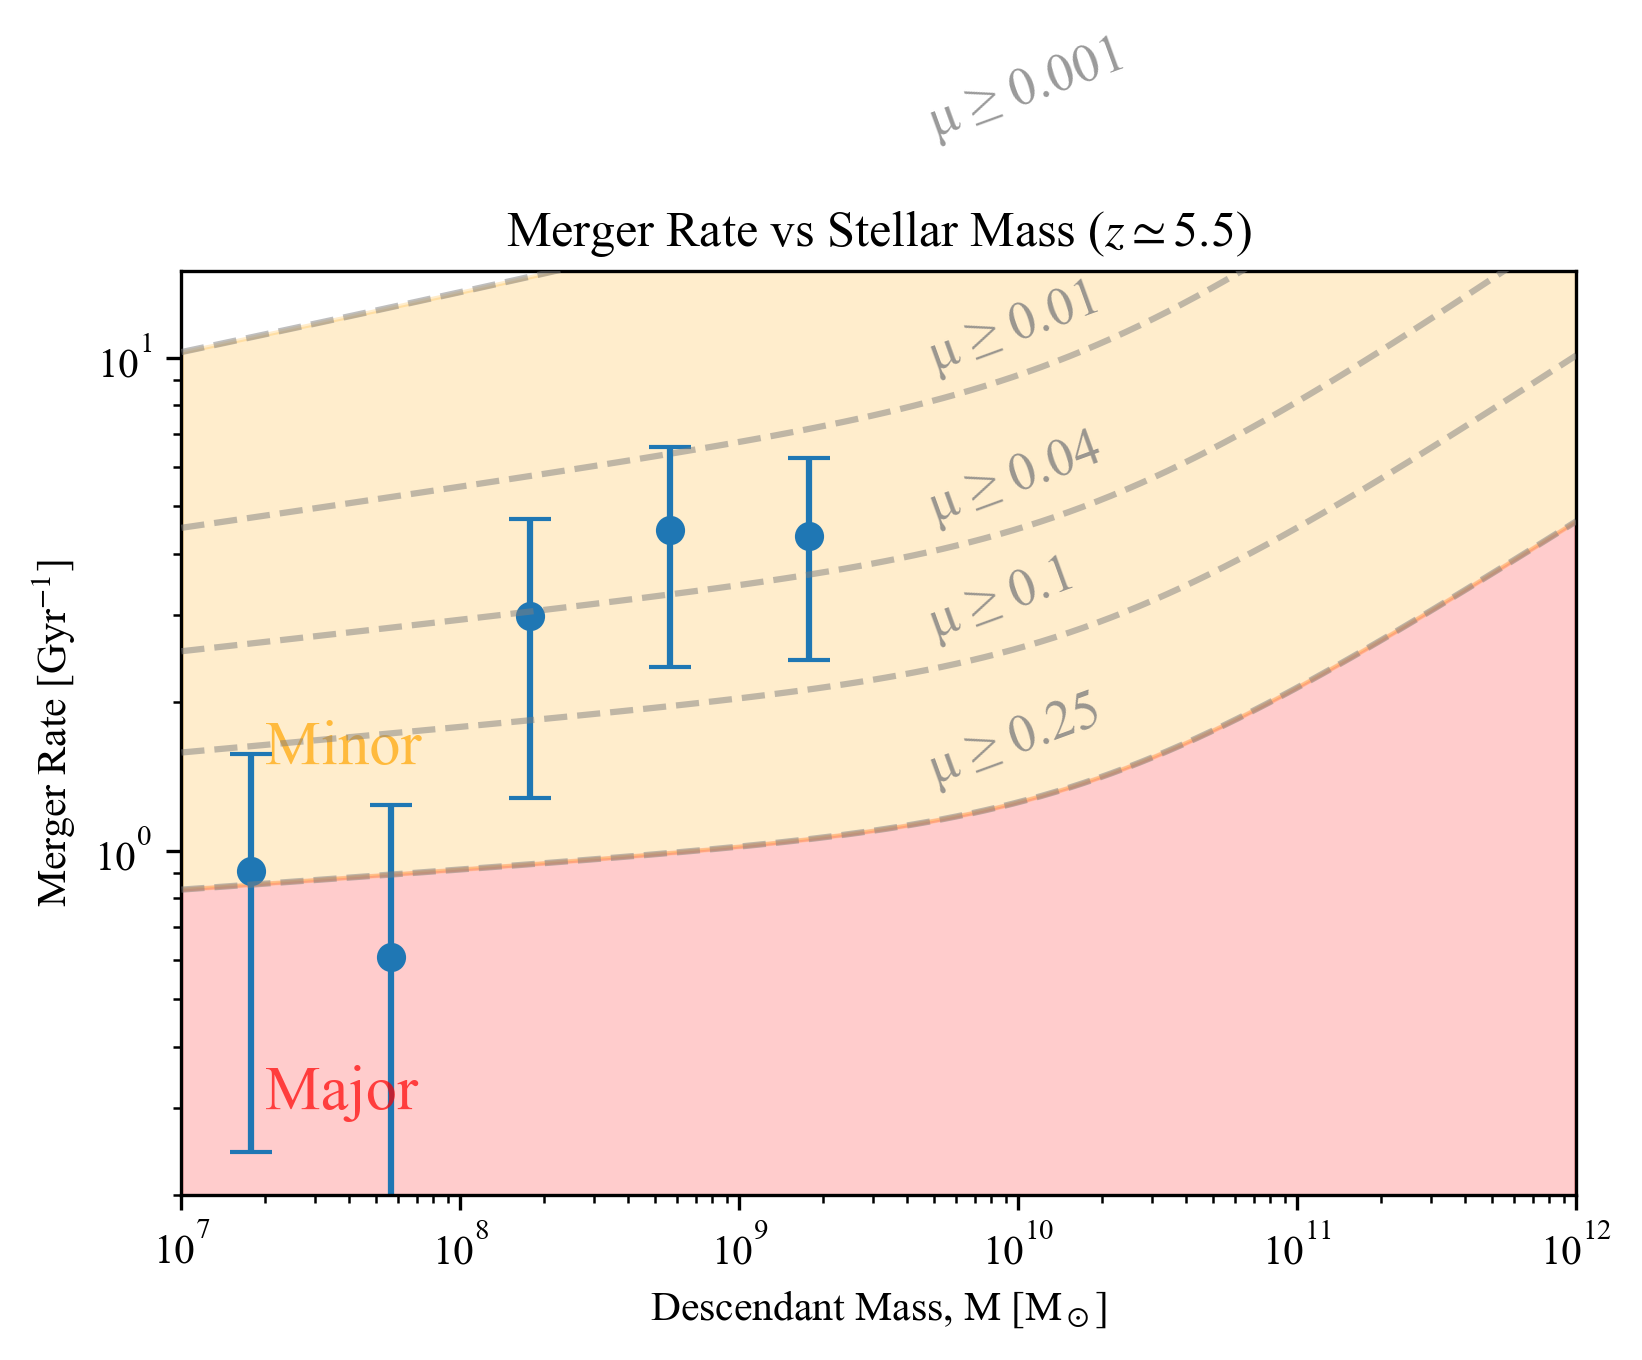

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
    
# Define bins for z
z_bins = [3, 3.5, 4, 5, 6]

co = pd.read_csv('comple.csv')
Mark = co['Mark']

for z_bin_l, z_bin_r in zip(z_bins, z_bins[1:]):
    # Define bins for log_SM
    width = 0.5
    M_bins = np.arange(7, 12 + width, width)
    
    # Initialize counters for each bin
    total_counts = {bin: 0 for bin in M_bins[:-1]}
    clumpy_counts = {bin: 0 for bin in M_bins[:-1]}
    tau_sum = {bin: 0 for bin in M_bins[:-1]}
    tau_err = {bin: 0 for bin in M_bins[:-1]}
    Ncom = {bin: 0 for bin in M_bins[:-1]}
    Ntot = {bin: 0 for bin in M_bins[:-1]}
    z_arr = []
    
    mu = 0.01 # example value for mu
    for i in range(len(zsp)):
        if z_bin_l <= zsp[i] < z_bin_r:
        # Bin the data
            log_M = M[i]
            z_sp = zsp[i]
            Type = types[i]
            z_arr.append(z_sp)
            
            for M_bin_l, M_bin_r in zip(M_bins[:-1], M_bins[1:-1]):
                if M_bin_l <= log_M < M_bin_r:
                    total_counts[M_bin_l] += 1
                    tau = t_dyn(mu, z_sp)
                    tau_e = t_dyn_err(mu, z_sp)
                    tau_sum[M_bin_l] += tau
                    tau_err[M_bin_l] += tau_e ** 2
                    Ntot[M_bin_l] += 1
                    
                    if Type == "C":
                        clumpy_counts[M_bin_l] += 1
                        
                    if Mark[i] == "Y":
                        Ncom[M_bin_l] += 1
        
    # Calculate the merger rate and errors
    merger_rates = []
    errors = []
    bin_centers = []
    
    for bin in M_bins[:-1]:
        if total_counts[bin] > 10:
            frac = fraction(clumpy_counts[bin], total_counts[bin])
            frac_err = fraction_err(clumpy_counts[bin], total_counts[bin])
            comp = fraction(Ncom[bin], Ntot[bin])
            frac_comp = comp_corr(frac, comp)
            frac_comp_err = comp_err(frac, comp, frac_err)

            tau_av = tau_sum[bin] / total_counts[bin]
            tau_error = np.sqrt(tau_err[bin]) / total_counts[bin]
            
            merger_rate = data_merger_rate(frac_comp, tau_av)
            merger_rate_err = data_merger_rate_err(frac_comp, tau_av, frac_comp_err, tau_error)
        
            merger_rates.append(merger_rate)
            errors.append(merger_rate_err)
            bin_centers.append(10**(bin + width/2))
            
    # Generate data for plotting
    M_values = np.logspace(7, 12, 100)  # Mass range from 10^7 to 10^12 solar masses
    zv = np.median(z_arr)
    
    # Plotting the results
    fig, ax = plt.subplots(figsize=(6,4), dpi=300)
    
    ax.errorbar(bin_centers, merger_rates, yerr=errors, fmt='o', capsize=5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'Descendant Mass, M [M$_\odot$]')
    ax.set_ylabel(r'Merger Rate [Gyr$^{-1}$]')
    ax.set_title(r'Merger Rate vs Stellar Mass ($z\simeq${:.1f})'.format(zv))

    # Rotate angle
    angle = 20
    
    # Adding lines for different mu values
    mu_values = [0.001, 0.01, 0.04, 0.1, 0.25]
    texty = []
    z = zv  # average redshift for example
    
    # Adding shaded regions
    # Calculate the y-values for each mu
    
    y_values_mu_001 = [cumulative_merger_rate(M, 0.001, zv) for M in M_values]
    y_values_mu_25 = [cumulative_merger_rate(M, 0.25, zv) for M in M_values]

    # Plot the shaded regions
    ax.fill_between(M_values, y_values_mu_25, color='red', alpha=0.2, label='Major merger')
    ax.fill_between(M_values, y_values_mu_001, y_values_mu_25, color='orange', alpha=0.2, label= 'Minor merger')
    
    for mu_min in mu_values:
        y_values = [cumulative_merger_rate(M, mu_min, zv) for M in M_values]
        ax.plot(M_values, y_values, color='grey', ls='--', alpha=0.5, zorder=20)
        
        texty.append(y_values[60]+0.1)

    for i in range(len(texty)):
        ax.text(5e9, texty[i],f'μ ≥ {mu_values[i]}',fontsize=13, color='grey',alpha=0.8, rotation=angle, rotation_mode='anchor')
                    
    plt.text(2e7, 1.5,'Minor ',fontsize=15, color='orange',alpha=0.7)
    
    plt.text(2e7, 0.3,'Major ',fontsize=15, color='red',alpha=0.7)
    
    plt.xlim(1e7,1e12)
    plt.ylim(0.2,15)
    #plt.legend()
    #plt.savefig("merger rate z={:.1f}.png".format(zv))
    #plt.show()

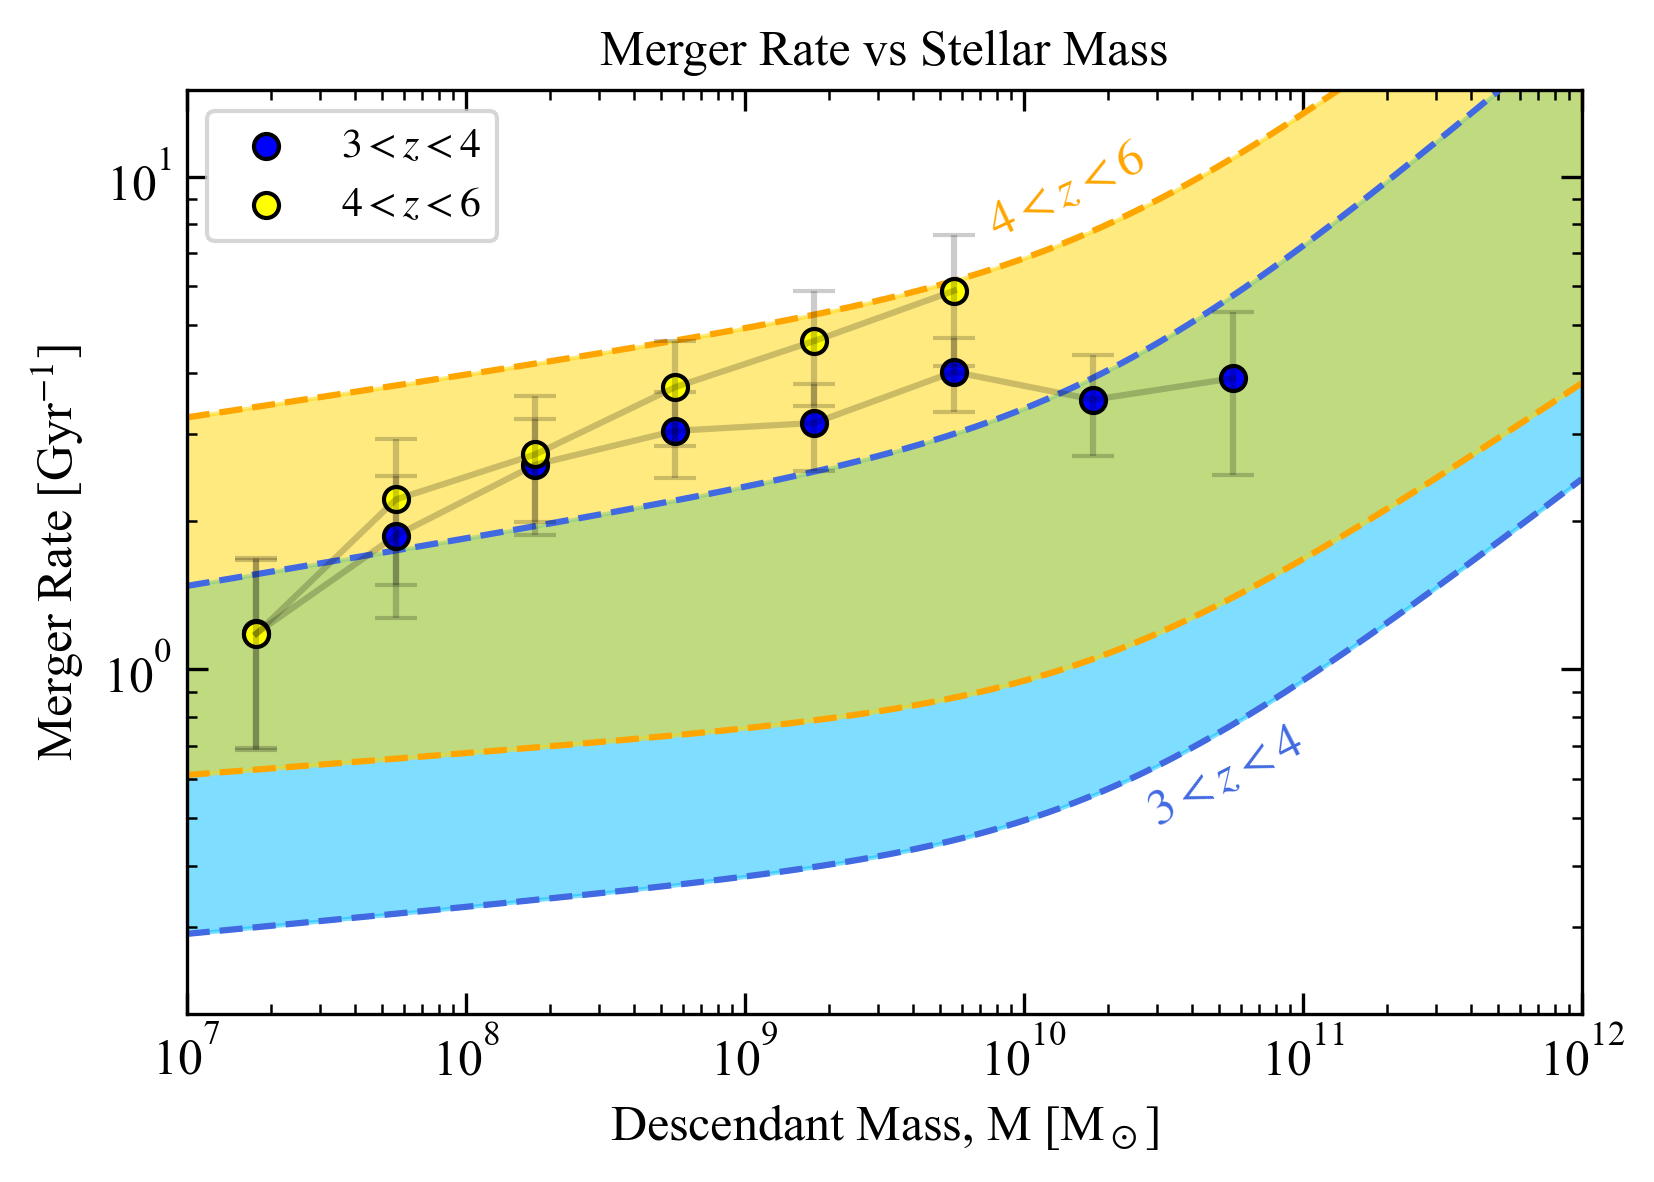

In [331]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

    
# Define bins for z
z_bins = [3, 4, 6]

# Define bins for log_SM
width = 0.5
M_bins = np.arange(7, 12 + width, width)

fig, ax = plt.subplots(figsize=(6,4), dpi=300)

color = ['blue', 'yellow']
line_color = ['royalblue', 'orange']
label = ['$3<z<4$', '$4<z<6$', '$z>5$']

w = 0 

co = pd.read_csv('comple.csv')
Mark = co['Mark']
for z_bin_l, z_bin_r in zip(z_bins, z_bins[1:]):

    
    # Initialize counters for each bin
    total_counts = {bin: 0 for bin in M_bins[:-1]}
    clumpy_counts = {bin: 0 for bin in M_bins[:-1]}
    tau_sum = {bin: 0 for bin in M_bins[:-1]}
    tau_err = {bin: 0 for bin in M_bins[:-1]}
    Ncom = {bin: 0 for bin in M_bins[:-1]}
    Ntot = {bin: 0 for bin in M_bins[:-1]}

    z_arr = []

    
    mu = 0.25 # example value for mu
    for i in range(len(zsp)):
        if z_bin_l <= zsp[i] < z_bin_r:
        # Bin the data
            log_M = M[i]
            z_sp = zsp[i]
            Type = types[i]
            z_arr.append(z_sp)
            
            for M_bin_l, M_bin_r in zip(M_bins[:-1], M_bins[1:-1]):
                if M_bin_l <= log_M < M_bin_r:
                    total_counts[M_bin_l] += 1
                    tau = t_dyn(mu, z_sp)
                    tau_e = t_dyn_err(mu, z_sp)
                    tau_sum[M_bin_l] += tau
                    tau_err[M_bin_l] += tau_e ** 2
                    Ntot[M_bin_l] += 1
                    
                    if Type == "C":
                        clumpy_counts[M_bin_l] += 1
                        
                    if Mark[i] == "Y":
                        Ncom[M_bin_l] += 1

        
    # Calculate the merger rate and errors
    merger_rates = []
    errors = []
    bin_centers = []

    for bin in M_bins[:-1]:
        if total_counts[bin] > 10:
            frac = fraction(clumpy_counts[bin], total_counts[bin])
            frac_err = fraction_err(clumpy_counts[bin], total_counts[bin])
            comp = fraction(Ncom[bin], Ntot[bin])
            frac_comp = comp_corr(frac, comp)
            frac_comp_err = comp_err(frac, comp, frac_err)
            tau_av = tau_sum[bin] / total_counts[bin]
            tau_error = np.sqrt(tau_err[bin]) / total_counts[bin]
            
            merger_rate = data_merger_rate(frac_comp, tau_av)
            merger_rate_err = data_merger_rate_err(frac_comp, tau_av, frac_comp_err, tau_error)
        
            merger_rates.append(merger_rate)
            errors.append(merger_rate_err)
            bin_centers.append(10**(bin + width/2))
            
    # Generate data for plotting
    M_values = np.logspace(7, 12, 100)  # Mass range from 10^7 to 10^12 solar masses
    zv = np.median(z_arr)
    z = zv  # average redshift for example

    
    # Calculate the y-values for each mu
    ax.scatter(bin_centers, merger_rates, c=color[w], edgecolor='black', label=label[w], zorder=10)
    ax.errorbar(bin_centers, merger_rates, yerr=errors, fmt='-', c='black', alpha=0.2, capsize=5, zorder=10)
    
    # Adding shaded regions
    
    y_values_mu_01 = [cumulative_merger_rate(M, 0.01, zv) for M in M_values]
    y_values_mu_25 = [cumulative_merger_rate(M, 0.25, zv) for M in M_values]

    # Plot the shaded regions
    ax.fill_between(M_values, y_values_mu_01, y_values_mu_25, color=fill_color[w], alpha=0.5, zorder=0)
    ax.plot(M_values, y_values_mu_01, color=line_color[w], linestyle='--')
    ax.plot(M_values, y_values_mu_25, color=line_color[w], linestyle='--')
    
    w += 1
    
ax.text(3e10, 0.48, r'$3<z<4$', fontsize=12, color='royalblue', alpha=1, fontweight='bold', rotation=27, rotation_mode='anchor')
ax.text(8e9, 7.5, r'$4<z<6$', fontsize=12, color='orange', alpha=1, fontweight='bold', rotation=25, rotation_mode='anchor')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Descendant Mass, M [M$_\odot$]', fontsize=12)
ax.set_ylabel(r'Merger Rate [Gyr$^{-1}$]', fontsize=12)
ax.set_title(r'Merger Rate vs Stellar Mass', fontsize=12)

ax.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=2.5)
ax.tick_params(axis='both', which='major', length=5, labelsize=12)

#plt.text(2e7, 1.5,'Minor ',fontsize=15, color='orange',alpha=0.7)

#plt.text(2e7, 0.3,'Major ',fontsize=15, color='red',alpha=0.7)

plt.xlim(1e7,1e12)
plt.ylim(0.2,15)
plt.legend()
plt.savefig("merger rate.png", bbox_inches='tight', dpi=300)
plt.show()

C:\Users\Ryo\AppData\Local\Temp\ipykernel_17392\4133938355.py:130: UserWarning: Glyph 1451 (\N{HEBREW ACCENT OLE}) missing from current font.
  plt.savefig("merger rate.png", bbox_inches='tight', dpi=300)
C:\Users\Ryo\AppData\Local\Temp\ipykernel_17392\4133938355.py:130: UserWarning: Matplotlib currently does not support Hebrew natively.
  plt.savefig("merger rate.png", bbox_inches='tight', dpi=300)
C:\Users\Ryo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1451 (\N{HEBREW ACCENT OLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ryo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Hebrew natively.
  fig.canvas.print_figure(bytes_io, **kw)


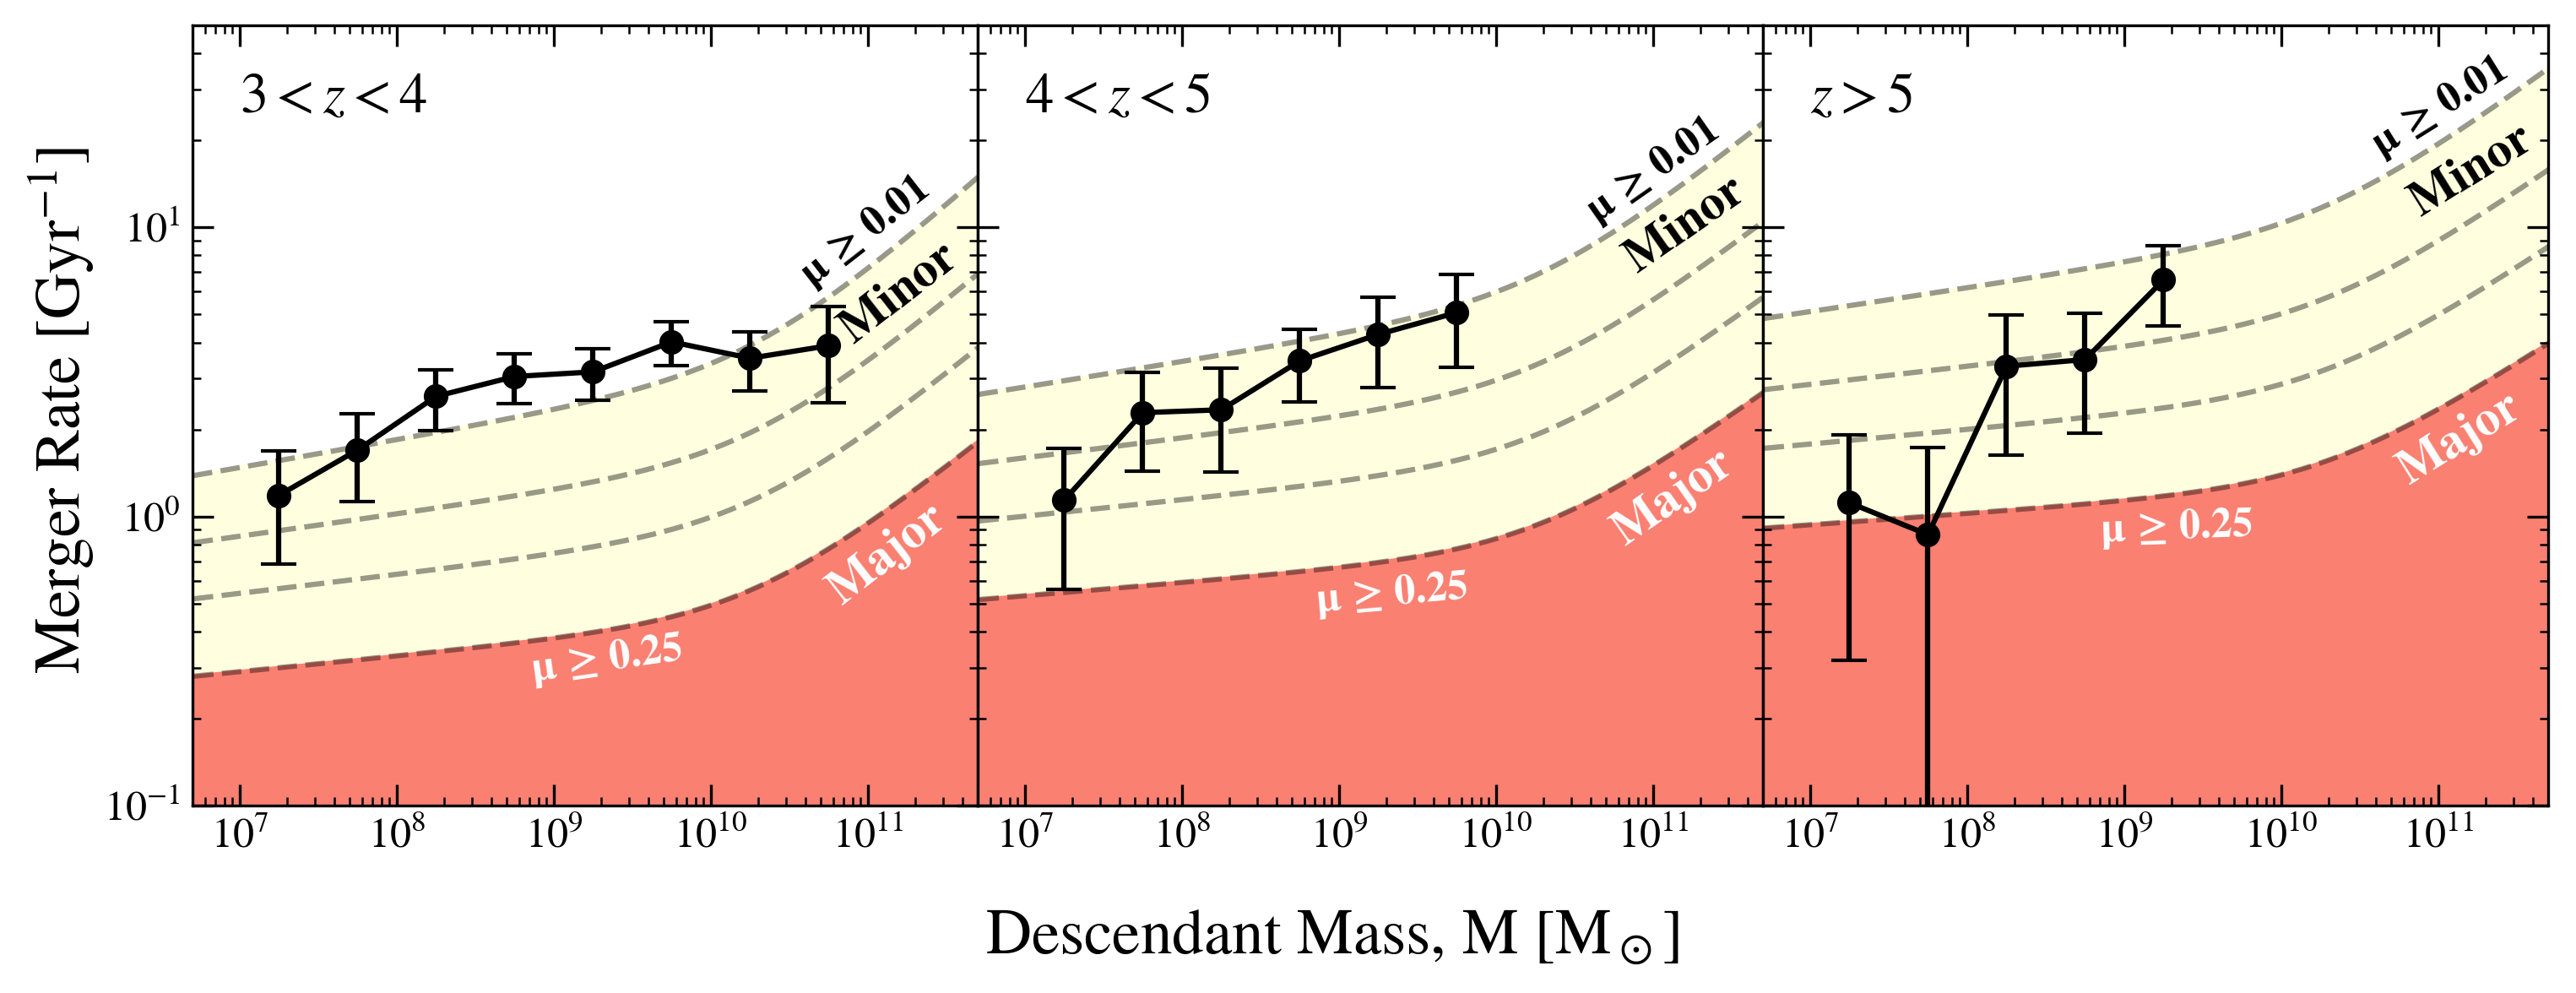

In [299]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey='row', dpi=300)
fig.subplots_adjust(wspace=0)

# Define bins for z
z_bins = [3, 4, 5, 11]

# Define bins for log_SM
width = 0.5
M_bins = np.arange(7, 12 + width, width)

color = ['xkcd:ruby', 'xkcd:teal', 'xkcd:dodger blue']

w = 0 

co = pd.read_csv('comple.csv')
Mark = co['Mark']
for z_bin_l, z_bin_r in zip(z_bins, z_bins[1:]):
    # Initialize counters for each bin
    total_counts = {bin: 0 for bin in M_bins[:-1]}
    clumpy_counts = {bin: 0 for bin in M_bins[:-1]}
    tau_sum = {bin: 0 for bin in M_bins[:-1]}
    tau_err = {bin: 0 for bin in M_bins[:-1]}
    Ncom = {bin: 0 for bin in M_bins[:-1]}
    Ntot = {bin: 0 for bin in M_bins[:-1]}
    
    z_arr = []

    
    mu = 0.25 # example value for mu
    for i in range(len(zsp)):
        if z_bin_l <= zsp[i] < z_bin_r:
        # Bin the data
            log_M = M[i]
            z_sp = zsp[i]
            Type = types[i]
            z_arr.append(z_sp)
            
            for M_bin_l, M_bin_r in zip(M_bins[:-1], M_bins[1:-1]):
                if M_bin_l <= log_M < M_bin_r:
                    total_counts[M_bin_l] += 1
                    tau = t_dyn(mu, z_sp)
                    tau_e = t_dyn_err(mu, z_sp)
                    tau_sum[M_bin_l] += tau
                    tau_err[M_bin_l] += tau_e ** 2
                    Ntot[M_bin_l] += 1
                    
                    if Type == "C":
                        clumpy_counts[M_bin_l] += 1
                        
                    if Mark[i] == "Y":
                        Ncom[M_bin_l] += 1

        
    # Calculate the merger rate and errors
    merger_rates = []
    errors = []
    bin_centers = []

    for bin in M_bins[:-1]:
        if total_counts[bin] > 10:
            frac = fraction(clumpy_counts[bin], total_counts[bin])
            frac_err = fraction_err(clumpy_counts[bin], total_counts[bin])
            comp = fraction(Ncom[bin], Ntot[bin])
            frac_comp = comp_corr(frac, comp)
            frac_comp_err = comp_err(frac, comp, frac_err)
            tau_av = tau_sum[bin] / total_counts[bin]
            tau_error = np.sqrt(tau_err[bin]) / total_counts[bin]
            
            merger_rate = data_merger_rate(frac_comp, tau_av)
            merger_rate_err = data_merger_rate_err(frac_comp, tau_av, frac_comp_err, tau_error)
        
            merger_rates.append(merger_rate)
            errors.append(merger_rate_err)
            bin_centers.append(10**(bin + width/2))
            
    # Generate data for plotting
    M_values = np.logspace(6, 12, 100)  # Mass range from 10^7 to 10^12 solar masses
    zv = np.median(z_arr)
    z = zv  # average redshift for example

    # Calculate the y-values for each mu
    ax[w].scatter(bin_centers, merger_rates, c='black', edgecolor='black', zorder=10)
    ax[w].errorbar(bin_centers, merger_rates, yerr=errors, fmt='-', c='black', alpha=1, capsize=5, zorder=5)
    mu_values = [0.01, 0.04, 0.1, 0.25]

    for mu_min in mu_values:
        y_values = [cumulative_merger_rate(M, mu_min,zv) for M in M_values]
        ax[w].plot(M_values, y_values,  color='black', ls='--', alpha=0.4, zorder=20)
 
        y_values_mu_01 = [cumulative_merger_rate(M, 0.01, zv) for M in M_values]
        y_values_mu_25 = [cumulative_merger_rate(M, 0.25, zv) for M in M_values]

        # Plot the shaded regions
        ax[w].fill_between(M_values, y_values_mu_01, y_values_mu_25, color='lightyellow', alpha=1)
        ax[w].fill_between(M_values, y_values_mu_25, color='salmon', alpha=1)
        
    
    ax[w].set_xscale('log')
    ax[w].set_yscale('log')
    ax[w].tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=2.5)
    ax[w].tick_params(axis='both', which='major', length=6, labelsize=12)
    x.tick_params(axis='x', which='both', direction = "in", right="on", length=3)

    ax[w].set_xlim(5e6, 5e11)
    ax[w].set_ylim(0.1, 50)
    w += 1

label = ['$3<z<4$', '$4<z<5$', '$z>5$']
minor = [[6e10, 4], [6e10, 7], [6e10, 11]]
major = [[5e10, 0.5], [5e10, 0.8], [5e10, 1.3]]
mu_mi = [[3e10, 6], [3e10, 10], [3e10, 17]]
mu_ma = [[7e8, 0.27], [7e8, 0.47], [7e8, 0.82]]
rot = [38, 35, 32]
# Customize matplotlib
for w in range(len(ax)): 
    ax[w].text(minor[w][0], minor[w][1], 'Minor ', fontsize=14, rotation=rot[w], color='black', alpha=1, fontweight='bold')    
    ax[w].text(major[w][0], major[w][1], 'Major ', fontsize=14, rotation=rot[w], color='white', alpha=1, fontweight='bold')
    ax[w].text(mu_ma[w][0], mu_ma[w][1], r'μ ≥ 0.25', fontsize=12, rotation=rot[w]-30, color='white', alpha=1, fontweight='bold')
    ax[w].text(mu_mi[w][0], mu_mi[w][1], r'֫μ ≥ 0.01', fontsize=12, rotation=rot[w], color='black', alpha=1, fontweight='bold')
    ax[w].text(1e7, 25, label[w], fontsize=16, color='black', alpha=1)
    
    
fig.supxlabel(r'Descendant Mass, M [M$_\odot$]', y=-0.05, fontsize=18)
fig.supylabel(r'Merger Rate [Gyr$^{-1}$]', x=0.07, fontsize=18)

plt.savefig("merger rate.png", bbox_inches='tight', dpi=300)
plt.show()

### $β$ and $M_{UV}$

In [302]:
# calculate AB magnitudes
ABmag = {}
for bb in range(nfilters):
    ABmag[filter_names[bb]] = np.zeros(len(idx))

i = 0
for ii in idx:
    for bb in range(nfilters):
        ABmag[filter_names[bb]][i] = -2.5*np.log10(flux[filter_names[bb]][ii]*1e-6) + 8.90
    i += 1

C:\Users\Ryo\AppData\Local\Temp\ipykernel_17392\517615318.py:9: RuntimeWarning: invalid value encountered in log10
  ABmag[filter_names[bb]][i] = -2.5*np.log10(flux[filter_names[bb]][ii]*1e-6) + 8.90


In [303]:
data = {
    'ID': ID_new[idx],
    'redshift': z_spec[idx],
    'Av' : Av[idx],
    'type' : types}
data = data | ABmag

df = pd.DataFrame(data, index=[ii for ii in idx])
df.iloc[:, 4:60] = df.iloc[:, 4:60].mask(df.iloc[:, 4:60] < 0)

df.to_csv('flux.csv')
df = pd.read_csv('flux.csv')

# Define filter wavelengths in microns
filter_wavelengths = {
    # HST
    'f105w': 1.055,
    'f110w': 1.153,
    'f125w': 1.249,
    'f140w': 1.392,
    'f160w': 1.537,
    # 'f350l': 0.587,
    'f435w': 0.430,
    'f606w': 0.591,
    'f606u': 0.589,
    'f775w': 0.776,
    'f814w': 0.833,
    'f814wu': 0.804,
    'f850lp': 0.945,
    'f850lpu': 0.918,
    # JWST
    'f090w': 0.901,
    'f115w': 1.154,
    'f150w': 1.501,
    'f182m': 1.845,
    'f200w': 1.990,
    'f210m': 2.093,
    'f277w': 2.786,
    'f335m': 3.365,
    'f356w': 3.563,
    'f410m': 4.092,
    'f430m': 4.280,
    'f444w': 4.421,
    'f460m': 4.624,
    'f480m': 4.834
}

# Function to find the slope of flux with wavelength in the specified range
def calculate_slope(row, filter_wavelengths):
    redshift = row['redshift']
    observed_min = 0.15 * (1 + redshift)
    observed_max = 0.3 * (1 + redshift)
    # Select filters within the observed wavelength range
    selected_filters = {f: w for f, w in filter_wavelengths.items() if observed_min <= w <= observed_max}

    if len(selected_filters) < 2:
        return np.nan  # Not enough data points to calculate slope
     
    # Extract wavelengths and fluxes for the selected filters
    wavelengths = np.array(list(selected_filters.values()))
    magnitudes = np.array([row[f] for f in selected_filters.keys()])
    
    # Boolean mask where array1 is not NaN
    mask = ~np.isnan(magnitudes)
    
    # Filter both arrays with the mask
    wavelengths = wavelengths[mask]
    magnitudes = magnitudes[mask]
    
    # Calculate the slope using linear regression
    slope, intercept, _, _, slope_e, = linregress(-2.5*np.log10(wavelengths), magnitudes)
    return slope, slope_e, intercept, wavelengths, magnitudes

# Apply the function to each row in the dataframe
results = df.apply(lambda row: calculate_slope(row, filter_wavelengths), axis=1)
df['slope'], df['slope_e'], df['intercept'], df['wavelengths'], df['magnitudes'] = zip(*results)

df['beta'] = df['slope'] - 2
df['beta_e'] = df['slope_e']

def k(x):
    x = 1e3 / x
    x0 = 4.592
    gamma = 0.922
    c1 = -0.175
    c2 = 0.807
    c3 = 2.991
    c4 = 0.319
    c5 = 6.097
    D = x**2 / ( (x**2 - x0**2)**2 + x**2 * gamma**2 )
    return c1 + c2 * x + c3 * D + c4 * (x - c5)**2

def A_lam(Av, lam):
    Rv = 3.1
    return Av * (1 + k(lam) / Rv)
    
df['A150'] = A_lam(df['Av'], 150)

# Calculate the flux at rest-frame 0.150 microns for each source
def calculate_flux_at_150(row):
    redshift = row['redshift']
    wavelength_150_observed = 0.150 * (1 + redshift)
    if not np.isnan(row['slope']):
        flux_150 = row['slope'] * wavelength_150_observed + row['intercept']
        return flux_150
    else:
        return np.nan

def k_correction(slope, redshift):
    return 2.5 * (1 + slope) * np.log10(1 + redshift)

# Convert flux_150 to magnitude
df['mag_150'] = df.apply(calculate_flux_at_150, axis=1)

# Apply K-correction and calculate MUV
df['k_correction'] = df.apply(lambda row: k_correction(row['beta'], row['redshift']), axis=1)


df['mag_150_corr'] = df['mag_150'] - df['k_correction']
df['M_150_corr'] = df['mag_150'] + 5 - 5 * np.log10(cosmo.luminosity_distance(df['redshift']) * 10**6)

df['Mu'] = X['Mu']
df['Mv'] = X['Mv']
df['Mu_err'] = X['Mu_err']
df['Mv_err'] = X['Mv_err']

# def Muv(row):
#     Mu = row['Mu']
#     Mv = row['Mv']
#     u_w = 365
#     v_w = 551 
#     wavelengths = np.array([u_w, v_w])
#     magnitudes = np.array([Mu, Mv])
#     result = linregress(wavelengths, magnitudes)
#     slope = result.slope
#     intercept = result.intercept
#     slope_e = result.stderr
#     intercept_e = result.intercept_stderr
    
#     extrapolation = slope * 150 + intercept
#     extrapolation_e = np.sqrt((150 * slope_e)**2 + intercept_e**2)
#     return extrapolation, extrapolation_e

# results = df.apply(lambda row: Muv(row), axis=1)
# df['Muv'], df['Muv_e'] = zip(*results)


def Muv(row):
    Mu = row['Mu']
    Mv = row['Mv']
    Mu_e = row['Mu_err']
    Mv_e = row['Mv_err']
    u_w = 365
    v_w = 551
    wavelengths = np.array([u_w, v_w])
    magnitudes = np.array([Mu, Mv])
    slope, intercept, _, _, _, = linregress(wavelengths, magnitudes)
    slope_e = np.sqrt((Mu_e / (u_w-v_w))**2 + (Mv_e / (u_w-v_w))**2)
    intercept_e = np.sqrt((Mu_e)**2 + (u_w*slope_e)**2)
    extrapolation = slope * 150 + intercept
    extrapolation_e = np.sqrt((150 * slope_e)**2 + intercept_e**2)
    return extrapolation, extrapolation_e

results = df.apply(lambda row: Muv(row), axis=1)
df['Muv'], df['Muv_e'] = zip(*results)

df.to_csv('UV slope.csv')
df.head()

#MJ = -2.5 log (restJ) -> 1250
#F125 -> 1250
#
#K corr = -2.5 log ((1+z) * (F125)/restJ)

Unnamed: 0           ID  redshift        Av type      f090w      f105w  \
0      124366  FRESCO32042  3.000181  0.042148    C  26.835121  26.860201   
1      116809  FRESCO25241  3.000969  0.139004    C  27.016030  26.912942   
2      125278  FRESCO32864  3.003700  0.156284    N  25.767675  25.575436   
3       77746  COSWEB16507  3.004200  1.202687    C        NaN  25.000887   
4      113850  FRESCO22579  3.004754  0.247598    C  28.924907  28.662205   

   f110w      f115w      f125w  ...    mag_150  k_correction  mag_150_corr  \
0    NaN  26.871294  26.903273  ...  26.574018     -2.198366     28.772384   
1    NaN  26.868334  26.828129  ...  27.004202     -1.217984     28.222186   
2    NaN  25.699425  25.644744  ...  25.546502     -1.703275     27.249777   
3    NaN  25.309044  24.959439  ...  25.245086     -1.400640     26.645725   
4    NaN  28.596144  28.584600  ...  28.829486     -1.199711     30.029198   

   M_150_corr         Mu         Mv    Mu_err    Mv_err        Muv     Muv_e  
0  -20.452252 -20.273247 -20.631716  0.023196  0.028804 -19.858887  0.081820  
1  -20.022754 -20.123826 -20.402539  0.026189  0.034765 -19.801658  0.095986  
2  -21.482830 -21.512023 -21.934297  0.021212  0.020868 -21.023911  0.066599  
3  -21.784681 -22.241147 -22.922339  0.050377  0.076500 -21.453747  0.200758  
4  -18.200762 -18.530279 -18.883345  0.042797  0.053080 -18.122166  0.150858  

[5 rows x 51 columns]

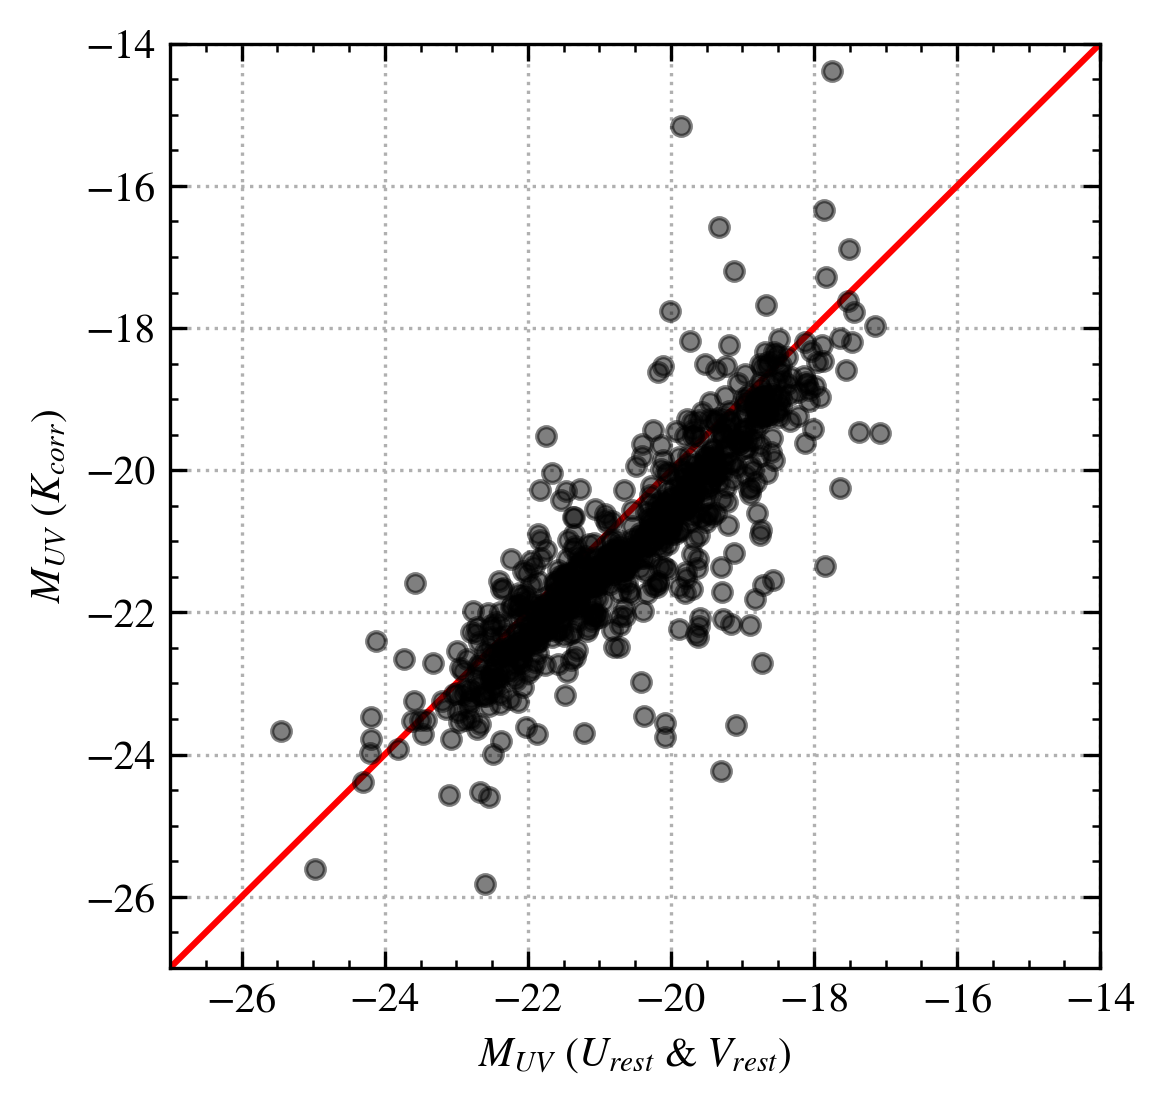

In [335]:
plt.figure(figsize=(4, 4), dpi=300)
x = np.linspace(-30, -10)
plt.plot(x, x, c='red')
plt.scatter(df['Muv'], df['M_150_corr'], c='black', s=20, alpha=0.5, zorder=10)
plt.xlim(-27, -14)
plt.ylim(-27, -14)
plt.xlabel('$M_{UV}$ ($U_{rest}\ & \ V_{rest})$')
plt.ylabel('$M_{UV}$ ($K_{corr}$)')
plt.grid(visible=True, linestyle=':')

plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on")
plt.tick_params(axis="both", which='major', length=4)
plt.savefig('muv_corr.png', bbox_inches='tight', dpi=300)
plt.show()

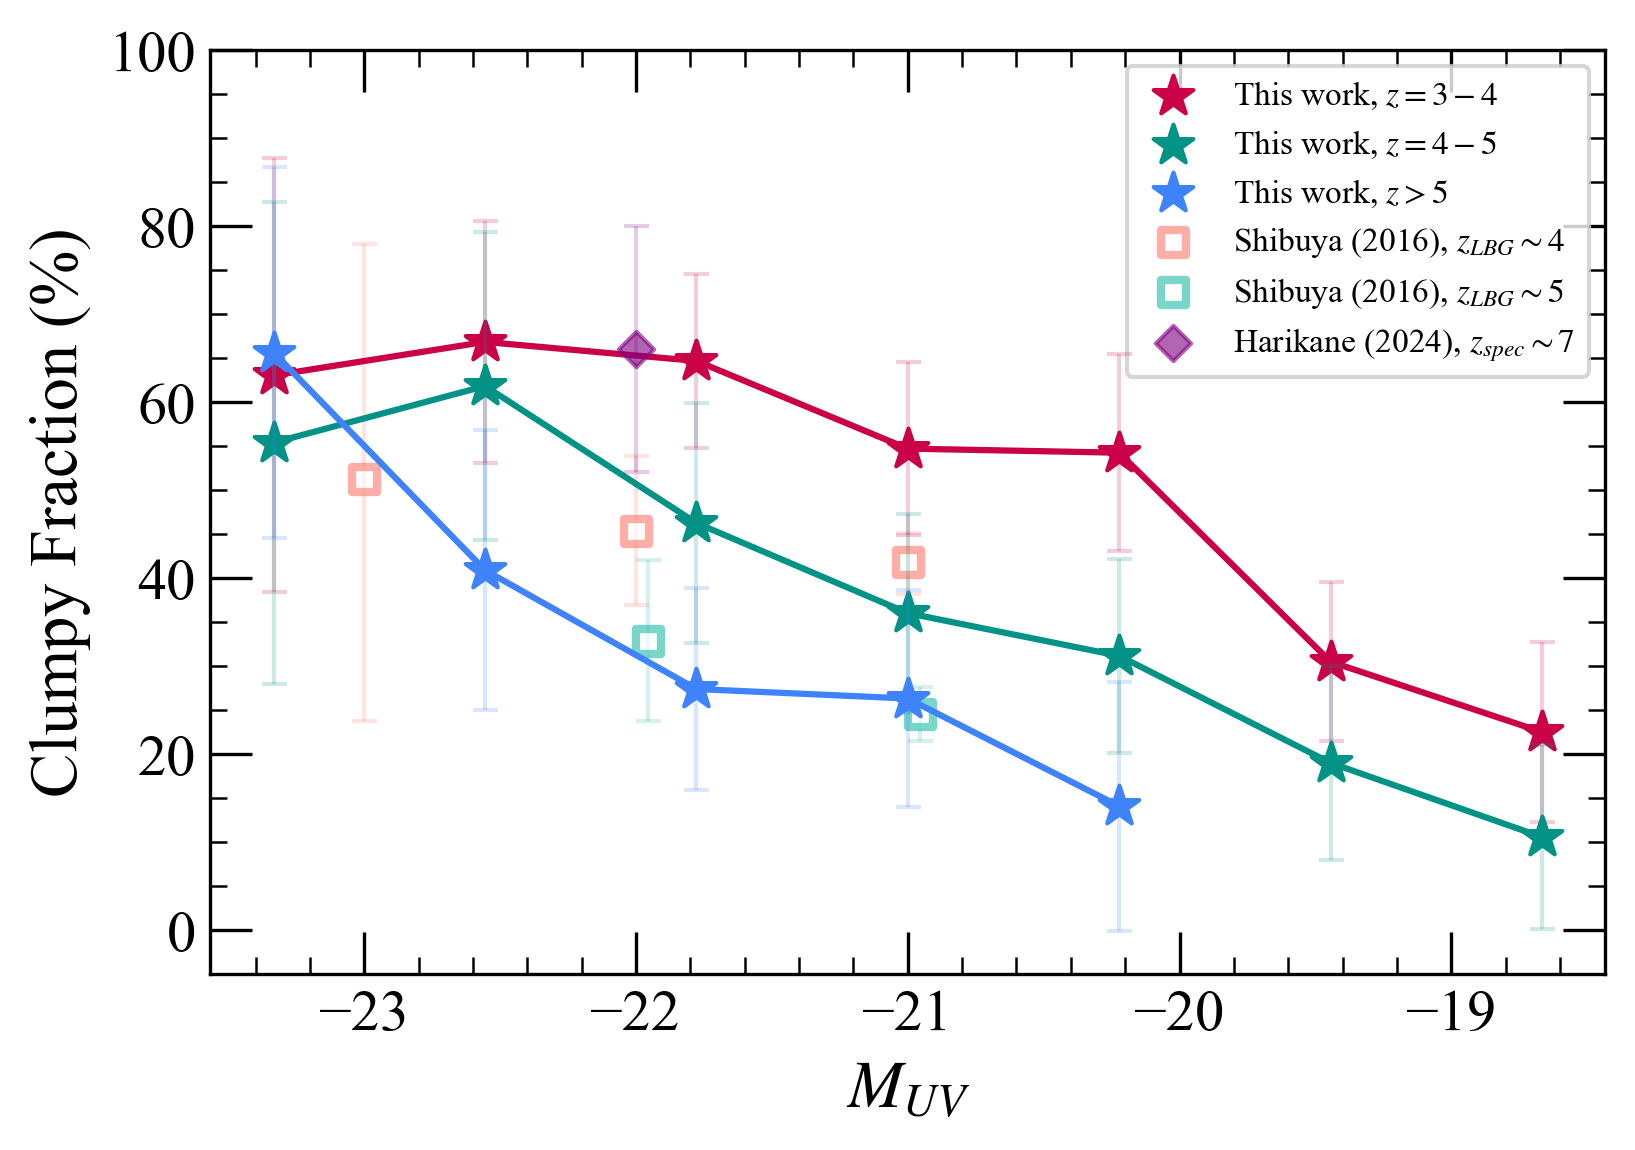

In [285]:
# Function definition

# Number fraction
def fraction(a, b):
    return a/b

# Number fraction error
def fraction_err(a, b):
    a_err = np.sqrt(a)
    b_err = np.sqrt(b)
    return np.sqrt((a_err / b)**2 + (a / b**2 * b_err)**2)

# Number fraction completeness correction
def comp_corr(f, X):
    n = 2
    return f + 1/n * (1/X - 1) * f - 1/n * (1/X - 1) * f**2

# Number fraction completeness correction error
def comp_err(f, X, e_f):
    n = 2
    return e_f * (1 + 1/n * (1/X - 1) - 2/n * (1/X - 1) * f)
   

# Figure
fig, ax = plt.subplots(figsize=(6,4), dpi=300)

# Binning for redshift and Muv
zbins = [3, 4, 5, 11]
Muv_bin = np.linspace(-24.5, -17.5, 10)

# Data
df = pd.read_csv('UV slope.csv')
co = pd.read_csv('comple.csv')
z_sp = df['redshift']
Muv = df['M_150_corr']
# Muv_bin = np.histogram_bin_edges(Muv, bins='scott')
# Muv_bin = calculate_bin_edges(Muv, bins='knuth')

#Muv = df['Muv']
# Counter
w = 0

c = ['xkcd:ruby', 'xkcd:teal', 'xkcd:dodger blue']
label = ['$z=3-4$', '$z=4-5$', '$z>5$']
# Bin the data
for z_bin_l, z_bin_r in zip(zbins, zbins[1:]):
    # Dictionary for counting
    Nclm = {bin: 0 for bin in Muv_bin[:-1]}
    Ncom = {bin: 0 for bin in Muv_bin[:-1]}
    Ngal = {bin: 0 for bin in Muv_bin[:-1]}
    Muv_med = []  

    for Muv_bin_l, Muv_bin_r, in zip(Muv_bin, Muv_bin[1:]):
        # Muv position for plotting
        Muv_med.append(0.5 * (Muv_bin_l + Muv_bin_r))
        for i in range(len(z_sp)):
            if z_bin_l <= z_sp[i] < z_bin_r:            
                if Muv_bin_l < Muv[i] < Muv_bin_r:
                    Ngal[Muv_bin_l] += 1

                    if df['type'][i] == "C":
                        Nclm[Muv_bin_l] += 1
                        
                    if co['Mark'][i] == "Y":
                        Ncom[Muv_bin_l] += 1    

    # Fraction Calculation
    frac_clump = []
    frac_clump_e = []
    for bin in Muv_bin[:-1]:
        if Ngal[bin] < 10:
            frac_clump.append(np.NaN)
            frac_clump_e.append(np.NaN)
            
        else:
            frac = fraction(Nclm[bin], Ngal[bin])
            frac_e = fraction_err(Nclm[bin], Ngal[bin])
            comp = fraction(Ncom[bin], Ngal[bin])
            comp_frac = comp_corr(frac, comp)
            comp_frac_e = comp_err(frac, comp, frac_e)
        
            frac_clump.append(comp_frac*100)
            frac_clump_e.append(comp_frac_e*100)

    mask = ~np.isnan(frac_clump)
    frac_clump = np.array(frac_clump)[mask]
    frac_clump_e = np.array(frac_clump_e)[mask]
    Muv_med = np.array(Muv_med)[mask]
    
    # Plotting data
    ax.scatter(Muv_med, frac_clump, c=c[w], marker='*', s=100, label='This work, ' + label[w], zorder=10)
    ax.plot(Muv_med, frac_clump, c=c[w], zorder=10)
    ax.errorbar(Muv_med, frac_clump, yerr=frac_clump_e, c=c[w], alpha=0.2, capsize=3, capthick=1, elinewidth=1, linestyle=' ', zorder=10)
    w += 1

# x = np.linspace(-18, -24, 100)
# y = -7.2157 *  x- 116.19
# ax.plot(x, y, c='gold')

M_s4 = [-23, -22, -21]
f_s4 = [51.22449316217861, 45.30612195248103, 41.83673998655222]
f_e4 = [27.55102389,  8.36734488,  3.67347608]
f_E4 = [26.73469025,  8.57143511,  3.26530342]
plt.errorbar(M_s4, f_s4, yerr=[f_e4, f_E4], fmt=' ',  capsize=3, c='xkcd:salmon', capthick=1, elinewidth=1, alpha=0.2)
plt.scatter(M_s4, f_s4, marker='s', facecolor='white', edgecolor='xkcd:salmon', linewidths=2, alpha=0.6, label='Shibuya (2016), $z_{LBG}\sim4$', zorder=5)

M_s5 = [-21.955223999567288, -20.955223999567288]
f_s5 = [32.85714389978983, 24.489799016518365]
f_e5 = [9.18367463, 3.06122488]
plt.errorbar(M_s5, f_s5, yerr=f_e5, fmt=' ', c='xkcd:tealish', capsize=3, capthick=1, elinewidth=1, alpha=0.2)
plt.scatter(M_s5, f_s5, marker='s', facecolor='white', edgecolor='xkcd:tealish', linewidths=2, alpha=0.6, label='Shibuya (2016), $z_{LBG}\sim5$', zorder=5)

plt.scatter(-22., 66, marker='D', c='purple', label='Harikane (2024), $z_{spec}\sim7$', zorder=11, alpha=0.6)
plt.errorbar(-22., 66, yerr=[[14], [14]], fmt=' ', c='purple', capsize=3, capthick=1, elinewidth=1, alpha=0.2, zorder=11)

# Customizing
#plt.grid(visible=True, linestyle=':')
plt.xlabel(r'$M_{UV}$', fontsize=16)
plt.ylabel('Clumpy Fraction (%)', fontsize=16)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4)
plt.tick_params(axis='both', which='major', length=10, labelsize=14)
plt.ylim(-5, 100)
plt.legend(fontsize=8)
plt.savefig('muv.png', bbox_inches='tight', dpi=300)
plt.show()

In [55]:
y[y['beta']>-2]

Unnamed: 0.1  Unnamed: 0              ID  redshift        Av type  \
7               7      210219  PRIME_UDS63573  3.006800  1.198514    N   
19             19      128170     FRESCO35467  3.021620  0.439078    N   
33             33      198807  PRIME_UDS53301  3.053943  1.727757    N   
52             52      123478     FRESCO31243  3.086291  0.261232    N   
65             65      186985  PRIME_UDS42662  3.101900  0.736791    N   
..            ...         ...             ...       ...       ...  ...   
695           695       47262      CEERS52534  6.106413  2.526235    N   
697           697      108404     FRESCO17678  6.240229  0.345437    N   
699           699       61177      CEERS65058  6.290686  0.183164    N   
710           710       63898      CEERS67507  7.105134  0.588154    N   
715           715       64457       CEERS6801  8.674539  0.856845    N   

         f090w      f105w  f110w      f115w  ...    mag_150  k_correction  \
7    25.858710        NaN    NaN  25.307112  ...  26.140275      0.046507   
19   27.706157  27.387321    NaN  27.308333  ...  27.565732     -1.251896   
33   26.538248        NaN    NaN  25.828640  ...  26.789875      0.239401   
52   29.206652  29.422886    NaN  28.879866  ...  29.813301      0.120000   
65   24.962727        NaN    NaN  24.792189  ...  24.841194     -1.498525   
..         ...        ...    ...        ...  ...        ...           ...   
695        NaN        NaN    NaN  28.024053  ...  29.225330     -0.170189   
697  27.918394  27.808082    NaN  27.747975  ...  28.220250     -1.456818   
699        NaN        NaN    NaN  27.795755  ...  27.728990     -1.954172   
710        NaN        NaN    NaN  27.067730  ...  27.684581     -2.126591   
715        NaN  27.863969    NaN  26.447434  ...  25.336290     -2.416952   

     mag_150_corr  M_150_corr         Mu         Mv    Mu_err    Mv_err  \
7       26.093768  -20.891751 -21.820258 -22.219220  0.101573  0.075651   
19      28.817627  -19.479138 -19.642450 -19.940858  0.023396  0.032851   
33      26.550474  -20.282778 -21.155352 -21.584478  0.044789  0.041861   
52      29.693300  -17.286850 -17.933495 -18.016449  0.051033  0.046841   
65      26.339719  -22.272118 -22.451088 -22.964939  0.020867  0.027165   
..            ...         ...        ...        ...       ...       ...   
695     29.395518  -19.626008 -21.565441 -22.572897  0.050666  0.041039   
697     29.677067  -20.685770 -21.213851 -21.466269  0.040981  0.034178   
699     29.683162  -21.197330 -21.296186 -21.689786  0.054512  0.064511   
710     29.811172  -21.547687 -21.776106 -22.077551  0.043212  0.088872   
715     27.753243  -24.393727 -24.837617 -25.302897  0.031688  0.041045   

           Muv     Muv_e  
7   -21.359092  0.287258  
19  -19.297515  0.088707  
33  -20.659318  0.137562  
52  -17.837607  0.155574  
65  -21.857120  0.075612  
..         ...       ...  
695 -20.400909  0.147320  
697 -20.922077  0.120403  
699 -20.841217  0.187297  
710 -21.427661  0.214066  
715 -24.299792  0.114487  

[145 rows x 52 columns]

In [57]:
g = list(np.where(df['type'] == 'C')[0])
v = list(np.where(df['type'] == 'N')[0])

x = df.iloc[g]
y = df.iloc[v]
len(x[x['beta']<-2])/len(x)

0.5563380281690141

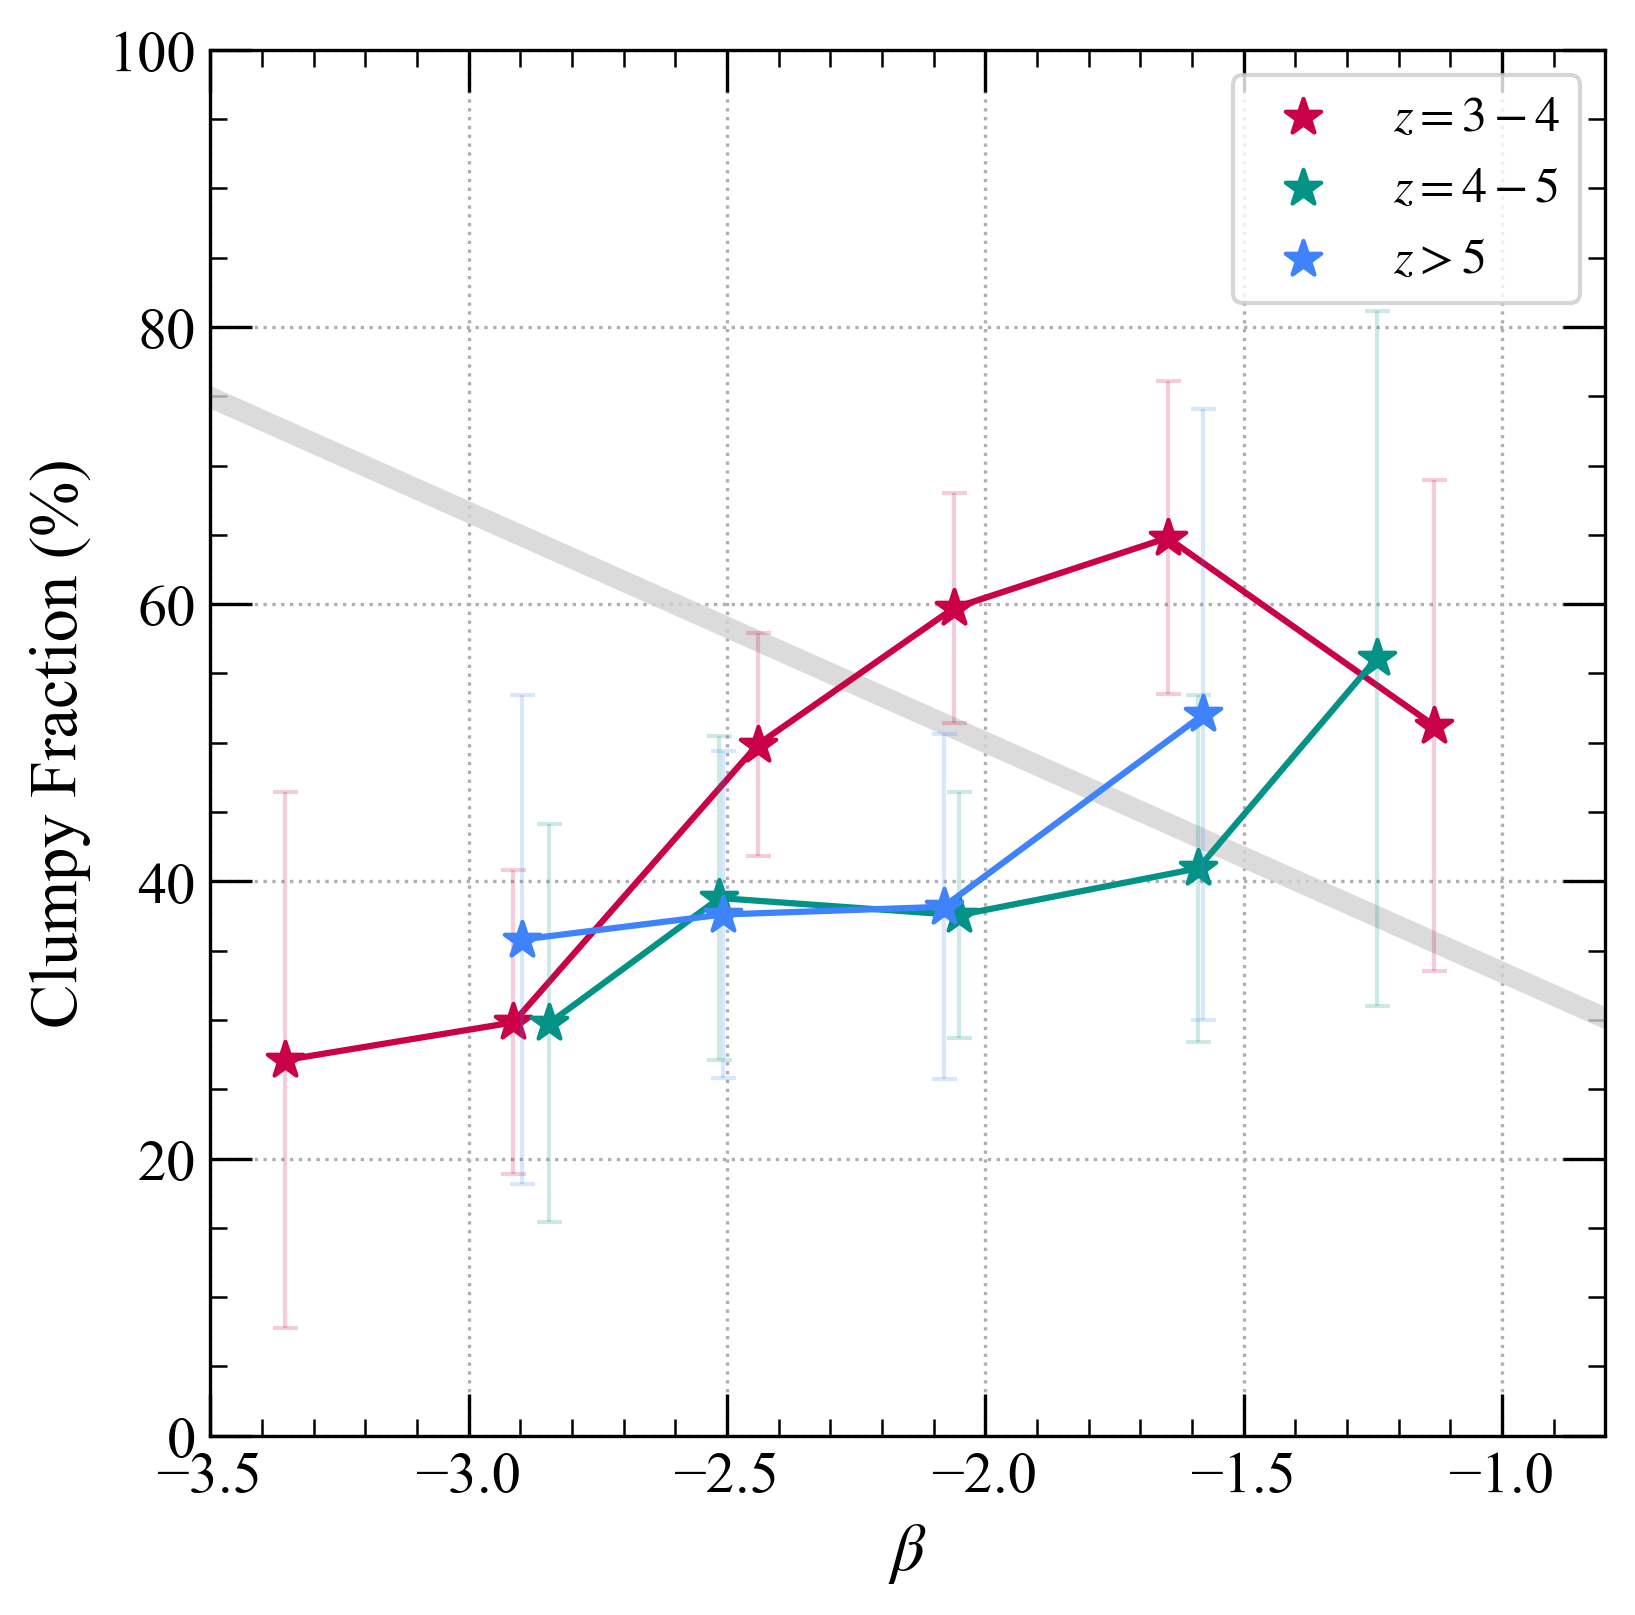

In [52]:
# Function definition

# Number fraction
def fraction(a, b):
    return a/b

# Number fraction error
def fraction_err(a, b):
    a_err = np.sqrt(a)
    b_err = np.sqrt(b)
    return np.sqrt((a_err / b)**2 + (a / b**2 * b_err)**2)

# Number fraction completeness correction
def comp_corr(f, X):
    n = 2
    return f + 1/n * (1/X - 1) * f - 1/n * (1/X - 1) * f**2

# Number fraction completeness correction error
def comp_err(f, X, e_f):
    n = 2
    return e_f * (1 + 1/n * (1/X - 1) - 2/n * (1/X - 1) * f)

# ax1
fig, ax = plt.subplots(figsize=(6,6), dpi=300)

# Binning for redshift and beta slope
zbins = [3, 4, 5, 11]
# beta_bin = np.linspace(min(beta), max(beta), 40)
beta_bin = np.linspace(-5, 0, 12)


# Data
df = pd.read_csv('UV slope.csv')
co = pd.read_csv('comple.csv')
z_sp = df['redshift']
beta = df['beta']
# Counter
w = 0

color = ['xkcd:ruby', 'xkcd:teal', 'xkcd:dodger blue']
label = ['$z=3-4$', '$z=4-5$', '$z>5$']
# Bin the data
for z_bin_l, z_bin_r in zip(zbins, zbins[1:]):
    # Dictionary for counting
    Nclm = {bin: 0 for bin in beta_bin[:-1]}
    Ncom = {bin: 0 for bin in beta_bin[:-1]}
    Ngal = {bin: 0 for bin in beta_bin[:-1]}
    beta_list = {bin: [] for bin in beta_bin[:-1]}  

    for beta_bin_l, beta_bin_r, in zip(beta_bin, beta_bin[1:]):
        
        for i in range(len(z_sp)):
            if z_bin_l <= z_sp[i] < z_bin_r:            
                if beta_bin_l < beta[i] < beta_bin_r:
                    Ngal[beta_bin_l] += 1
                    beta_list[beta_bin_l].append(beta[i])
                    if df['type'][i] == "C":
                        Nclm[beta_bin_l] += 1
                        
                    if co['Mark'][i] == "Y":
                        Ncom[beta_bin_l] += 1

    # Fraction Calculation
    frac_clump = []
    frac_clump_e = []
    beta_med = []
    for bin in beta_bin[:-1]:
        beta_med.append(np.median(beta_list[bin]))
        if Ngal[bin] < 10:
            frac_clump.append(np.NaN)
            frac_clump_e.append(np.NaN)
            
        else:
            frac = fraction(Nclm[bin], Ngal[bin])
            frac_e = fraction_err(Nclm[bin], Ngal[bin])
            comp = fraction(Ncom[bin], Ngal[bin])
            comp_frac = comp_corr(frac, comp)
            comp_frac_e = comp_err(frac, comp, frac_e)
        
            frac_clump.append(comp_frac*100)
            frac_clump_e.append(comp_frac_e*100)

    mask = ~np.isnan(frac_clump)
    frac_clump = np.array(frac_clump)[mask]
    frac_clump_e = np.array(frac_clump_e)[mask]
    beta_med = np.array(beta_med)[mask]
    
    # Plotting data
    ax.scatter(beta_med, frac_clump, s=80, c=color[w], marker='*', label=label[w], zorder=10)
    ax.plot(beta_med, frac_clump, c=color[w], marker='*', zorder=10)
    ax.errorbar(beta_med, frac_clump, yerr=frac_clump_e, c=color[w], alpha=0.2, capsize=3, capthick=1, elinewidth=1, linestyle=' ', zorder=10)
    w += 1
    

y = -16.595 * beta_bin + 16.847
ax.plot(beta_bin, y, c='lightgrey', lw=5, alpha=0.8)

# Customizing
plt.grid(visible=True, linestyle=':')
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel('Clumpy Fraction (%)', fontsize=16)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4)
plt.tick_params(axis='both', which='major', length=10, labelsize=14)
plt.ylim(0, 100)
plt.xlim(-3.5, -0.8)
plt.legend(fontsize=12)
plt.savefig('beta.png', bbox_inches='tight', dpi=300)
plt.show()

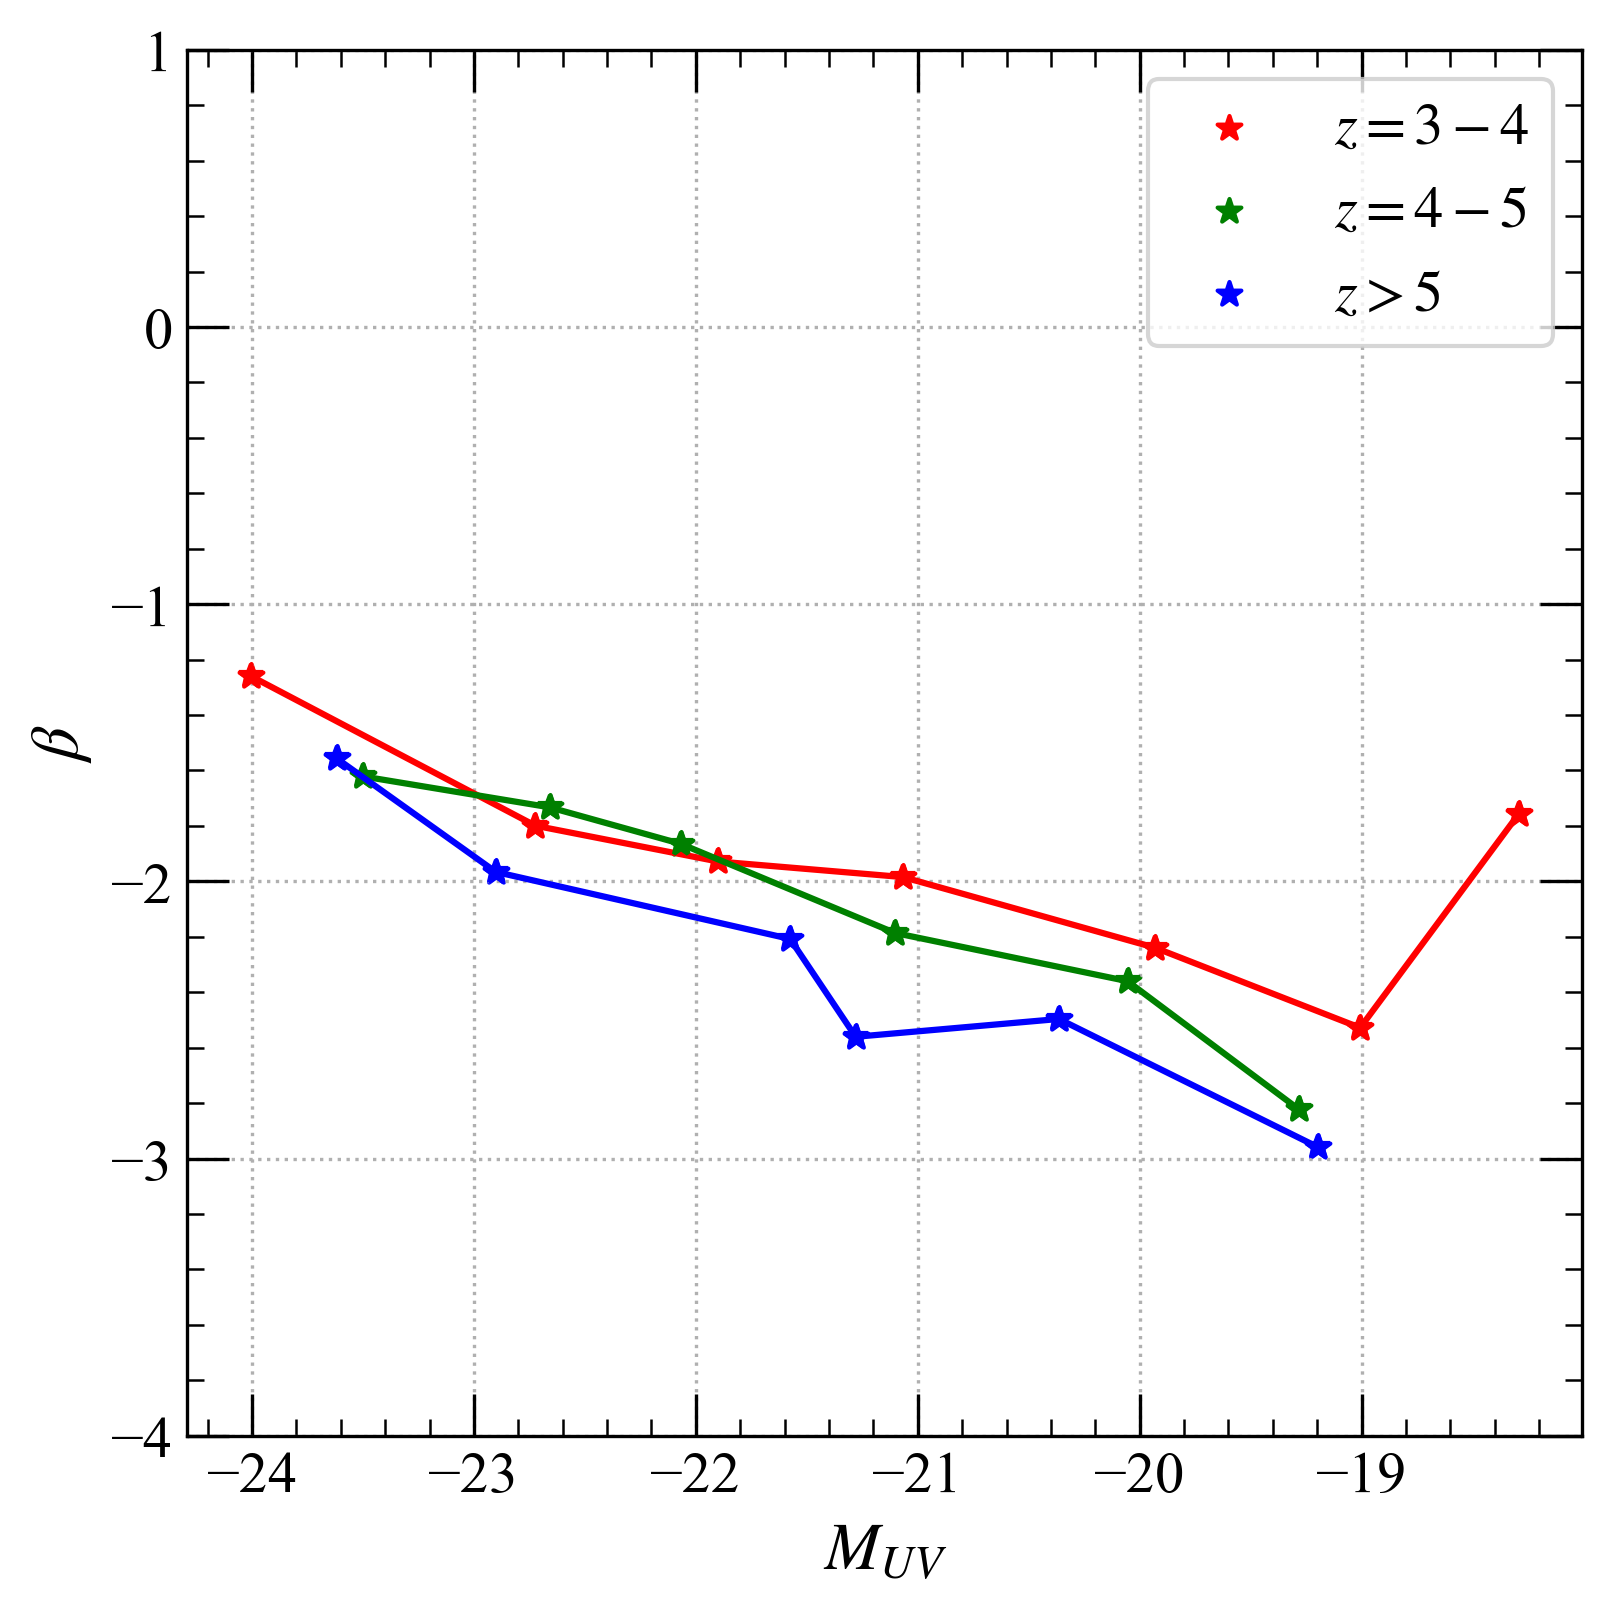

In [260]:
# Function definition
# Number fraction
def fraction(a, b):
    return a/b

# Number fraction error
def fraction_err(a, b):
    a_err = np.sqrt(a)
    b_err = np.sqrt(b)
    return np.sqrt((a_err / b)**2 + (a / b**2 * b_err)**2)

# Number fraction completeness correction
def comp_corr(f, X):
    n = 2
    return f + 1/n * (1/X - 1) * f - 1/n * (1/X - 1) * f**2

# Number fraction completeness correction error
def comp_err(f, X, e_f):
    n = 2
    return e_f * (1 + 1/n * (1/X - 1) - 2/n * (1/X - 1) * f)

# ax1
fig, ax = plt.subplots(figsize=(6,6), dpi=300)

# Binning for redshift and beta slope
zbins = [3, 4, 5, 6]

# Data
df = pd.read_csv('UV slope.csv')
co = pd.read_csv('comple.csv')
z_sp = df['redshift']
beta = df['beta']
beta_e = df['beta_e']
Muv = df['Muv']
Muv_e = df['Muv_e']
Muv_bin = np.histogram_bin_edges(Muv, bins='scott')
Muv_bin = np.histogram_bin_edges(Muv, bins='scott')
Muv_bin = np.linspace(-24.5, -17.5, 8)

# Counter
w = 0

c = ['red', 'green', 'blue']
label = ['$z=3-4$', '$z=4-5$', '$z>5$']
# Bin the data
for z_bin_l, z_bin_r in zip(zbins, zbins[1:]):
    # Dictionary for counting
    beta_clm = {bin: [] for bin in Muv_bin[:-1]}
    Muv_clm = {bin: [] for bin in Muv_bin[:-1]}
    beta_e_c = {bin: [] for bin in Muv_bin[:-1]}
    Muv_e_c = {bin: [] for bin in Muv_bin[:-1]}
    for Muv_bin_l, Muv_bin_r, in zip(Muv_bin, Muv_bin[1:]):
        # A150 position for plotting
        for i in range(len(z_sp)):
            if z_bin_l <= z_sp[i] < z_bin_r:            
                if Muv_bin_l < Muv[i] < Muv_bin_r:
                    if df['type'][i] == "C":
                        beta_clm[Muv_bin_l].append(beta[i])
                        Muv_clm[Muv_bin_l].append(Muv[i])
                        # beta_e_c[Muv_bin_l].append(beta_e[i])
                        # Muv_e_c[Muv_bin_l].append(Muv_e[i])

    beta_med = []
    Muv_med = []  
    beta_err = []
    Muv_err = []
    for Muv_bin_l, Muv_bin_r, in zip(Muv_bin, Muv_bin[1:]):
        if len(beta_clm[Muv_bin_l]) > 0:
            Muv_med.append(np.median(Muv_clm[Muv_bin_l]))
            beta_med.append(np.median(beta_clm[Muv_bin_l]))
            # Muv_err.append(np.sqrt(np.sum(np.array(Muv_e_c[Muv_bin_l])**2)))
            # beta_err.append(np.sqrt(np.sum(np.array(beta_e_c[Muv_bin_l])**2)))

    # Plotting data
    ax.scatter(Muv_med, beta_med, c=c[w], marker='*', label=label[w])
    ax.plot(Muv_med, beta_med, c=c[w], marker='*')
    # ax.errorbar(Muv_med, beta_med, xerr=Muv_err, yerr=beta_err, c='gray', capsize=3, capthick=1, elinewidth=1, linestyle=' ')

    w += 1

# Customizing
plt.grid(visible=True, linestyle=':')
plt.ylabel(r'$\beta$', fontsize=16)
plt.xlabel('$M_{UV}$', fontsize=16)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4)
plt.tick_params(axis='both', which='major', length=10, labelsize=14)
plt.ylim(-4, 1)
plt.legend(fontsize=14)
plt.savefig('overall.png', bbox_inches='tight', dpi=300)
plt.show()

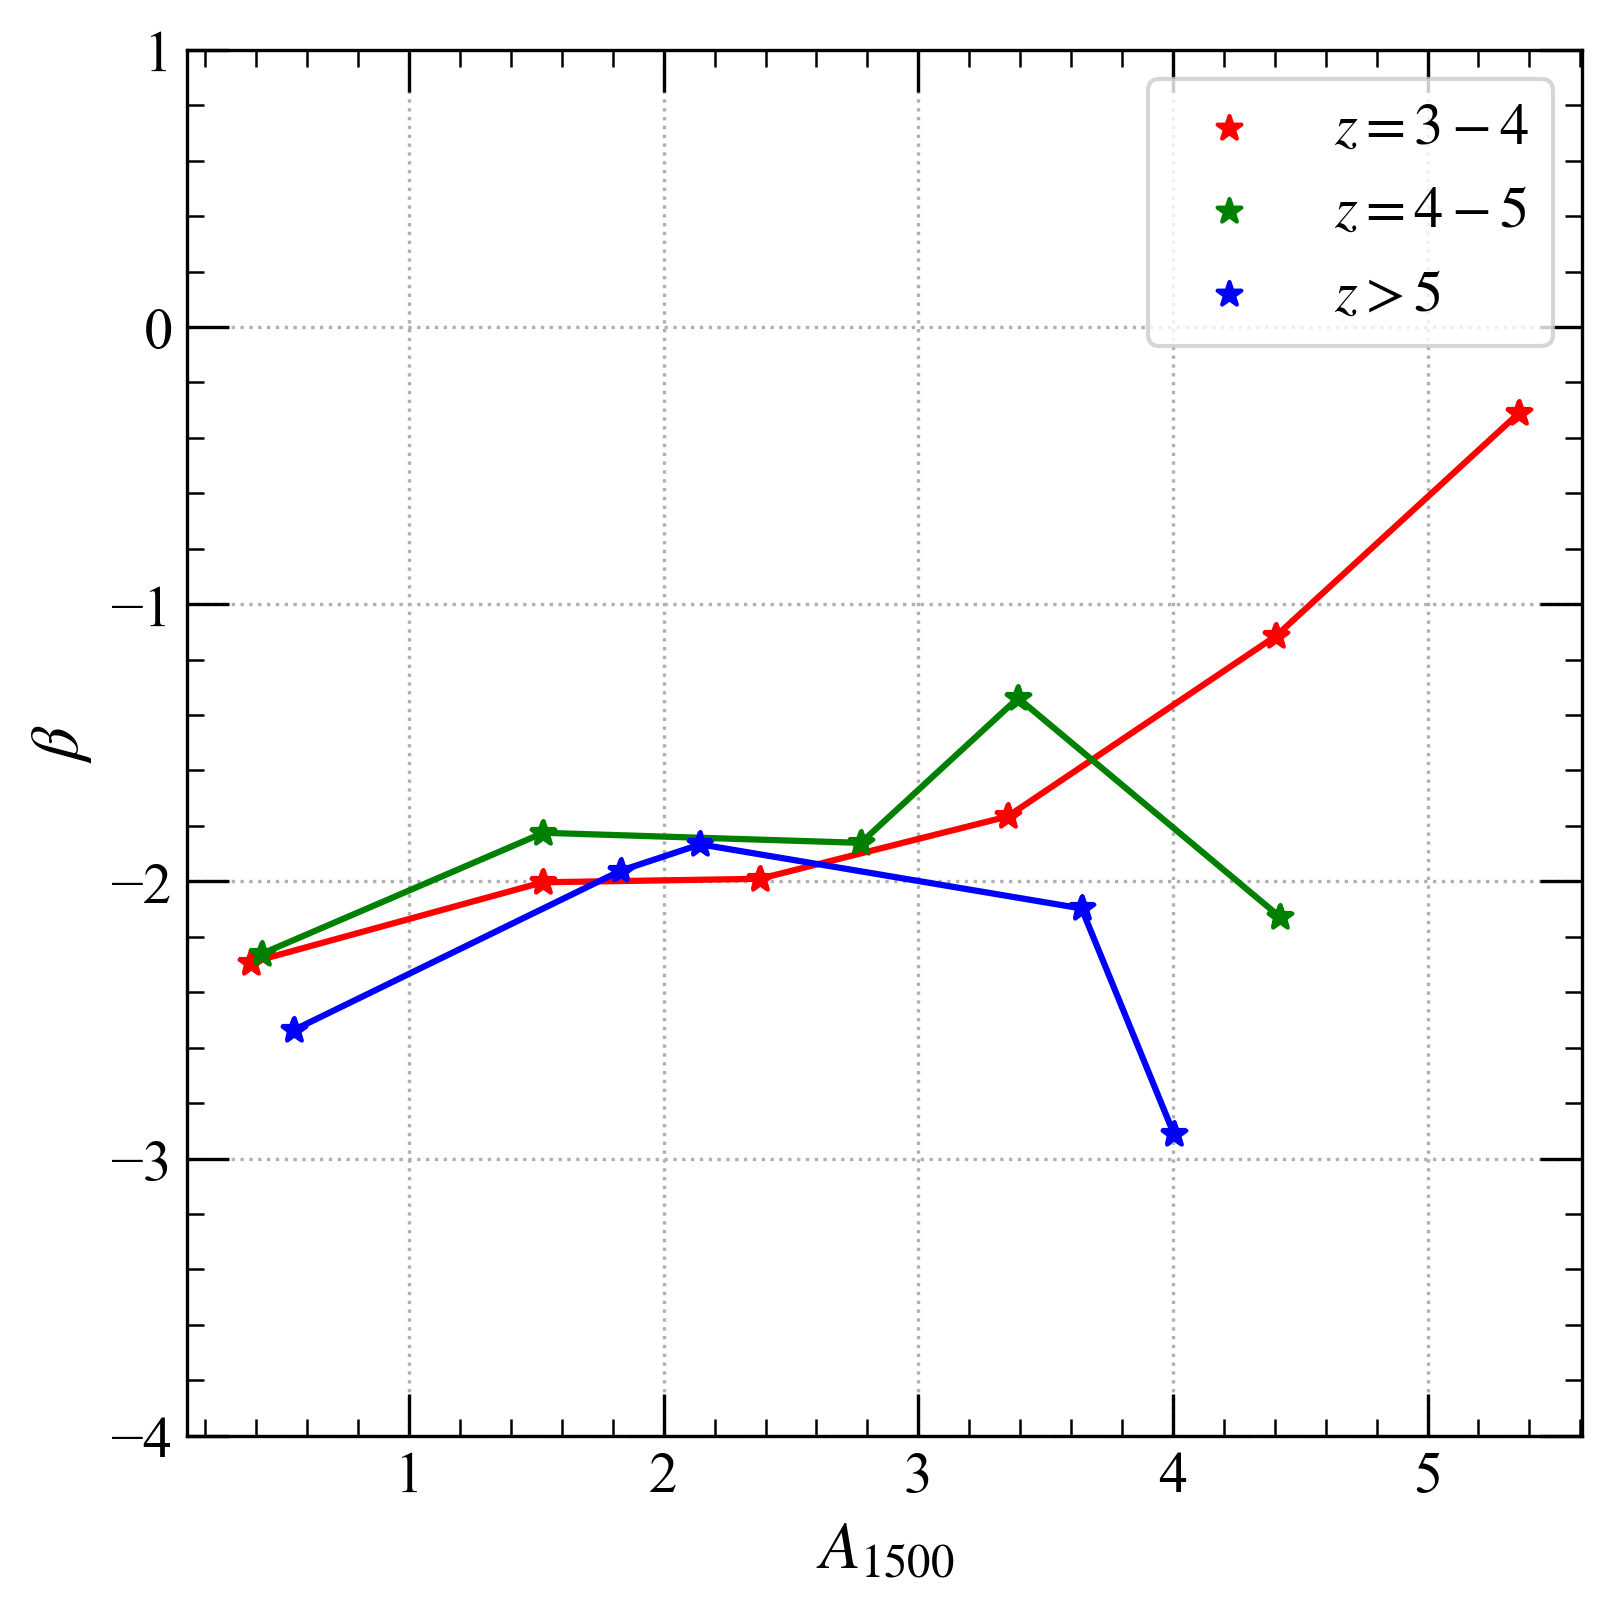

In [246]:
# Function definition
# Number fraction
def fraction(a, b):
    return a/b

# Number fraction error
def fraction_err(a, b):
    a_err = np.sqrt(a)
    b_err = np.sqrt(b)
    return np.sqrt((a_err / b)**2 + (a / b**2 * b_err)**2)

# Number fraction completeness correction
def comp_corr(f, X):
    n = 2
    return f + 1/n * (1/X - 1) * f - 1/n * (1/X - 1) * f**2

# Number fraction completeness correction error
def comp_err(f, X, e_f):
    n = 2
    return e_f * (1 + 1/n * (1/X - 1) - 2/n * (1/X - 1) * f)

# ax1
fig, ax = plt.subplots(figsize=(6,6), dpi=300)

# Binning for redshift and beta slope
zbins = [3, 4, 5, 6]
Abins = np.linspace(0, 6, 7)

# Data
df = pd.read_csv('UV slope.csv')
co = pd.read_csv('comple.csv')
z_sp = df['redshift']
beta = df['beta']
beta_e = df['beta_e']
A150 = df['A150']

# Counter
w = 0

c = ['red', 'green', 'blue']
label = ['$z=3-4$', '$z=4-5$', '$z>5$']
# Bin the data
for z_bin_l, z_bin_r in zip(zbins, zbins[1:]):
    # Dictionary for counting
    beta_clm = {bin: [] for bin in Abins[:-1]}
    A150_clm = {bin: [] for bin in Abins[:-1]}
    beta_e_c = {bin: [] for bin in Abins[:-1]}
    A150_e_c = {bin: [] for bin in Abins[:-1]}
    for Abins_l, Abins_r, in zip(Abins, Abins[1:]):
        # A150 position for plotting
        for i in range(len(z_sp)):
            if z_bin_l <= z_sp[i] < z_bin_r:            
                if Abins_l < A150[i] < Abins_r:
                    if df['type'][i] == "C":
                        beta_clm[Abins_l].append(beta[i])
                        A150_clm[Abins_l].append(A150[i])
                        # beta_e_c[Abins_l].append(beta_e[i])
                        # A150_e_c[Abins_l].append(A150_e[i])

    beta_med = []
    A150_med = []  
    beta_err = []
    A150_err = []
    for Abins_l, Abins_r, in zip(Abins, Abins[1:]):
        if len(beta_clm[Abins_l]) > 0:
            A150_med.append(np.median(A150_clm[Abins_l]))
            beta_med.append(np.median(beta_clm[Abins_l]))
            # A150_err.append(np.sqrt(np.sum(np.array(A150_e_c[Abins_l])**2)))
            # beta_err.append(np.sqrt(np.sum(np.array(beta_e_c[Abins_l])**2)))

    # Plotting data
    ax.scatter(A150_med, beta_med, c=c[w], marker='*', label=label[w])
    ax.plot(A150_med, beta_med, c=c[w], marker='*')
    # ax.errorbar(A150_med, beta_med, xerr=A150_err, yerr=beta_err, c='gray', capsize=3, capthick=1, elinewidth=1, linestyle=' ')

    w += 1

# Customizing
plt.grid(visible=True, linestyle=':')
plt.ylabel(r'$\beta$', fontsize=16)
plt.xlabel('$A_{1500}$', fontsize=16)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4)
plt.tick_params(axis='both', which='major', length=10, labelsize=14)
plt.ylim(-4, 1)
plt.legend(fontsize=14)
plt.savefig('overall.png', bbox_inches='tight', dpi=300)
plt.show()

### Later

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{-25.44566233734835: 1, -24.888122793860077: 0, -24.330583250371806: 3, -23.773043706883534: 1, -23.215504163395263: 14, -22.65796461990699: 36, -22.10042507641872: 62, -21.54288553293045: 58, -20.98534598944218: 49, -20.427806445953905: 38, -19.870266902465637: 43, -19.312727358977366: 43, -18.755187815489094: 30, -18.197648272000823: 14, -17.64010872851255: 5}


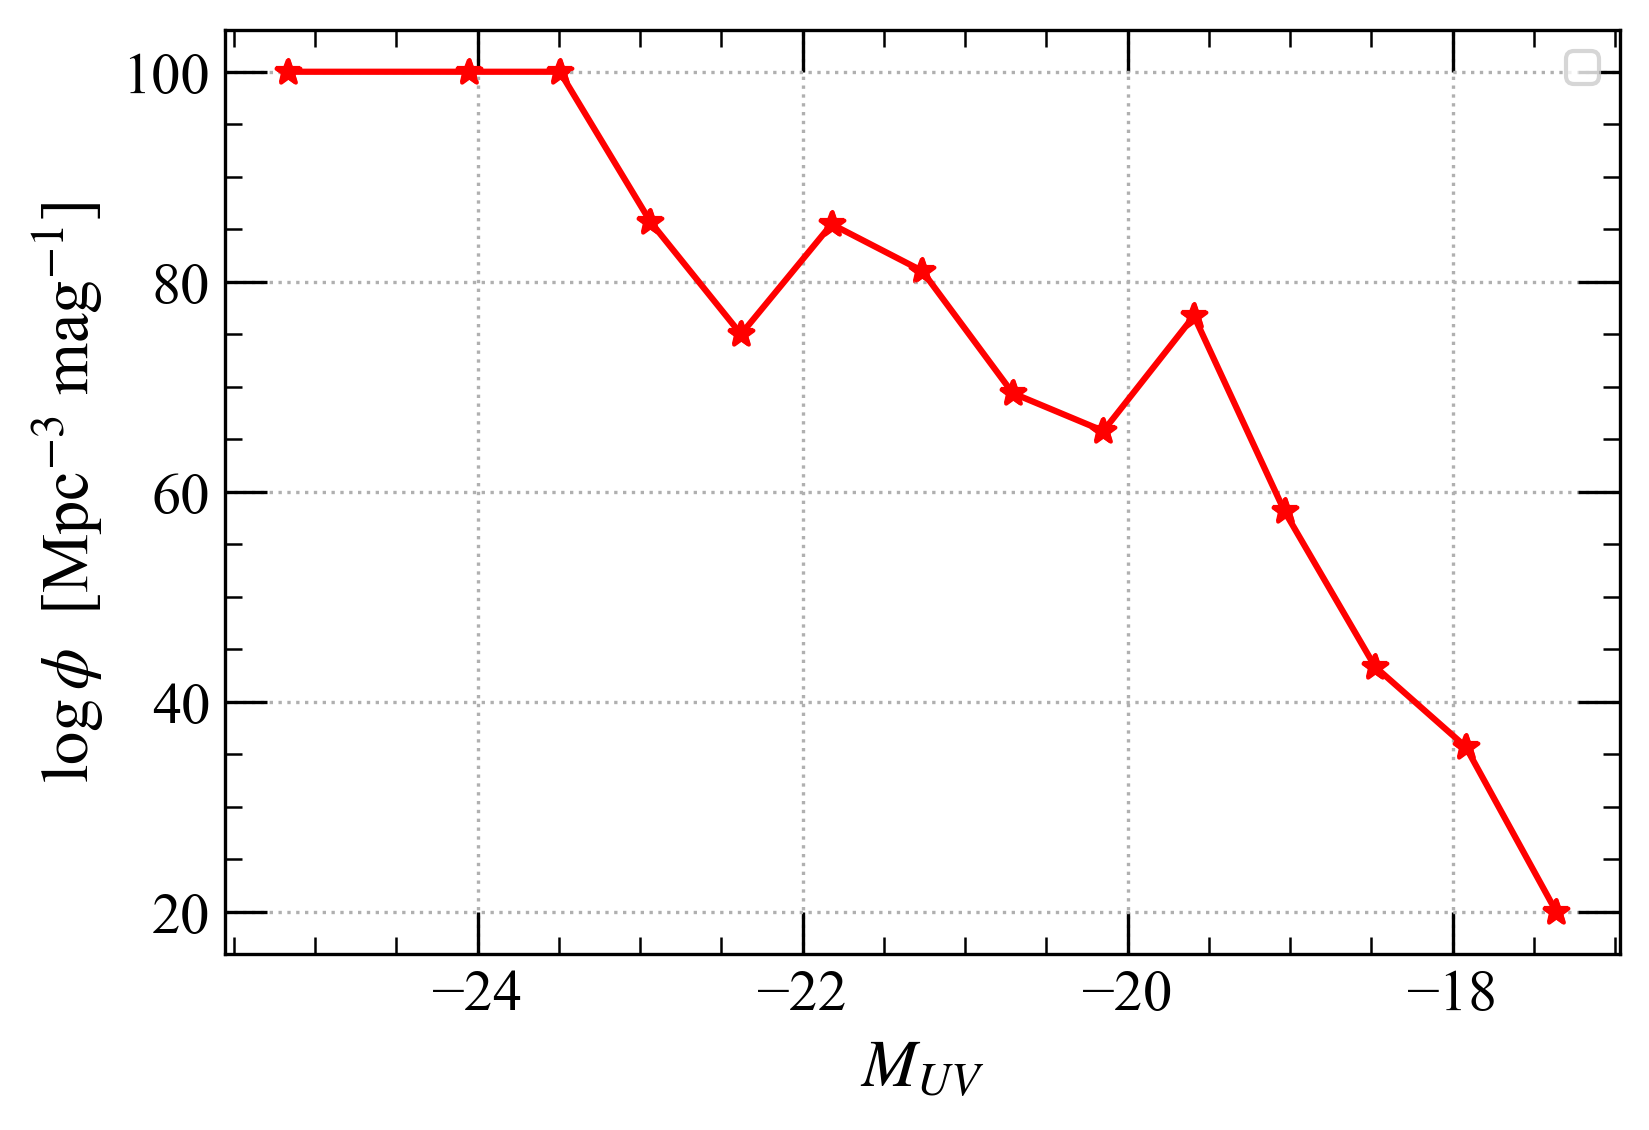

In [50]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# ax1
fig, ax = plt.subplots(figsize=(6,4), dpi=300)

# Binning for redshift and Muv
zbins = [3, 4]

# Data
df = pd.read_csv('UV slope.csv')
co = pd.read_csv('comple.csv')
z_sp = df['redshift']
Muv = df['M_150_corr']
Muv = df['Muv']

Muv_bin = np.linspace(-23.5, -17.5, 8)
Muv_bin = np.histogram_bin_edges(Muv, bins='scott')

# Counter
w = 0

c = ['red', 'green', 'blue']
label = ['$z=3-4$', '$z=4-5$', '$z>5$']

A_sky = np.array([101.52411867,  77.84415067,  66.68487422, 147.48160089]) #arcmin^2
area = np.sum(A_sky * 3600)

# Bin the data
for z_bin_l, z_bin_r in zip(zbins, zbins[1:]):
    # Dictionary for counting
    Ncom = {bin: 0 for bin in Muv_bin[:-1]}
    Ngal = {bin: 0 for bin in Muv_bin[:-1]}
    for Muv_bin_l, Muv_bin_r, in zip(Muv_bin, Muv_bin[1:]):
        for i in range(len(z_sp)):
            if z_bin_l <= z_sp[i] < z_bin_r:            
                if Muv_bin_l < Muv[i] < Muv_bin_r:
                    Ngal[Muv_bin_l] += 1
                    if co['Mark'][i] == 'Y':
                        Ncom[Muv_bin_l] += 1


    # Fraction Calculation
    Muv_med = [] 
    comp_f = []
    for Muv_bin_l, Muv_bin_r in zip(Muv_bin, Muv_bin[1:]):
        if Ncom[Muv_bin_l] > 0:
            # Muv position for plotting
            Muv_med.append(0.5 * (Muv_bin_l + Muv_bin_r))
            comp_f.append(Ncom[Muv_bin_l] / Ngal[Muv_bin_l] * 100)      
            
    # Plotting data
    ax.scatter(Muv_med, comp_f, c=c[w], marker='*')
    ax.plot(Muv_med, comp_f, c=c[w], marker='*')
    #ax.errorbar(Muv_med, rho, yerr=frac_clump_e, c=c[w], alpha=0.5, capsize=3, capthick=1, elinewidth=1, linestyle=' ')
    w += 1
    print(Ngal)

# Customizing
plt.grid(visible=True, linestyle=':')
plt.xlabel(r'$M_{UV}$', fontsize=16)
plt.ylabel('$\log{\phi}$  [Mpc$^{-3}$ mag$^{-1}$]', fontsize=16)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4)
plt.tick_params(axis='both', which='major', length=10, labelsize=14)
#plt.ylim(-5, 100)
plt.legend(fontsize=10)
plt.savefig('overall.png', bbox_inches='tight', dpi=300)
plt.show()

In [136]:
dir_images = ['D:/imaging_data/CEERS/', 'D:/imaging_data/COSMOS-WEB/', 'D:/imaging_data/FRESCO/', 'D:/imaging_data/PRIMER-UDS/']

field_list = ['CEERS', 'COSWEB', 'FRESCO', 'PRIMER']
img_name = {} 
img_name['CEERS'] = 'ceers-full-grizli-v6.0-f115w-clear_drc_sci.fits.gz'
img_name['COSWEB'] = 'cosweb-grizli-v6.0-f115w-clear_drc_sci.fits.gz'
img_name['FRESCO'] = 'gds-grizli-v6.1-f444w-clear_drc_sci.fits.gz'
img_name['PRIMER'] = 'primer-uds-grizli-v6.0-f115w-clear_drc_sci.fits.gz'

# get pixel scale
from piXedfit.piXedfit_images import calc_pixsize

A_pix = []
A_sky = []
for bb in range(len(field_list)):
    hdu = fits.open(dir_images[bb]+img_name[field_list[bb]])
    data_img = hdu[0].data
    data_img = data_img[data_img != 0]
    npixels = len(data_img)
    pixsize = calc_pixsize(dir_images[bb]+img_name[field_list[bb]])
    sky_area = npixels * pixsize ** 2
    A_pix.append(npixels)
    A_sky.append(sky_area)
    hdu.close()

{-23.5: 562.0434749621953, -23.0: 48.18592430678362, -22.5: 6.397550952447538, -22.0: 1.4609469826687995, -21.5: 0.35217464306095897, -21.0: 0.12826093385740625, -20.5: 0.044826238042422535, -20.0: 0.027374012004446065, -19.5: 0.016784057850286423, -19.0: 0.013867155823424808}


C:\Users\Ryo\AppData\Local\Temp\ipykernel_18648\3830643064.py:109: RuntimeWarning: divide by zero encountered in log10
  r =  np.log10(Nclm[Muv_bin_l] / volume / binwidth / comp_f / comp_p[Muv_bin_l])
C:\Users\Ryo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1734: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)


[nan, 0.05950264681787026, 0.04251340463505198, 0.03749729739351473, 0.04278797345929458, 0.04770981358933654, 0.04238943782375534, 0.04105358108896187, 0.07414372897746123, 0.08899998408403027]
0.6666666666666666
0.7142857142857143
0.7837837837837838
0.8275862068965517
0.8431372549019608
0.6829268292682927
0.696969696969697
0.6216216216216216
0.6153846153846154
0.5405405405405406


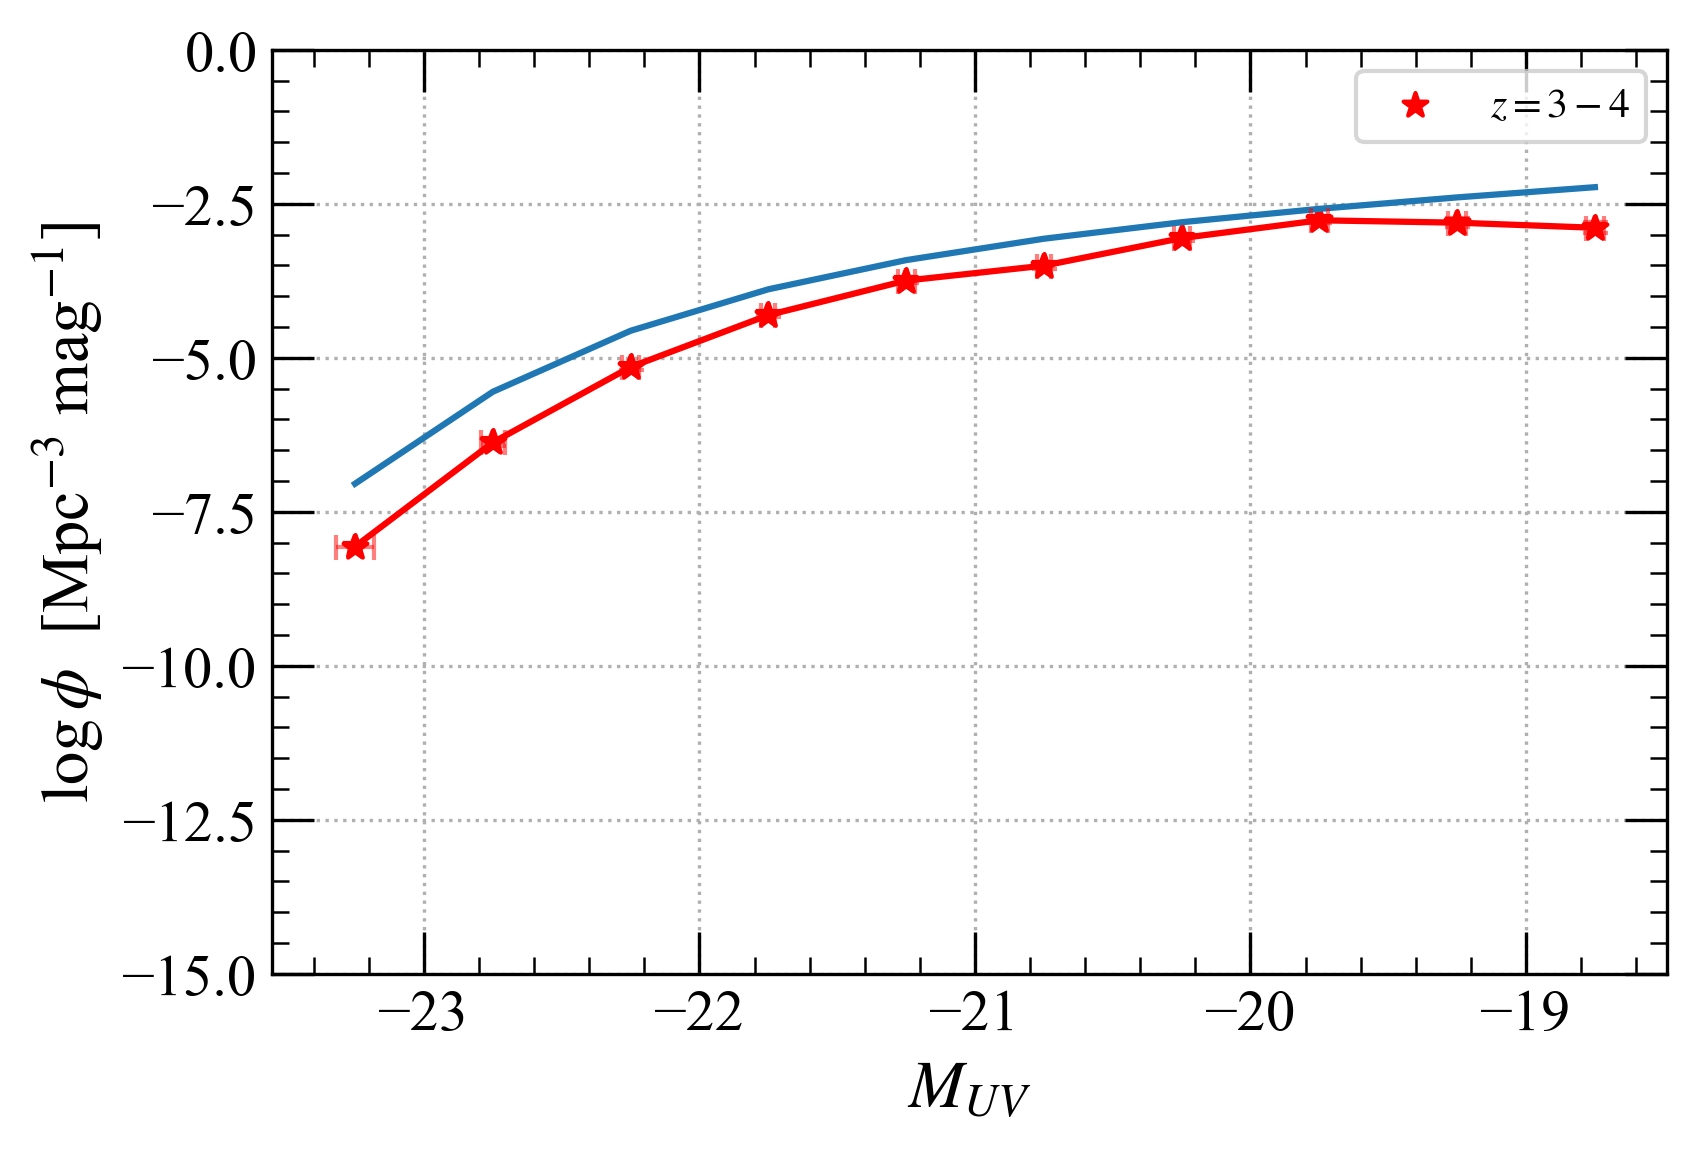

In [13]:
def schechter(M, z):
    phi_ = 0.40e-3 * 10**(-0.33 * (z - 6) + (-0.024 * (z - 6) ** 2))
    M_ = -21.03 + (-0.04 * (z - 6))
    alpha = -1.94 + (-0.11 * (z - 6))
    return 0.4 * np.log(10) * phi_ * (10**(0.4 * (M_ - M)))**(alpha + 1) * np.exp(-10**(0.4 * (M_ - M)))

# ax1
fig, ax = plt.subplots(figsize=(6,4), dpi=300)

# Binning for redshift and Muv
zbins = [3, 4]

# Data
df = pd.read_csv('UV slope.csv')
ef = pd.read_csv('UV slope.csv')
co = pd.read_csv('comple.csv')

z_sp = df['redshift']
Muv = df['Muv']
Muv_e = df['Muv_e']

z_sp0 = df['redshift']
Muv0 = df['Muv']
Muv_e0 = df['Muv_e']

Muv_bin = np.linspace(-23.5, -18.5, 11)
# Muv_bin = np.histogram_bin_edges(Muv, bins='scott')

# Counter
w = 0

c = ['red', 'green', 'blue']
label = ['$z=3-4$', '$z=4-5$', '$z>5$']

A_sky = np.array([101.52411867,  77.84415067,  66.68487422, 147.48160089]) #arcmin^2
area = np.sum(A_sky * 3600)

# Bin the data
for z_bin_l, z_bin_r in zip(zbins, zbins[1:]):
    # Dictionary for counting
    Nclm = {bin: 0 for bin in Muv_bin[:-1]}
    Ncom = {bin: 0 for bin in Muv_bin[:-1]}
    Ngal = {bin: 0 for bin in Muv_bin[:-1]}
    comoving_vol = (area / 4.255E10) / (4 * np.pi) * (cosmo.comoving_volume(z_bin_r) - cosmo.comoving_volume(z_bin_l))
    volume = comoving_vol.value

    z_arr = []

    for Muv_bin_l, Muv_bin_r, in zip(Muv_bin, Muv_bin[1:]):
        for i in range(len(z_sp)):
            if z_bin_l <= z_sp[i] < z_bin_r:
                if Muv_bin_l < Muv[i] < Muv_bin_r:
                    Ngal[Muv_bin_l] += 1
                    z_arr.append(z_sp[i])
                    if co['Mark'][i] == 'Y':
                        Ncom[Muv_bin_l] += 1
                    if df['type'][i] == 'C':
                        Nclm[Muv_bin_l] += 1
                        
    zmed = np.median(z_arr)
    comp_p = {bin: 0 for bin in Muv_bin[:-1]}
    for Muv_bin_l, Muv_bin_r in zip(Muv_bin, Muv_bin[1:]):
        binwidth = Muv_bin_r - Muv_bin_l
        rho_p = Ngal[Muv_bin_l] / volume / binwidth
        comp_p[Muv_bin_l] = rho_p / schechter(Muv_bin_l, zmed) 

    Muv_std = []
    rho_std = []
    Muv_ar = {bin: [] for bin in Muv_bin[:-1]}
    rho_ar = {bin: [] for bin in Muv_bin[:-1]}
    
    for j in range(0, 100):
        # Dictionary for counting
        Nclm = {bin: 0 for bin in Muv_bin[:-1]}
        Ncom = {bin: 0 for bin in Muv_bin[:-1]}
        Ngal = {bin: 0 for bin in Muv_bin[:-1]}
        comoving_vol = (area / 4.255E10) / (4 * np.pi) * (cosmo.comoving_volume(z_bin_r) - cosmo.comoving_volume(z_bin_l))
        volume = comoving_vol.value    
        
        Muv_list = {bin: [] for bin in Muv_bin[:-1]}
        for Muv_bin_l, Muv_bin_r, in zip(Muv_bin, Muv_bin[1:]):
            for i in range(len(z_sp)):
                if z_bin_l <= z_sp[i] < z_bin_r:   
                    Muv_ran = np.random.normal(loc=Muv[i], scale=Muv_e[i])
                    if Muv_bin_l < Muv_ran < Muv_bin_r:
                        Ngal[Muv_bin_l] += 1
                        Muv_list[Muv_bin_l].append(Muv_ran)
                        if co['Mark'][i] == 'Y':
                            Ncom[Muv_bin_l] += 1
                        if df['type'][i] == 'C':
                            Nclm[Muv_bin_l] += 1
               
        # Muv_med0 = []  
        # rho0 = []
        for Muv_bin_l, Muv_bin_r in zip(Muv_bin, Muv_bin[1:]):
            if Ngal[Muv_bin_l] == 0:
                a = np.NaN
                r = np.NaN
                # rho0.append(r)
                # Muv_med0.append(a)
                
            else:
                a = np.median(Muv_list[Muv_bin_l])
                # Muv_med0.append(a)
                binwidth = Muv_bin_r - Muv_bin_l
                comp_f = Ncom[Muv_bin_l] / Ngal[Muv_bin_l]      
                r =  np.log10(Nclm[Muv_bin_l] / volume / binwidth / comp_f / comp_p[Muv_bin_l])
                # rho0.append(r)

            Muv_ar[Muv_bin_l].append(a)
            rho_ar[Muv_bin_l].append(r)
    
    for bin in Muv_bin[:-1]:
        Muv_std.append(np.nanstd(Muv_ar[bin]))
        rho_std.append(np.nanstd(rho_ar[bin]))
    
    # Fraction Calculation
    Muv_med = []  
    rho = []
    for Muv_bin_l, Muv_bin_r in zip(Muv_bin, Muv_bin[1:]):
        if Ngal[Muv_bin_l] == 0:
            rho.append(np.NaN)
            Muv_med.append(np.NaN)
        else:
            # Muv position for plotting
            Muv_med.append(0.5 * (Muv_bin_l + Muv_bin_r))
            binwidth = Muv_bin_r - Muv_bin_l
            comp_f = Ncom[Muv_bin_l] / Ngal[Muv_bin_l]   
            rho_temp = Nclm[Muv_bin_l] / volume / binwidth / comp_f / comp_p[Muv_bin_l]
            rho.append(rho_temp)
            
    mask = ~np.isnan(rho)
    rho = np.array(rho)[mask]    
    Muv_med = np.array(Muv_med)[mask]
    rho_std = np.array(rho_std)[mask]
    Muv_std = np.array(Muv_std)[mask]

    # Plotting data
    ax.scatter(Muv_med, np.log10(rho), c=c[w], marker='*', label=label[w])
    ax.plot(Muv_med, np.log10(rho), c=c[w], marker='*')
    ax.plot(Muv_med, np.log10(schechter(Muv_med, zmed)))
    ax.errorbar(Muv_med, np.log10(rho), xerr=Muv_std, yerr=rho_std, c=c[w], alpha=0.5, capsize=3, capthick=1, elinewidth=1, linestyle=' ')
    w += 1

# Customizing
plt.grid(visible=True, linestyle=':')
plt.xlabel(r'$M_{UV}$', fontsize=16)
plt.ylabel('$\log{\phi}$  [Mpc$^{-3}$ mag$^{-1}$]', fontsize=16)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4)
plt.tick_params(axis='both', which='major', length=10, labelsize=14)
# plt.yscale('log')
plt.ylim(-15, 0)
plt.legend(fontsize=10)
plt.savefig('overall.png', bbox_inches='tight', dpi=300)
plt.show()

(array([ 1.,  5.,  9., 15., 18., 27., 14.,  8.,  1.,  2.]),
 array([5.47198098e-09, 6.01087340e-09, 6.54976581e-09, 7.08865822e-09,
        7.62755064e-09, 8.16644305e-09, 8.70533546e-09, 9.24422788e-09,
        9.78312029e-09, 1.03220127e-08, 1.08609051e-08]),
 <BarContainer object of 10 artists>)

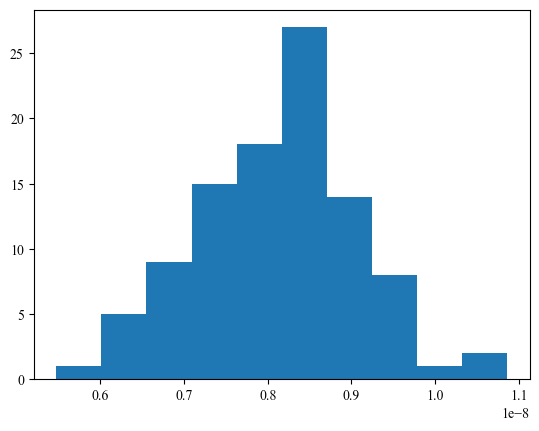

In [242]:
plt.hist([9.028768624647001e-09, 8.523662687603814e-09, 8.523662687603814e-09, 6.019179083098001e-09, 6.648456896330974e-09, 9.091906866777402e-09, 7.275247445480023e-09, 6.019179083098001e-09, 7.202494971025222e-09, 1.0860905115038033e-08, 7.1135752800249095e-09, 1.0320317077637949e-08, 8.970140256954489e-09, 7.834881864363103e-09, 9.091906866777402e-09, 9.717651945034028e-09, 9.717651945034028e-09, 8.442484947721872e-09, 7.576589055647835e-09, 7.181975042332844e-09, 8.334247961212618e-09, 6.566377181561456e-09, 8.394516283246181e-09, 9.376028956364194e-09, 8.20797147695182e-09, 7.275247445480023e-09, 6.566377181561456e-09, 7.1135752800249095e-09, 6.094418821636726e-09, 8.464470585606564e-09, 7.555064654921561e-09, 7.955418508430226e-09, 7.813357463636828e-09, 8.855138458788406e-09, 9.717651945034028e-09, 7.834881864363103e-09, 8.20797147695182e-09, 7.694973259642331e-09, 7.694973259642331e-09, 9.091906866777402e-09, 8.523662687603814e-09, 7.694973259642331e-09, 8.464470585606564e-09, 7.275247445480023e-09, 9.695666307149338e-09, 6.566377181561456e-09, 8.20797147695182e-09, 1.0388213900517149e-08, 7.834881864363103e-09, 8.442484947721872e-09, 7.181975042332844e-09, 6.925475933678097e-09, 8.334247961212618e-09, 7.75653304571947e-09, 7.834881864363103e-09, 8.464470585606564e-09, 8.464470585606564e-09, 6.402217752022419e-09, 9.028768624647001e-09, 8.864609195107966e-09, 8.464470585606564e-09, 6.54772270093202e-09, 7.900172546566128e-09, 9.660151045950988e-09, 8.464470585606564e-09, 7.275247445480023e-09, 7.051393677926791e-09, 7.275247445480023e-09, 7.335874507525689e-09, 8.442484947721872e-09, 9.717651945034028e-09, 7.834881864363103e-09, 8.222628568874948e-09, 7.834881864363103e-09, 9.06980848203176e-09, 8.464470585606564e-09, 7.834881864363103e-09, 6.566377181561456e-09, 8.464470585606564e-09, 9.091906866777402e-09, 7.75653304571947e-09, 8.523662687603814e-09, 9.660151045950988e-09, 7.576589055647835e-09, 7.75653304571947e-09, 8.95415070212926e-09, 8.464470585606564e-09, 5.471980984634546e-09, 8.464470585606564e-09, 7.275247445480023e-09, 8.523662687603814e-09, 9.091906866777402e-09, 8.20797147695182e-09, 7.834881864363103e-09, 8.95415070212926e-09, 9.091906866777402e-09, 8.222628568874948e-09, 6.715613026596945e-09, 6.894696040639528e-09, 7.900172546566128e-09])

C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\2215348122.py:151: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(Muv_med, np.log10(rho), c=c[w], marker='*', label=label[w])
C:\Users\Ryo\AppData\Local\Temp\ipykernel_16088\2215348122.py:152: RuntimeWarning: divide by zero encountered in log10
  ax.plot(Muv_med, np.log10(rho), c=c[w], marker='*')


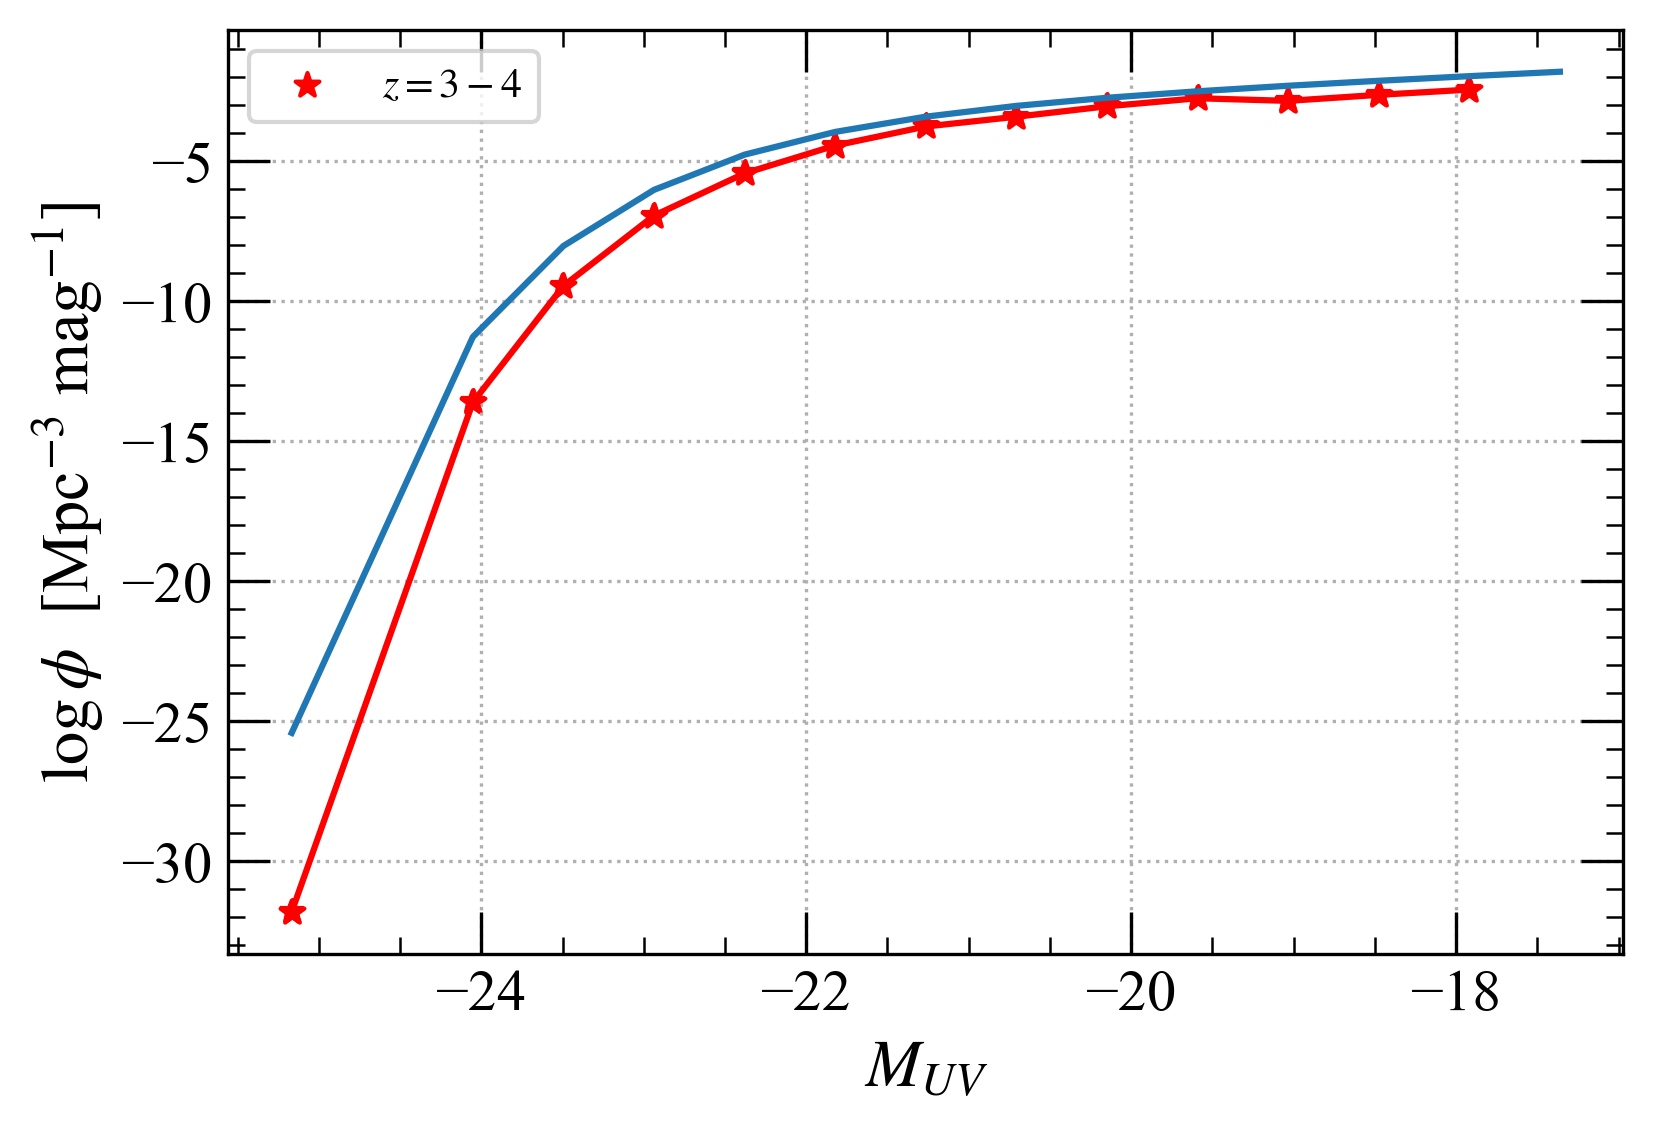

In [161]:
def schechter(M, z):
    phi_ = 0.40e-3 * 10**(-0.33 * (z - 6) + (-0.024 * (z - 6) ** 2))
    M_ = -21.03 + (-0.04 * (z - 6))
    alpha = -1.94 + (-0.11 * (z - 6))
    return 0.4 * np.log(10) * phi_ * (10**(0.4 * (M_ - M)))**(alpha + 1) * np.exp(-10**(0.4 * (M_ - M)))

# ax1
fig, ax = plt.subplots(figsize=(6,4), dpi=300)

# Binning for redshift and Muv
zbins = [3, 4]

# Data
df = pd.read_csv('UV slope.csv')
ef = pd.read_csv('UV slope.csv')
co = pd.read_csv('comple.csv')

z_sp = df['redshift']
Muv = df['Muv']
Muv_e = df['Muv_e']

z_sp0 = df['redshift']
Muv0 = df['Muv']
Muv_e0 = df['Muv_e']

#Muv_bin = np.linspace(-23.5, -17.5, 8)
Muv_bin = np.histogram_bin_edges(Muv, bins='scott')

# Counter
w = 0

c = ['red', 'green', 'blue']
label = ['$z=3-4$', '$z=4-5$', '$z>5$']

A_sky = np.array([101.52411867,  77.84415067,  66.68487422, 147.48160089]) #arcmin^2
area = np.sum(A_sky * 3600)

# Bin the data
for z_bin_l, z_bin_r in zip(zbins, zbins[1:]):
    # Dictionary for counting
    Nclm = {bin: 0 for bin in Muv_bin[:-1]}
    Ncom = {bin: 0 for bin in Muv_bin[:-1]}
    Ngal = {bin: 0 for bin in Muv_bin[:-1]}
    Nful = {bin: 0 for bin in Muv_bin[:-1]}
    comoving_vol = (area / 4.255E10) / (4 * np.pi) * (cosmo.comoving_volume(z_bin_r) - cosmo.comoving_volume(z_bin_l))
    volume = comoving_vol.value

    z_arr = []

    for Muv_bin_l, Muv_bin_r, in zip(Muv_bin, Muv_bin[1:]):
        for i in range(len(z_sp)):
            if z_bin_l <= z_sp[i] < z_bin_r:
                if Muv_bin_l < Muv[i] < Muv_bin_r:
                    Ngal[Muv_bin_l] += 1
                    z_arr.append(z_sp[i])
                    if co['Mark'][i] == 'Y':
                        Ncom[Muv_bin_l] += 1
                    if df['type'][i] == 'C':
                        Nclm[Muv_bin_l] += 1

    z_arr0 = []
    for Muv_bin_l, Muv_bin_r, in zip(Muv_bin, Muv_bin[1:]):
        for i in range(len(z_sp0)):
            if z_bin_l <= z_sp0[i] < z_bin_r:
                if Muv_bin_l < Muv0[i] < Muv_bin_r:
                    Nful[Muv_bin_l] += 1
                    z_arr0.append(z_sp0[i])
                    
    zmed0 = np.median(z_arr0)
    comp_fp = {bin: 0 for bin in Muv_bin[:-1]}
    for Muv_bin_l, Muv_bin_r in zip(Muv_bin, Muv_bin[1:]):
        binwidth = Muv_bin_r - Muv_bin_l
        rho_p = Nful[Muv_bin_l] / volume / binwidth
        comp_p[Muv_bin_l] = rho_p / schechter(Muv_bin_l, zmed)
                    
    # Fraction Calculation
    Muv_med = []  
    rho = []
    for Muv_bin_l, Muv_bin_r in zip(Muv_bin, Muv_bin[1:]):
        if Ngal[Muv_bin_l] == 0:
            rho.append(np.NaN)
            Muv_med.append(np.NaN)
        else:
            # Muv position for plotting
            Muv_med.append(0.5 * (Muv_bin_l + Muv_bin_r))
            binwidth = Muv_bin_r - Muv_bin_l
            comp_f = Ncom[Muv_bin_l] / Ngal[Muv_bin_l]   
            rho_temp = Nclm[Muv_bin_l] / volume / binwidth / comp_f / comp_p[Muv_bin_l]

            rho.append(rho_temp)            

            
    # Muv_std = []
    # rho_std = []
    # Muv_ar = {bin: [] for bin in Muv_bin[:-1]}
    # rho_ar = {bin: [] for bin in Muv_bin[:-1]}
    
    # for j in range(0, 100):
    #     # Dictionary for counting
    #     Nclm = {bin: 0 for bin in Muv_bin[:-1]}
    #     Ncom = {bin: 0 for bin in Muv_bin[:-1]}
    #     Ngal = {bin: 0 for bin in Muv_bin[:-1]}
    #     comoving_vol = (area / 4.255E10) / (4 * np.pi) * (cosmo.comoving_volume(z_bin_r) - cosmo.comoving_volume(z_bin_l))
    #     volume = comoving_vol.value    
        
    #     Muv_list = {bin: [] for bin in Muv_bin[:-1]}
    #     for Muv_bin_l, Muv_bin_r, in zip(Muv_bin, Muv_bin[1:]):
    #         for i in range(len(z_sp)):
    #             if z_bin_l <= z_sp[i] < z_bin_r:   
    #                 Muv_ran = np.random.normal(loc=Muv[i], scale=Muv_e[i])
    #                 if Muv_bin_l < Muv_ran < Muv_bin_r:
    #                     Ngal[Muv_bin_l] += 1
    #                     Muv_list[Muv_bin_l].append(Muv_ran)
    #                     if co['Mark'][i] == 'Y':
    #                         Ncom[Muv_bin_l] += 1
    #                     if df['type'][i] == 'C':
    #                         Nclm[Muv_bin_l] += 1
               
    #     Muv_med = []  
    #     rho = []
    #     for Muv_bin_l, Muv_bin_r in zip(Muv_bin, Muv_bin[1:]):
    #         if Ngal[Muv_bin_l] == 0:
    #             a = np.NaN
    #             r = np.NaN
    #             rho.append(r)
    #             Muv_med.append(a)
                
    #         else:
    #             a = np.median(Muv_list[Muv_bin_l])
    #             Muv_med.append(a)
    #             binwidth = Muv_bin_r - Muv_bin_l
    #             rho_temp = Nclm[Muv_bin_l] / volume / binwidth
    #             comp_f = Ncom[Muv_bin_l] / Ngal[Muv_bin_l]      
    #             r = rho_temp / comp_f
    #             rho.append(r)
    
    #         Muv_ar[Muv_bin_l].append(a)
    #         rho_ar[Muv_bin_l].append(r)
        
    # for bin in Muv_bin[:-1]:
    #     Muv_std.append(np.nanstd(Muv_ar[bin]))
    #     rho_std.append(np.nanstd(rho_ar[bin]))

    mask = ~np.isnan(rho)
    rho = np.array(rho)[mask]    
    Muv_med = np.array(Muv_med)[mask]
    # rho_std = np.array(rho_std)[mask]
    # Muv_std = np.array(Muv_std)[mask]

    # Plotting data
    ax.scatter(Muv_med, np.log10(rho), c=c[w], marker='*', label=label[w])
    ax.plot(Muv_med, np.log10(rho), c=c[w], marker='*')
    ax.plot(Muv_med, np.log10(schechter(Muv_med, zmed)))
    #ax.errorbar(Muv_med, rho, xerr=Muv_std, yerr=rho_std, c=c[w], alpha=0.5, capsize=3, capthick=1, elinewidth=1, linestyle=' ')
    w += 1

# Customizing
plt.grid(visible=True, linestyle=':')
plt.xlabel(r'$M_{UV}$', fontsize=16)
plt.ylabel('$\log{\phi}$  [Mpc$^{-3}$ mag$^{-1}$]', fontsize=16)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4)
plt.tick_params(axis='both', which='major', length=10, labelsize=14)
#plt.ylim(-5, 100)
plt.legend(fontsize=10)
plt.savefig('overall.png', bbox_inches='tight', dpi=300)
plt.show()

KeyError: 7.0154437133377385

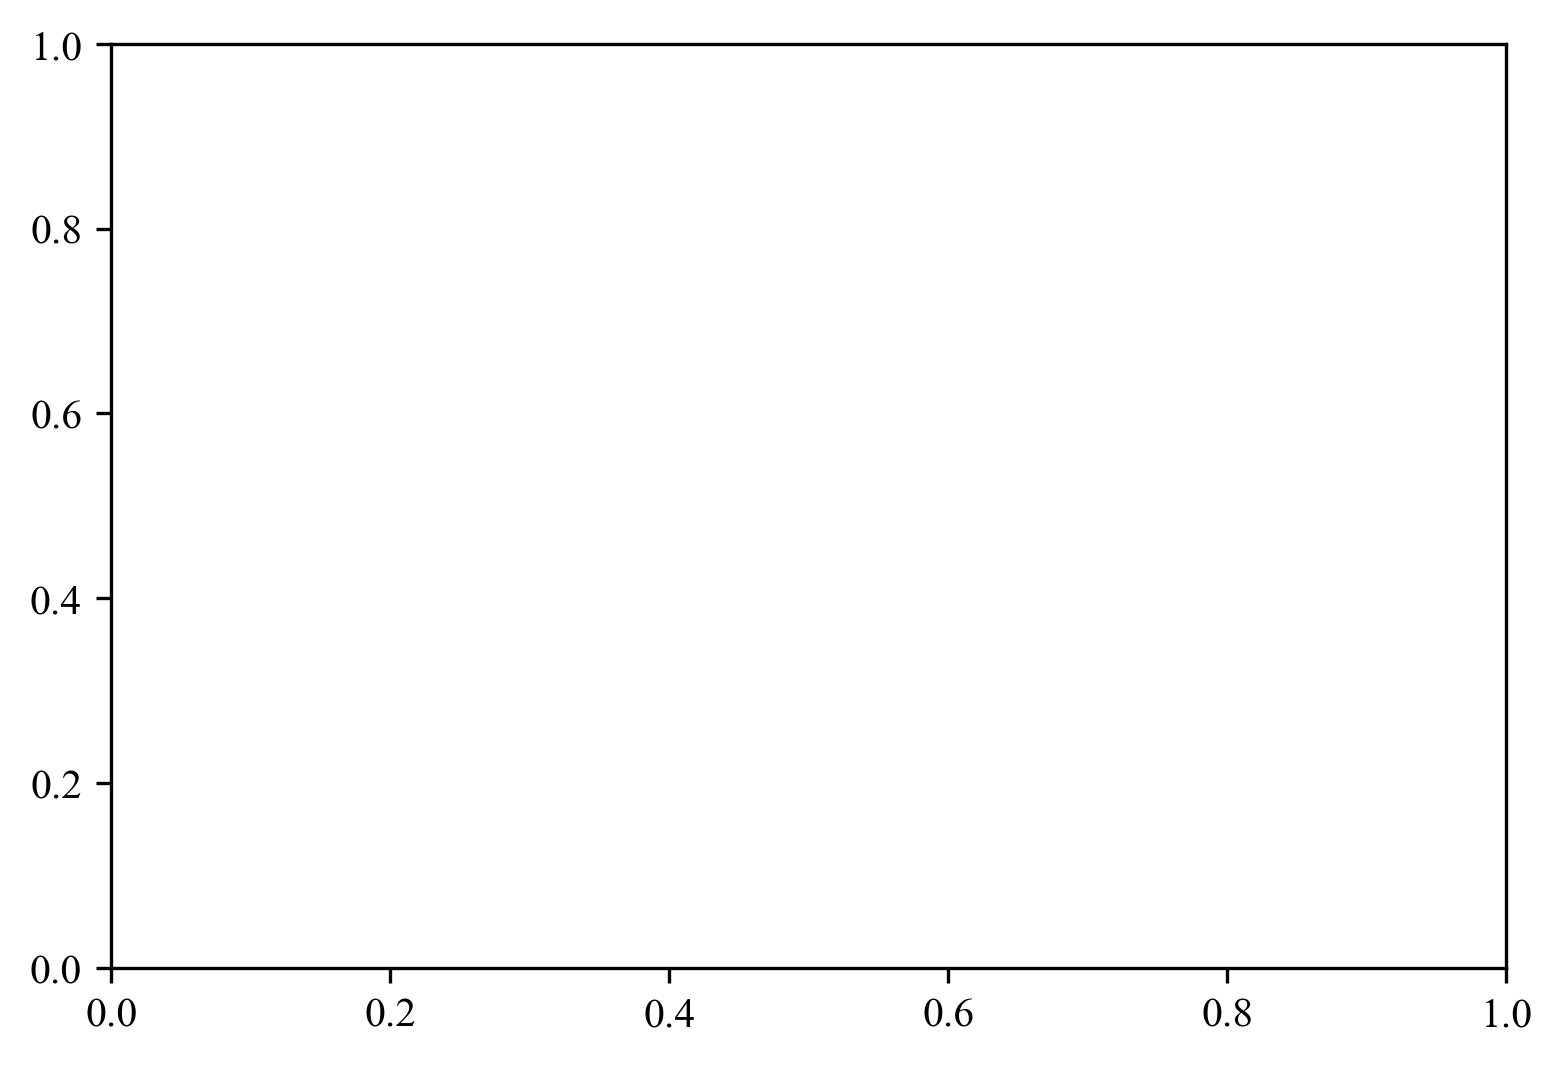

In [125]:
# Figure
fig, ax = plt.subplots(figsize=(6,4), dpi=300)

# Binning for redshift and Muv
zbins = [3, 3.5]
M_bin = np.linspace(7, 12, 11)

# Data
df = pd.read_csv('UV slope.csv')
df = df[df['type'] == 'C'].reset_index()
co = pd.read_csv('comple.csv')
z_sp = X['z_sp']
Ms = X['log_SM']
M_bin = np.histogram_bin_edges(Ms, bins='scott')
# Counter
w = 0

c = ['red', 'green', 'blue']
label = ['$z=3-4$', '$z=4-5$', '$z>5$']

A_sky = np.array([101.52411867,  77.84415067,  66.68487422, 147.48160089]) #arcmin^2
area = np.sum(A_sky * 3600)

# Bin the data
for z_bin_l, z_bin_r in zip(zbins, zbins[1:]):
    # Dictionary for counting
    Nclm = {bin: 0 for bin in M_bin[:-1]}
    comoving_vol = (area / 4.255E10) / (4 * np.pi) * (cosmo.comoving_volume(z_bin_r) - cosmo.comoving_volume(z_bin_l))
    volume = comoving_vol.value

    for M_bin_l, M_bin_r in zip(M_bin, M_bin[1:]):
        for i in range(len(z_sp)):
            if z_bin_l <= z_sp[i] < z_bin_r:            
                if M_bin_l < M[i] < M_bin_r:
                    Nclm[M_bin_l] += 1

    # Fraction Calculation
    M_med = []  
    rho = []
    for M_bin_l, M_bin_r, in zip(M_bin, M_bin[1:]):
        if Nclm[M_bin_l] > 0:
            # M position for plotting
            M_med.append(0.5 * (M_bin_l + M_bin_r))
            binwidth = M_bin_r - M_bin_l
            rho_temp = Nclm[M_bin_l] / volume / binwidth
            comp_f = Ncom[M_bin_l] / Ngal[M_bin_l]      
            rho.append(rho_temp / comp_f)   

    mask = ~np.isnan(rho)
    rho = np.array(rho)[mask]
    M_med = np.array(M_med)[mask]
    
    # Plotting data
    ax.scatter(M_med, np.log10(rho), c=c[w], marker='*', label=label[w])
    ax.plot(M_med, np.log10(rho), c=c[w], marker='*')
    #ax.errorbar(Muv_med, rho, yerr=frac_clump_e, c=c[w], alpha=0.5, capsize=3, capthick=1, elinewidth=1, linestyle=' ')
    w += 1

# Customizing
plt.grid(visible=True, linestyle=':')
plt.xlabel(r'$\log(M/M_{\odot})$', fontsize=16)
plt.ylabel('$\log{\phi}$  [Mpc$^{-3}$ mag$^{-1}$]', fontsize=16)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on", length=4)
plt.tick_params(axis='both', which='major', length=10, labelsize=14)
plt.legend(fontsize=10)
plt.savefig('overall.png', bbox_inches='tight', dpi=300)
plt.show()

In [41]:
def SFRDeq(z):
    return np.log10(0.015 * ((1 + z)**2.7 / (1 + ((1+z) / 2.9)**5.6)))
    
A_sky = np.array([101.52411867,  77.84415067,  66.68487422, 147.48160089]) #arcmin^2

area = np.sum(A_sky * 3600)
z_bins = [3, 3.5, 4, 5, 6, 11]

# Initialize counters for each bin
SFR_C = {bin: 0 for bin in z_bins[:-1]}
SFR_T = {bin: 0 for bin in z_bins[:-1]}
Vol = {bin: 0 for bin in z_bins[:-1]}

co = pd.read_csv('comple.csv')
Ncom = {bin: 0 for bin in z_bins[:-1]}
Ngal = {bin: 0 for bin in z_bins[:-1]}

# Bin the data
zmed = {bin: 0 for bin in z_bins[:-1]}
for z_bin_l, z_bin_r in zip(z_bins, z_bins[1:]):
    z_arr = []
    comoving_vol = (area / 4.255E10) / (4 * np.pi) * (cosmo.comoving_volume(z_bin_r) - cosmo.comoving_volume(z_bin_l))
    Vol[z_bin_l] = comoving_vol.value
    for i in range(len(zsp)):
        if z_bin_l <= zsp[i] < z_bin_r:
            Type = types[i]
            z_arr.append(zsp[i])
            SFR_T[z_bin_l] += 10**SFR[i]
            Ngal[z_bin_l] += 1
            if co['Mark'][i] == 'Y':
                Ncom[z_bin_l] += 1
            if Type == "C":
                SFR_C[z_bin_l] += 10**SFR[i]
    zmed[z_bin_l] = np.median(z_arr)

SFRD_T = {bin: 0 for bin in z_bins[:-1]}
SFRD_C = {bin: 0 for bin in z_bins[:-1]}
for bin in z_bins[:-1]:
    SFRD_T[bin] = SFR_T[bin] / Vol[bin]
    SFRD_C[bin] = SFR_C[bin] / Vol[bin]

SFRD_cor = []
for bin in z_bins[:-1]:
    comp_gal = SFRD_T[bin] / 10**SFRDeq(zmed[bin])
    comp_clm = Ncom[bin] / Ngal[bin]
    SFRD_cor.append(np.log10(SFR_C[bin] / comp_gal / comp_clm))

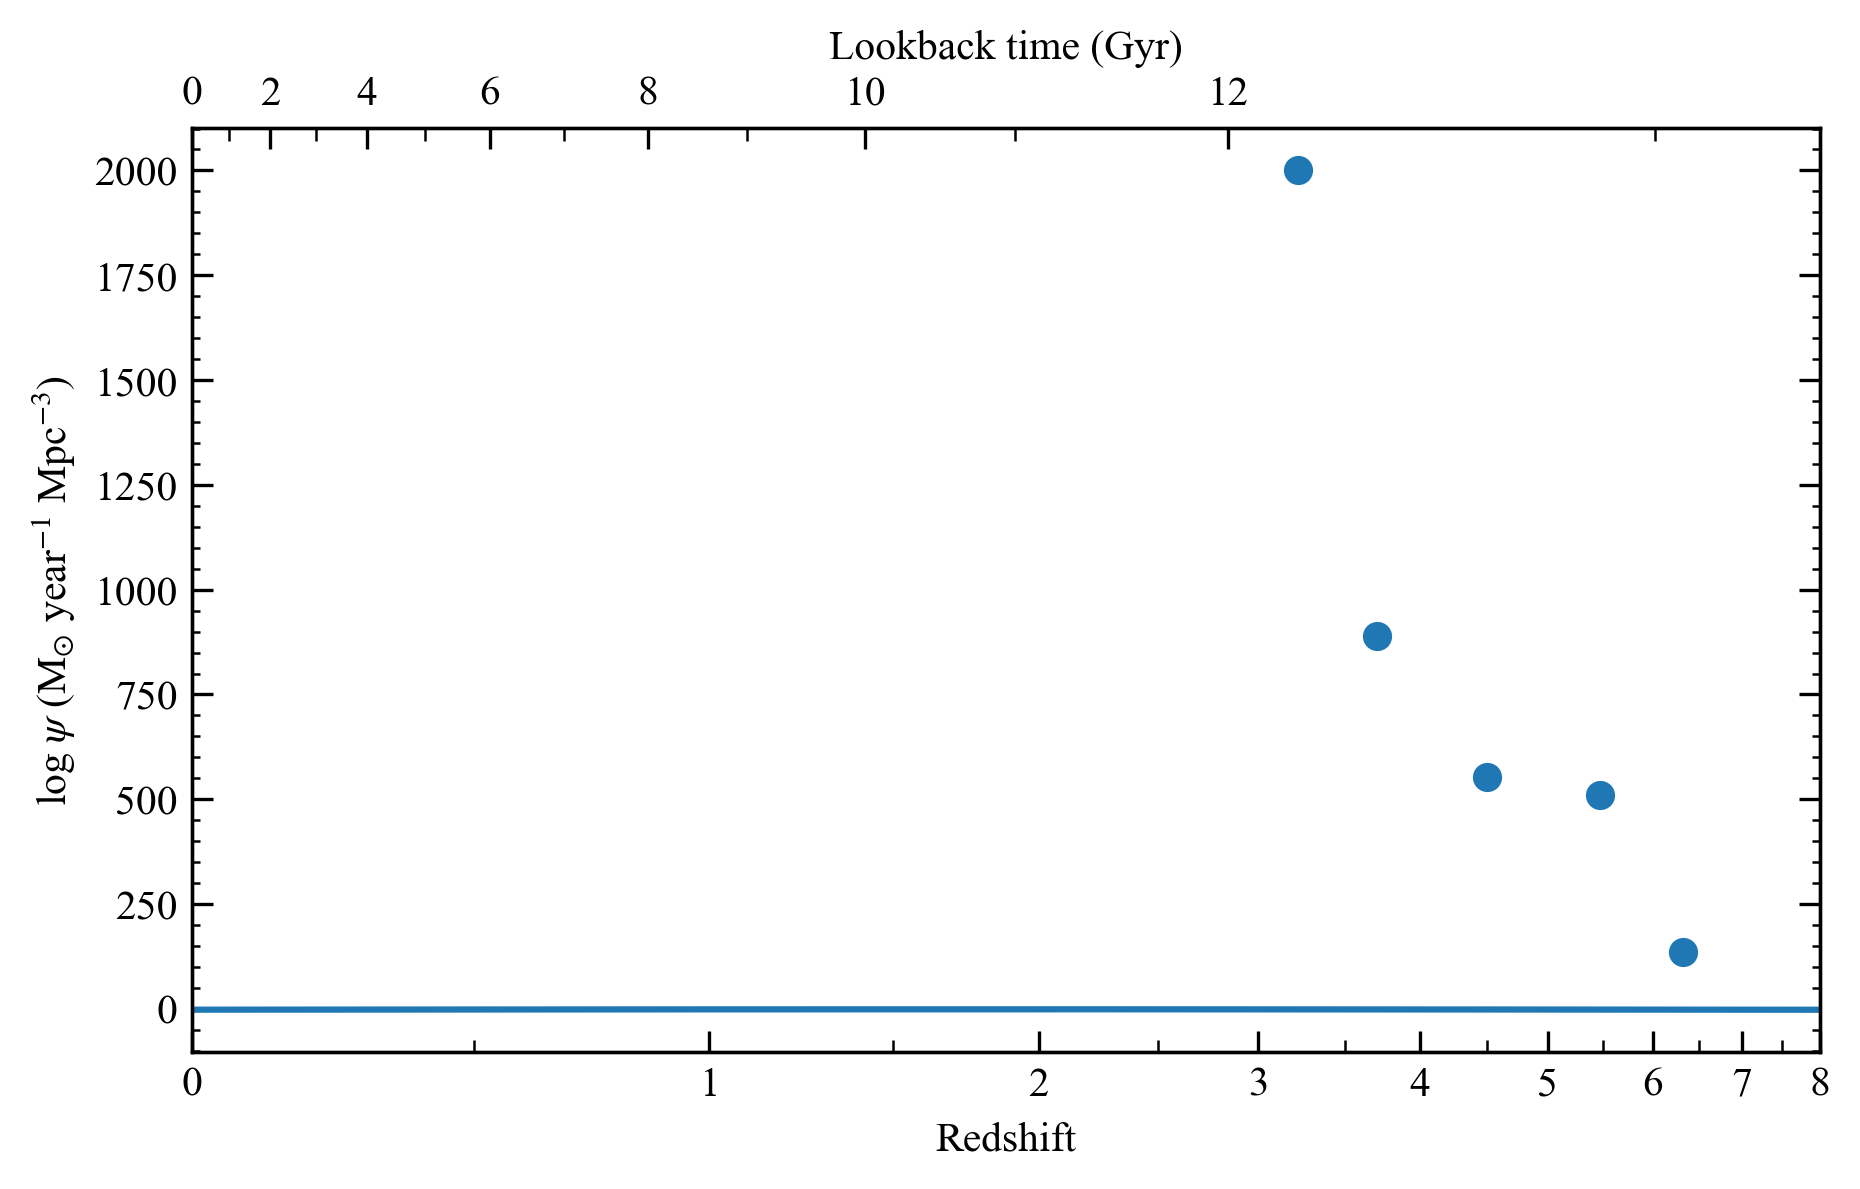

In [32]:
from astropy.cosmology import z_at_value
import astropy.units as u

%matplotlib inline


z = np.linspace(0, 8, 1000)
lbtime = cosmo.lookback_time(z).value


fig, ax = plt.subplots(figsize=(7,4), dpi=300)
ax.scatter(zmed.values(), SFRD_cor)
ax.plot(z, SFRDeq(z))

ax.set_xscale('asinh')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xlim(0, 8)
ax.minorticks_on()
minor_locator = mpl.ticker.MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minor_locator)
ax.tick_params(axis='both', which='both', direction = "in", top=False, right="on")
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='x', which='minor', length=3)
ax.tick_params(axis='y', which='minor', length=2)
ax.set_xlabel('Redshift')
ax.set_ylabel('log $ψ$ (M$_{\odot}$ year$^{-1}$ Mpc$^{-3}$)')

ax1 = ax.twiny()  # instantiate a second axes that shares the same x-axis
ax1.set_xlim(0, 14)
ax1.set_xscale('asinh')

lookback_time_ticks = [1E-6, 2, 4, 6, 8, 10, 12]
z_ticks = z_at_value(cosmo.lookback_time, lookback_time_ticks*u.Gyr).value

ax1.set_xticks(z_ticks)
ax1.set_xticklabels([f'{int(lt)}' for lt in lookback_time_ticks])

minor_lookback_time_ticks = [1, 3, 5, 7, 9, 11, 13]
minor_z_ticks = z_at_value(cosmo.lookback_time, minor_lookback_time_ticks*u.Gyr).value
ax1.xaxis.set_minor_locator(mpl.ticker.FixedLocator(minor_z_ticks))
ax1.tick_params(axis='x', which='both', direction='in')
ax1.tick_params(axis='x', which='major', length=5)
ax1.tick_params(which='minor', length=3, direction='in')
ax1.set_xlabel('Lookback time (Gyr)')

plt.show()

### UVJ Diagram (Blue and Red Clump)

In [ ]:
def U_V(V_J):
    return 0.88*V_J+0.49

x = np.linspace(0.81/0.88, 1.6)
plt.ax1(figsize=(6,6))
plt.plot(np.linspace(-2, 0.81/0.88), np.linspace(1.3, 1.3), c='black')
plt.plot(x, U_V(x), c='black')
plt.plot(np.linspace(1.6, 1.6), np.linspace(1.898, 3), c='black')


if ((X['U-V'][ii]>0.88*X['V-J'][ii]+0.49) & (X['U-V'][ii]>1.3) & (X['V-J']<1.6)).any():
    X['Type_2'] = 'QC'
else:
    X['Type_2'] = 'SF'

plt.scatter(X['V-J'], X['U-V'], s=10, alpha=0.5, c='teal')
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on")
plt.tick_params(axis="both", which='major', length=6)
plt.xlabel('$V-J$', fontsize=15)
plt.ylabel('$U-V$', fontsize=15)
plt.xlim(-2, 3)
plt.ylim(-0.5, 3)
plt.show()

In [ ]:
X['Muv-bin'] = pd.cut(X['Muv'], bins=np.linspace(-25, -10, 6), labels=[1, 2, 3, 4, 5])

XC = X[X['Type'] == 'C']

MuvC = XC['Muv'].groupby(XC['Muv-bin']).count()
Muvtot = X['Muv'].groupby(X['Muv-bin']).count()
errMuvC = np.sqrt(MuvC)
errMuvtot = np.sqrt(Muvtot)
frac = MuvC/Muvtot
err_frac = np.sqrt((errMuvC/Muvtot)**2+(MuvC/Muvtot**2*errMuvtot)**2)

zlist = np.linspace(-23.5, -11.5, 5)
plt.scatter(zlist, frac)
plt.errorbar(zlist, frac, yerr=err_frac, linewidth=0, capsize=3, capthick=1, elinewidth=1)
plt.ylim(0, 1)
plt.grid(visible=True, linestyle=':')
plt.xlabel(r'$M_{UV}$', fontsize=18)
plt.ylabel(r'$f_{clumpy}$', fontsize=18)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on")
plt.tick_params(axis="both", which='major', length=6)
plt.legend()
plt.show()